# Кейс «Прогнозирование размеров сварного шва при электронно-лучевой сварке тонкостенных конструкций аэрокосмического назначения»

# Постановка задачи

В качестве исходных данных были взяты результаты экспериментальных исследований, проводимых в целях улучшения технологического процесса электронно-лучевой сварки изделия, сборка которого состоит из элементов, состоящих из разнородного материала. Установка электронно-лучевой сварки, на которой проводились исследования, предназначена для сварки электронным лучом в глубоком вакууме деталей сборочных единиц из нержавеющих сталей, титановых, алюминиевых и специальных сплавов. Существующая установка электронно-лучевой сварки обеспечивает повторяемость режимов в рамках возможностей реализованной системы управления. Работы по сварке выполнялись на образцах-имитаторах, соответствующих технологическому изделию. Для уменьшения вложения энергии при сварке:

1.	Снижалась величина сварочного тока (IW);
2.	Увеличивался ток фокусировки электронного пучка (IF);
3.	Увеличивалась скорость сварки (VW);
4.	Менялось расстояние от поверхности образцов до электронно-оптической системы (FP). 

По совокупности параметров технологических режимов обеспечивались минимально возможные размеры сварных швов: глубина шва (Depth) и ширина шва (Width).

В процессе выполнения работ была произведена электронно-лучевая сварка 18-ти единиц образцов. Результаты металлографического контроля по размерам сварного шва для каждого образца проводились в 4-х поперечных сечениях сварного шва. Ускоряющее напряжение было постоянным в диапазоне 19,8 – 20 кВ. Набор полученных данных собраны в составе режимов сварки, размеров сварочных швов в поперечных сечениях всех образцов.

Требуется: провести прогнозирование глубины (Depth) и ширины (Width) сварного шва в зависимости от параметров технологического процесса (IW, IF, VW, FP).

# Импорт

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('ignore')

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [50]:
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [114]:
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Activation, Dense

# Загрузка данных

In [3]:
df = pd.read_csv('ebw_data.csv')
df.head()

,IW,IF,VW,FP,Depth,Width
0,47,139,4.5,80,1.60,2.54
1,47,139,4.5,80,1.62,2.50
2,47,139,4.5,80,1.68,2.60
3,47,139,4.5,80,1.58,2.52
4,45,140,4.5,80,1.76,2.48


# EDA

In [4]:
df.shape

(72, 6)

In [5]:
df.isna().sum()

IW       0
IF       0
VW       0
FP       0
Depth    0
Width    0
dtype: int64

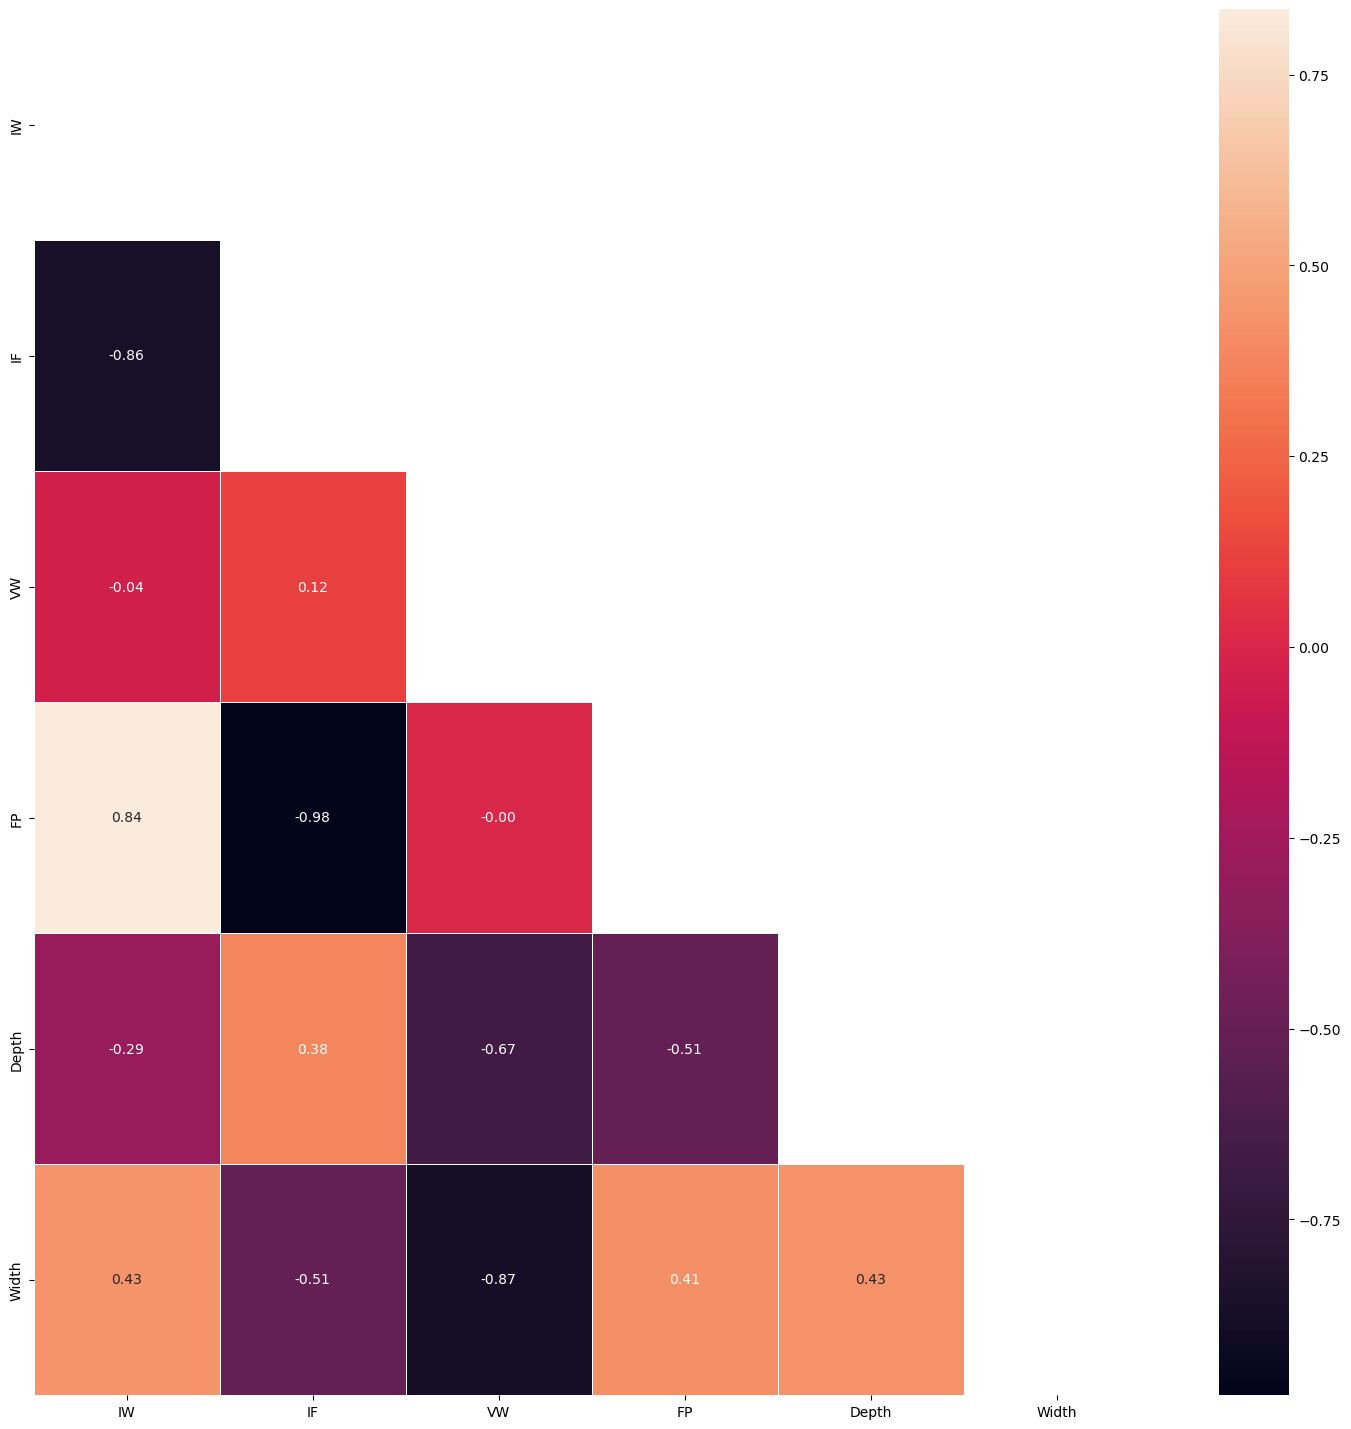

In [6]:
f, ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax, mask=matrix)
plt.show()

# Разбиение датасета на фичи и 2 таргета

In [7]:
X = df[['IW', 'IF', 'VW', 'FP']]
X

,IW,IF,VW,FP
0,47,139,4.5,80
1,47,139,4.5,80
2,47,139,4.5,80
3,47,139,4.5,80
4,45,140,4.5,80
...,...,...,...,...
67,44,146,9.0,60
68,45,146,9.0,60
69,45,146,9.0,60
70,45,146,9.0,60


Решать задачу регрессии будет раздельно для каждого прогнозируемого параметра (глубины и ширины сварного шва).

In [8]:
y_1 = df['Depth']
y_1

0     1.60
1     1.62
2     1.68
3     1.58
4     1.76
      ... 
67    1.20
68    1.36
69    1.28
70    1.28
71    1.32
Name: Depth, Length: 72, dtype: float64

In [9]:
y_2 = df['Width']
y_2

0     2.54
1     2.50
2     2.60
3     2.52
4     2.48
      ... 
67    1.72
68    1.76
69    1.76
70    1.76
71    1.76
Name: Width, Length: 72, dtype: float64

# Нормализация данных

In [10]:
column_list = ['IW', 'IF', 'VW', 'FP']

In [11]:
for column in column_list:
    scaler = StandardScaler()
    X[[column]] = scaler.fit_transform(X[[column]])

In [12]:
X.sample(5)

,IW,IF,VW,FP
33,1.4,-2.022217,0.665022,2.186433
52,-1.6,1.696053,0.176434,-1.327477
35,1.4,-2.022217,0.665022,2.186433
41,0.8,-0.260931,0.665022,0.078087
9,-0.4,-0.260931,-0.312153,0.078087


# Train & Test

In [13]:
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X, y_1, test_size=0.25, random_state=42)
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(X, y_2, test_size=0.25, random_state=42)

In [14]:
X_train_d.shape

(54, 4)

In [15]:
X_train_d.head()

,IW,IF,VW,FP
33,1.4,-2.022217,0.665022,2.186433
39,2.0,-1.826519,-0.312153,2.186433
59,-1.0,0.913259,0.176434,-0.858956
16,0.2,-0.065233,0.665022,0.078087
35,1.4,-2.022217,0.665022,2.186433


# Обучение базовых моделей

In [16]:
# список моделей
models = [
LinearRegression(),
Ridge(),
SGDRegressor(),
SVR(),
ExtraTreesRegressor(random_state=42),
GradientBoostingRegressor(random_state=42)    
]

In [17]:
# функция, которая принимает на вход модель и данные, а также выводит метрики для регрессии
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    print('R2 Score: {:.4f}'.format(r2_score(y_test, y_pred)))
    print('Mean Absolute Error {:.4f}'.format(mean_absolute_error(y_test, y_pred)))
    print('Mean Squared Error {:.4f}'.format(mean_squared_error(y_test, y_pred)))

## Предсказание глубины

In [18]:
# цикл, который выводит метрики по списку моделей
for i in models:
    print(i)
    make_prediction(
        m=i,
        X_train=X_train_d,
        y_train=y_train_d,
        X_test=X_test_d,
        y_test=y_test_d)
    print()

LinearRegression()
R2 Score: 0.5894
Mean Absolute Error 0.1112
Mean Squared Error 0.0202

Ridge()
R2 Score: 0.5968
Mean Absolute Error 0.1075
Mean Squared Error 0.0199

SGDRegressor()
R2 Score: 0.3551
Mean Absolute Error 0.1286
Mean Squared Error 0.0318

SVR()
R2 Score: 0.7768
Mean Absolute Error 0.0878
Mean Squared Error 0.0110

ExtraTreesRegressor(random_state=42)
R2 Score: 0.8594
Mean Absolute Error 0.0670
Mean Squared Error 0.0069

GradientBoostingRegressor(random_state=42)
R2 Score: 0.8580
Mean Absolute Error 0.0675
Mean Squared Error 0.0070



Наилучшие результаты получены случайным лесом и градиентным бустингом. 

Попробуем, перед переходом к более сложным алгоритмам - улучшить полученные результаты.

За основную метрику ошибки для задачи регрессии возьмем r2_score.

### ExtraTreesRegressor

In [22]:
params = {
    'n_estimators': np.linspace(10, 1000, 10, dtype = int),
    'min_samples_split': np.linspace(1, 10, 10,  dtype = int),
    'min_samples_leaf': np.linspace(1, 10, 10, dtype = int),
    'bootstrap' : [True, False]
} 

scoring = 'r2'

model = ExtraTreesRegressor(random_state=42)

In [23]:
GS_1 = GridSearchCV(model, params, scoring=scoring, cv=5, n_jobs=-1)
GS_1.fit(X_train_d, y_train_d)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'min_samples_split': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'n_estimators': array([  10,  120,  230,  340,  450,  560,  670,  780,  890, 1000])},
             scoring='r2')

In [24]:
GS_1.best_params_  # наилучшие настройки модели

{'bootstrap': False,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 10}

In [25]:
GS_1.best_score_  # что выбрано ошибкой

0.9050063113067889

In [26]:
GS_1.best_estimator_  # наилучшие настройки модели в другом виде

ExtraTreesRegressor(min_samples_split=6, n_estimators=10, random_state=42)

In [27]:
model = GS_1.best_estimator_
y_pred = model.predict(X_test_d)

print('R2 Score: {:.4f}'.format(r2_score(y_test_d, y_pred)))
print('Mean Absolute Error {:.4f}'.format(mean_absolute_error(y_test_d, y_pred)))
print('Mean Squared Error {:.4f}'.format(mean_squared_error(y_test_d, y_pred)))

R2 Score: 0.8453
Mean Absolute Error 0.0719
Mean Squared Error 0.0076


### GradientBoostingRegressor

In [44]:
params = {
    'learning_rate': np.linspace(0.01, 0.5, 5),
    'n_estimators': np.linspace(10, 1000, 5, dtype = int),
    'min_samples_split': np.linspace(1, 10, 7,  dtype = int),
    'min_samples_leaf': np.linspace(1, 10, 7,  dtype = int),
    'max_depth': np.linspace(1, 10, 5,  dtype = int),
} 

scoring = 'r2'

model = GradientBoostingRegressor(random_state=42)

In [45]:
GS_2 = GridSearchCV(model, params, scoring=scoring, cv=5, n_jobs=-1)
GS_2.fit(X_train_d, y_train_d)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': array([0.01  , 0.1325, 0.255 , 0.3775, 0.5   ]),
                         'max_depth': array([ 1,  3,  5,  7, 10]),
                         'min_samples_leaf': array([ 1,  2,  4,  5,  7,  8, 10]),
                         'min_samples_split': array([ 1,  2,  4,  5,  7,  8, 10]),
                         'n_estimators': array([  10,  257,  505,  752, 1000])},
             scoring='r2')

In [46]:
GS_2.best_params_  # наилучшие настройки модели

{'learning_rate': 0.01,
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 505}

In [47]:
GS_2.best_score_  # что выбрано ошибкой

0.8848275499847977

In [48]:
GS_2.best_estimator_  # наилучшие настройки модели в другом виде

GradientBoostingRegressor(learning_rate=0.01, n_estimators=505, random_state=42)

In [49]:
model = GS_2.best_estimator_
y_pred = model.predict(X_test_d)

print('R2 Score: {:.4f}'.format(r2_score(y_test_d, y_pred)))
print('Mean Absolute Error {:.4f}'.format(mean_absolute_error(y_test_d, y_pred)))
print('Mean Squared Error {:.4f}'.format(mean_squared_error(y_test_d, y_pred)))

R2 Score: 0.8480
Mean Absolute Error 0.0716
Mean Squared Error 0.0075


## Предсказание ширины

In [31]:
# цикл, который выводит метрики по списку моделей
for i in models:
    print(i)
    make_prediction(
        m=i,
        X_train=X_train_w,
        y_train=y_train_w,
        X_test=X_test_w,
        y_test=y_test_w)
    print()

LinearRegression()
R2 Score: 0.9539
Mean Absolute Error 0.0506
Mean Squared Error 0.0043

Ridge()
R2 Score: 0.9542
Mean Absolute Error 0.0517
Mean Squared Error 0.0043

SGDRegressor()
R2 Score: 0.8723
Mean Absolute Error 0.0881
Mean Squared Error 0.0119

SVR()
R2 Score: 0.9630
Mean Absolute Error 0.0481
Mean Squared Error 0.0035

ExtraTreesRegressor(random_state=42)
R2 Score: 0.9767
Mean Absolute Error 0.0382
Mean Squared Error 0.0022

GradientBoostingRegressor(random_state=42)
R2 Score: 0.9769
Mean Absolute Error 0.0380
Mean Squared Error 0.0022



В прогнозирование ширины наилучшие результаты также получены случайным лесом и градиентным бустингом. 
При этом заметно общее качественное повышение точности прогнозирование у всех алгоритмов.

Попробуем, перед переходом к более сложным алгоритмам - улучшить полученные результаты.

### ExtraTreesRegressor

In [32]:
params = {
    'n_estimators': np.linspace(10, 1000, 10, dtype = int),
    'min_samples_split': np.linspace(1, 10, 10,  dtype = int),
    'min_samples_leaf': np.linspace(1, 10, 10,  dtype = int),
    'bootstrap' : [True, False]
} 

scoring = 'r2'

model = ExtraTreesRegressor(random_state=42)

In [33]:
GS_3 = GridSearchCV(model, params, scoring=scoring, cv=5, n_jobs=-1)
GS_3.fit(X_train_w, y_train_w)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'min_samples_split': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'n_estimators': array([  10,  120,  230,  340,  450,  560,  670,  780,  890, 1000])},
             scoring='r2')

In [34]:
GS_3.best_params_  # наилучшие настройки модели

{'bootstrap': False,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 10}

In [35]:
GS_3.best_score_  # что выбрано ошибкой

0.9549446874102333

In [36]:
GS_3.best_estimator_  # наилучшие настройки модели в другом виде

ExtraTreesRegressor(min_samples_leaf=3, n_estimators=10, random_state=42)

In [37]:
model = GS_3.best_estimator_
y_pred = model.predict(X_test_w)

print('R2 Score: {:.4f}'.format(r2_score(y_test_w, y_pred)))
print('Mean Absolute Error {:.4f}'.format(mean_absolute_error(y_test_w, y_pred)))
print('Mean Squared Error {:.4f}'.format(mean_squared_error(y_test_w, y_pred)))

R2 Score: 0.9773
Mean Absolute Error 0.0365
Mean Squared Error 0.0021


### GradientBoostingRegressor

In [38]:
params = {
    'learning_rate': np.linspace(0.01, 0.5, 5),
    'n_estimators': np.linspace(10, 1000, 5, dtype = int),
    'min_samples_split': np.linspace(1, 10, 7,  dtype = int),
    'min_samples_leaf': np.linspace(1, 10, 7,  dtype = int),
    'max_depth': np.linspace(1, 10, 5,  dtype = int),
} 

scoring = 'r2'

model = GradientBoostingRegressor(random_state=42)

In [39]:
GS_4 = GridSearchCV(model, params, scoring=scoring, cv=5, n_jobs=-1)
GS_4.fit(X_train_w, y_train_w)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': array([0.01  , 0.1325, 0.255 , 0.3775, 0.5   ]),
                         'max_depth': array([ 1,  3,  5,  7, 10]),
                         'min_samples_leaf': array([ 1,  2,  4,  5,  7,  8, 10]),
                         'min_samples_split': array([ 1,  2,  4,  5,  7,  8, 10]),
                         'n_estimators': array([  10,  257,  505,  752, 1000])},
             scoring='r2')

In [40]:
GS_4.best_params_  # наилучшие настройки модели

{'learning_rate': 0.3775,
 'max_depth': 1,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 257}

In [41]:
GS_4.best_score_  # что выбрано ошибкой

0.9540525566960504

In [42]:
GS_4.best_estimator_  # наилучшие настройки модели в другом виде

GradientBoostingRegressor(learning_rate=0.3775, max_depth=1, min_samples_leaf=5,
                          n_estimators=257, random_state=42)

In [43]:
model = GS_4.best_estimator_
y_pred = model.predict(X_test_w)

print('R2 Score: {:.4f}'.format(r2_score(y_test_w, y_pred)))
print('Mean Absolute Error {:.4f}'.format(mean_absolute_error(y_test_w, y_pred)))
print('Mean Squared Error {:.4f}'.format(mean_squared_error(y_test_w, y_pred)))

R2 Score: 0.9729
Mean Absolute Error 0.0424
Mean Squared Error 0.0025


Итак, наилучший скор на тестовой выборке по глубине у нас показал базовый алгоритм ExtraTreesRegressor(random_state=42)
R2 Score: 0.8594

А наилучший скор по ширине - ExtraTreesRegressor(min_samples_leaf=3, n_estimators=10, random_state=42), R2 Score: 0.9773

Уже, достаточно неплохие результаты, но перейдем к более тяжелой артилерии, а именно библиотекам xgboost и catboost.

# Бустинги

## Предсказание глубины

### CatBoost

In [68]:
boosting_model = CatBoostRegressor(silent=True,
                                  eval_metric='R2',
                                  random_state=42)

In [69]:
boosting_model.grid_search({'l2_leaf_reg': np.linspace(0, 1, 10),
                            'n_estimators': np.arange(50, 1051, 100),
                            'learning_rate': np.linspace(0.01, .5, 10),
                            'depth': np.arange(1, 16, 2)}, 
                           X_train_d, 
                           y_train_d, plot=True, refit=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = -14.95673337
bestIteration = 49

0:	loss: -14.9567334	best: -14.9567334 (0)	total: 60.7ms	remaining: 8m 53s

bestTest = 0.573248823
bestIteration = 49

1:	loss: 0.5732488	best: 0.5732488 (1)	total: 63.6ms	remaining: 4m 39s

bestTest = 0.7964869173
bestIteration = 49

2:	loss: 0.7964869	best: 0.7964869 (2)	total: 66.7ms	remaining: 3m 15s

bestTest = 0.8204813747
bestIteration = 41

3:	loss: 0.8204814	best: 0.8204814 (3)	total: 69.9ms	remaining: 2m 33s

bestTest = 0.8317811235
bestIteration = 48

4:	loss: 0.8317811	best: 0.8317811 (4)	total: 82.1ms	remaining: 2m 24s

bestTest = 0.8391344929
bestIteration = 24

5:	loss: 0.8391345	best: 0.8391345 (5)	total: 93.1ms	remaining: 2m 16s

bestTest = 0.8405007513
bestIteration = 49

6:	loss: 0.8405008	best: 0.8405008 (6)	total: 97.1ms	remaining: 2m 1s

bestTest = 0.8283565772
bestIteration = 49

7:	loss: 0.8283566	best: 0.8405008 (6)	total: 102ms	remaining: 1m 52s

bestTest = 0.8579941826
bestIteration = 49

8:	loss: 0.8579942	best: 0


bestTest = 0.8308632302
bestIteration = 145

102:	loss: 0.8308632	best: 0.8589725 (18)	total: 695ms	remaining: 58.7s

bestTest = 0.8477725098
bestIteration = 147

103:	loss: 0.8477725	best: 0.8589725 (18)	total: 709ms	remaining: 59.3s

bestTest = 0.8719581527
bestIteration = 148

104:	loss: 0.8719582	best: 0.8719582 (104)	total: 725ms	remaining: 1m

bestTest = 0.8754631769
bestIteration = 148

105:	loss: 0.8754632	best: 0.8754632 (105)	total: 740ms	remaining: 1m

bestTest = 0.8794585287
bestIteration = 143

106:	loss: 0.8794585	best: 0.8794585 (106)	total: 756ms	remaining: 1m 1s

bestTest = 0.8801896777
bestIteration = 144

107:	loss: 0.8801897	best: 0.8801897 (107)	total: 772ms	remaining: 1m 2s

bestTest = 0.8680251479
bestIteration = 101

108:	loss: 0.8680251	best: 0.8801897 (107)	total: 788ms	remaining: 1m 2s

bestTest = 0.8655446085
bestIteration = 125

109:	loss: 0.8655446	best: 0.8801897 (107)	total: 805ms	remaining: 1m 3s

bestTest = -1.928368745
bestIteration = 149

110:	loss:


bestTest = 0.8265879954
bestIteration = 142

172:	loss: 0.8265880	best: 0.8804679 (117)	total: 1.97s	remaining: 1m 38s

bestTest = 0.8434929711
bestIteration = 149

173:	loss: 0.8434930	best: 0.8804679 (117)	total: 1.99s	remaining: 1m 38s

bestTest = 0.8594585467
bestIteration = 149

174:	loss: 0.8594585	best: 0.8804679 (117)	total: 2.01s	remaining: 1m 39s

bestTest = 0.8697653737
bestIteration = 148

175:	loss: 0.8697654	best: 0.8804679 (117)	total: 2.03s	remaining: 1m 39s

bestTest = 0.8757909038
bestIteration = 148

176:	loss: 0.8757909	best: 0.8804679 (117)	total: 2.04s	remaining: 1m 39s

bestTest = 0.8767615467
bestIteration = 147

177:	loss: 0.8767615	best: 0.8804679 (117)	total: 2.06s	remaining: 1m 39s

bestTest = 0.8696245496
bestIteration = 139

178:	loss: 0.8696245	best: 0.8804679 (117)	total: 2.08s	remaining: 1m 40s

bestTest = 0.8670439247
bestIteration = 123

179:	loss: 0.8670439	best: 0.8804679 (117)	total: 2.1s	remaining: 1m 40s

bestTest = -2.110165038
bestIteration = 


bestTest = 0.8283411416
bestIteration = 248

241:	loss: 0.8283411	best: 0.8806211 (236)	total: 3.53s	remaining: 2m 4s

bestTest = 0.8442360978
bestIteration = 249

242:	loss: 0.8442361	best: 0.8806211 (236)	total: 3.56s	remaining: 2m 5s

bestTest = 0.8715292525
bestIteration = 247

243:	loss: 0.8715293	best: 0.8806211 (236)	total: 3.58s	remaining: 2m 5s

bestTest = 0.8760858011
bestIteration = 244

244:	loss: 0.8760858	best: 0.8806211 (236)	total: 3.61s	remaining: 2m 5s

bestTest = 0.8770739942
bestIteration = 236

245:	loss: 0.8770740	best: 0.8806211 (236)	total: 3.63s	remaining: 2m 6s

bestTest = 0.8796958322
bestIteration = 186

246:	loss: 0.8796958	best: 0.8806211 (236)	total: 3.65s	remaining: 2m 6s

bestTest = 0.8790418492
bestIteration = 180

247:	loss: 0.8790418	best: 0.8806211 (236)	total: 3.68s	remaining: 2m 6s

bestTest = 0.868776794
bestIteration = 116

248:	loss: 0.8687768	best: 0.8806211 (236)	total: 3.71s	remaining: 2m 7s

bestTest = 0.8663445028
bestIteration = 120

249


bestTest = 0.8660681076
bestIteration = 349

312:	loss: 0.8660681	best: 0.8806211 (236)	total: 5.53s	remaining: 2m 29s

bestTest = 0.8769499792
bestIteration = 341

313:	loss: 0.8769500	best: 0.8806211 (236)	total: 5.56s	remaining: 2m 30s

bestTest = 0.8778326841
bestIteration = 301

314:	loss: 0.8778327	best: 0.8806211 (236)	total: 5.61s	remaining: 2m 31s

bestTest = 0.8784655344
bestIteration = 242

315:	loss: 0.8784655	best: 0.8806211 (236)	total: 5.66s	remaining: 2m 31s

bestTest = 0.8790797236
bestIteration = 159

316:	loss: 0.8790797	best: 0.8806211 (236)	total: 5.7s	remaining: 2m 32s

bestTest = 0.8804679346
bestIteration = 145

317:	loss: 0.8804679	best: 0.8806211 (236)	total: 5.74s	remaining: 2m 33s

bestTest = 0.8677116038
bestIteration = 110

318:	loss: 0.8677116	best: 0.8806211 (236)	total: 5.77s	remaining: 2m 33s

bestTest = 0.8681131179
bestIteration = 99

319:	loss: 0.8681131	best: 0.8806211 (236)	total: 5.81s	remaining: 2m 33s

bestTest = 0.6100152783
bestIteration = 3


bestTest = 0.8595765464
bestIteration = 349

382:	loss: 0.8595765	best: 0.8806211 (236)	total: 8.16s	remaining: 2m 59s

bestTest = 0.8755862918
bestIteration = 343

383:	loss: 0.8755863	best: 0.8806211 (236)	total: 8.19s	remaining: 2m 59s

bestTest = 0.8759728972
bestIteration = 306

384:	loss: 0.8759729	best: 0.8806211 (236)	total: 8.23s	remaining: 2m 59s

bestTest = 0.8765854429
bestIteration = 252

385:	loss: 0.8765854	best: 0.8806211 (236)	total: 8.26s	remaining: 3m

bestTest = 0.8792471642
bestIteration = 208

386:	loss: 0.8792472	best: 0.8806211 (236)	total: 8.29s	remaining: 3m

bestTest = 0.8775788442
bestIteration = 166

387:	loss: 0.8775788	best: 0.8806211 (236)	total: 8.33s	remaining: 3m

bestTest = 0.8697278198
bestIteration = 122

388:	loss: 0.8697278	best: 0.8806211 (236)	total: 8.36s	remaining: 3m

bestTest = 0.8682348754
bestIteration = 103

389:	loss: 0.8682349	best: 0.8806211 (236)	total: 8.4s	remaining: 3m 1s

bestTest = 0.5772698677
bestIteration = 349

390:	loss: 0


bestTest = 0.8769598452
bestIteration = 377

453:	loss: 0.8769598	best: 0.8806211 (236)	total: 11.4s	remaining: 3m 28s

bestTest = 0.8758134732
bestIteration = 253

454:	loss: 0.8758135	best: 0.8806211 (236)	total: 11.4s	remaining: 3m 29s

bestTest = 0.877236381
bestIteration = 262

455:	loss: 0.8772364	best: 0.8806211 (236)	total: 11.4s	remaining: 3m 29s

bestTest = 0.8793471758
bestIteration = 197

456:	loss: 0.8793472	best: 0.8806211 (236)	total: 11.5s	remaining: 3m 29s

bestTest = 0.8795054242
bestIteration = 157

457:	loss: 0.8795054	best: 0.8806211 (236)	total: 11.5s	remaining: 3m 30s

bestTest = 0.8685665983
bestIteration = 141

458:	loss: 0.8685666	best: 0.8806211 (236)	total: 11.6s	remaining: 3m 30s

bestTest = 0.867302966
bestIteration = 113

459:	loss: 0.8673030	best: 0.8806211 (236)	total: 11.6s	remaining: 3m 30s

bestTest = 0.7366719144
bestIteration = 449

460:	loss: 0.7366719	best: 0.8806211 (236)	total: 11.7s	remaining: 3m 31s

bestTest = 0.8458239175
bestIteration = 4


bestTest = 0.8773780969
bestIteration = 250

525:	loss: 0.8773781	best: 0.8806211 (236)	total: 15s	remaining: 3m 56s

bestTest = 0.8803824775
bestIteration = 182

526:	loss: 0.8803825	best: 0.8806211 (236)	total: 15.1s	remaining: 3m 56s

bestTest = 0.8791174027
bestIteration = 164

527:	loss: 0.8791174	best: 0.8806211 (236)	total: 15.1s	remaining: 3m 56s

bestTest = 0.8697481609
bestIteration = 112

528:	loss: 0.8697482	best: 0.8806211 (236)	total: 15.2s	remaining: 3m 56s

bestTest = 0.8682470687
bestIteration = 74

529:	loss: 0.8682471	best: 0.8806211 (236)	total: 15.2s	remaining: 3m 57s

bestTest = 0.7845433458
bestIteration = 549

530:	loss: 0.7845433	best: 0.8806211 (236)	total: 15.3s	remaining: 3m 57s

bestTest = 0.8613712076
bestIteration = 547

531:	loss: 0.8613712	best: 0.8806211 (236)	total: 15.3s	remaining: 3m 58s

bestTest = 0.8771527209
bestIteration = 525

532:	loss: 0.8771527	best: 0.8806211 (236)	total: 15.4s	remaining: 3m 58s

bestTest = 0.8770602212
bestIteration = 39


bestTest = 0.8795822812
bestIteration = 179

597:	loss: 0.8795823	best: 0.8806211 (236)	total: 19.1s	remaining: 4m 21s

bestTest = 0.8691281811
bestIteration = 136

598:	loss: 0.8691282	best: 0.8806211 (236)	total: 19.1s	remaining: 4m 22s

bestTest = 0.8684597895
bestIteration = 128

599:	loss: 0.8684598	best: 0.8806211 (236)	total: 19.2s	remaining: 4m 22s

bestTest = 0.8005593541
bestIteration = 647

600:	loss: 0.8005594	best: 0.8806211 (236)	total: 19.3s	remaining: 4m 23s

bestTest = 0.870503447
bestIteration = 649

601:	loss: 0.8705034	best: 0.8806211 (236)	total: 19.4s	remaining: 4m 23s

bestTest = 0.8775361785
bestIteration = 636

602:	loss: 0.8775362	best: 0.8806211 (236)	total: 19.5s	remaining: 4m 24s

bestTest = 0.8772183955
bestIteration = 319

603:	loss: 0.8772184	best: 0.8806211 (236)	total: 19.5s	remaining: 4m 25s

bestTest = 0.8777398645
bestIteration = 306

604:	loss: 0.8777399	best: 0.8806211 (236)	total: 19.6s	remaining: 4m 25s

bestTest = 0.8772381985
bestIteration = 


bestTest = 0.8797349326
bestIteration = 165

666:	loss: 0.8797349	best: 0.8806211 (236)	total: 23.8s	remaining: 4m 50s

bestTest = 0.8786918377
bestIteration = 158

667:	loss: 0.8786918	best: 0.8806211 (236)	total: 23.9s	remaining: 4m 50s

bestTest = 0.8691188249
bestIteration = 102

668:	loss: 0.8691188	best: 0.8806211 (236)	total: 24s	remaining: 4m 51s

bestTest = 0.8678394852
bestIteration = 89

669:	loss: 0.8678395	best: 0.8806211 (236)	total: 24s	remaining: 4m 51s

bestTest = 0.7993482583
bestIteration = 649

670:	loss: 0.7993483	best: 0.8806211 (236)	total: 24.1s	remaining: 4m 51s

bestTest = 0.8674060713
bestIteration = 648

671:	loss: 0.8674061	best: 0.8806211 (236)	total: 24.1s	remaining: 4m 52s

bestTest = 0.8757992014
bestIteration = 646

672:	loss: 0.8757992	best: 0.8806211 (236)	total: 24.2s	remaining: 4m 52s

bestTest = 0.8764764557
bestIteration = 368

673:	loss: 0.8764765	best: 0.8806211 (236)	total: 24.3s	remaining: 4m 52s

bestTest = 0.8761596577
bestIteration = 292



bestTest = 0.8780193532
bestIteration = 239

735:	loss: 0.8780194	best: 0.8806211 (236)	total: 28.7s	remaining: 5m 14s

bestTest = 0.8806211004
bestIteration = 184

736:	loss: 0.8806211	best: 0.8806211 (236)	total: 28.7s	remaining: 5m 14s

bestTest = 0.8797378168
bestIteration = 136

737:	loss: 0.8797378	best: 0.8806211 (236)	total: 28.8s	remaining: 5m 14s

bestTest = 0.8691896186
bestIteration = 132

738:	loss: 0.8691896	best: 0.8806211 (236)	total: 28.9s	remaining: 5m 15s

bestTest = 0.8669246573
bestIteration = 91

739:	loss: 0.8669247	best: 0.8806211 (236)	total: 29s	remaining: 5m 15s

bestTest = 0.808640902
bestIteration = 748

740:	loss: 0.8086409	best: 0.8806211 (236)	total: 29.1s	remaining: 5m 15s

bestTest = 0.8727499229
bestIteration = 746

741:	loss: 0.8727499	best: 0.8806211 (236)	total: 29.1s	remaining: 5m 16s

bestTest = 0.877589075
bestIteration = 709

742:	loss: 0.8775891	best: 0.8806211 (236)	total: 29.2s	remaining: 5m 16s

bestTest = 0.8766488529
bestIteration = 362



bestTest = 0.8797873322
bestIteration = 155

806:	loss: 0.8797873	best: 0.8806211 (236)	total: 34.3s	remaining: 5m 39s

bestTest = 0.8801896777
bestIteration = 144

807:	loss: 0.8801897	best: 0.8806211 (236)	total: 34.3s	remaining: 5m 39s

bestTest = 0.8680251479
bestIteration = 101

808:	loss: 0.8680251	best: 0.8806211 (236)	total: 34.4s	remaining: 5m 40s

bestTest = 0.8655446085
bestIteration = 125

809:	loss: 0.8655446	best: 0.8806211 (236)	total: 34.5s	remaining: 5m 40s

bestTest = 0.8118362422
bestIteration = 844

810:	loss: 0.8118362	best: 0.8806211 (236)	total: 34.6s	remaining: 5m 40s

bestTest = 0.877087413
bestIteration = 838

811:	loss: 0.8770874	best: 0.8806211 (236)	total: 34.7s	remaining: 5m 41s

bestTest = 0.8777815842
bestIteration = 701

812:	loss: 0.8777816	best: 0.8806211 (236)	total: 34.8s	remaining: 5m 41s

bestTest = 0.8770082518
bestIteration = 377

813:	loss: 0.8770083	best: 0.8806211 (236)	total: 34.9s	remaining: 5m 42s

bestTest = 0.8778326841
bestIteration = 


bestTest = 0.8773056635
bestIteration = 226

875:	loss: 0.8773057	best: 0.8806211 (236)	total: 40s	remaining: 6m 1s

bestTest = 0.8793766829
bestIteration = 191

876:	loss: 0.8793767	best: 0.8806211 (236)	total: 40.1s	remaining: 6m 2s

bestTest = 0.8777654681
bestIteration = 186

877:	loss: 0.8777655	best: 0.8806211 (236)	total: 40.2s	remaining: 6m 2s

bestTest = 0.8696245496
bestIteration = 139

878:	loss: 0.8696245	best: 0.8806211 (236)	total: 40.3s	remaining: 6m 3s

bestTest = 0.8670439247
bestIteration = 123

879:	loss: 0.8670439	best: 0.8806211 (236)	total: 40.4s	remaining: 6m 3s

bestTest = 0.8123498848
bestIteration = 849

880:	loss: 0.8123499	best: 0.8806211 (236)	total: 40.5s	remaining: 6m 3s

bestTest = 0.8756339047
bestIteration = 838

881:	loss: 0.8756339	best: 0.8806211 (236)	total: 40.6s	remaining: 6m 4s

bestTest = 0.875774004
bestIteration = 730

882:	loss: 0.8757740	best: 0.8806211 (236)	total: 40.6s	remaining: 6m 4s

bestTest = 0.8762435222
bestIteration = 468

883:	


bestTest = 0.8760858011
bestIteration = 244

944:	loss: 0.8760858	best: 0.8806211 (236)	total: 46.4s	remaining: 6m 25s

bestTest = 0.877226663
bestIteration = 259

945:	loss: 0.8772267	best: 0.8806211 (236)	total: 46.5s	remaining: 6m 25s

bestTest = 0.8796958322
bestIteration = 186

946:	loss: 0.8796958	best: 0.8806211 (236)	total: 46.5s	remaining: 6m 25s

bestTest = 0.8790418492
bestIteration = 180

947:	loss: 0.8790418	best: 0.8806211 (236)	total: 46.6s	remaining: 6m 26s

bestTest = 0.868776794
bestIteration = 116

948:	loss: 0.8687768	best: 0.8806211 (236)	total: 46.7s	remaining: 6m 26s

bestTest = 0.8663445028
bestIteration = 120

949:	loss: 0.8663445	best: 0.8806211 (236)	total: 46.8s	remaining: 6m 27s

bestTest = 0.8137215307
bestIteration = 927

950:	loss: 0.8137215	best: 0.8806211 (236)	total: 47s	remaining: 6m 27s

bestTest = 0.8758086649
bestIteration = 939

951:	loss: 0.8758087	best: 0.8806211 (236)	total: 47.1s	remaining: 6m 27s

bestTest = 0.8774951456
bestIteration = 612


bestTest = 0.8778326841
bestIteration = 301

1014:	loss: 0.8778327	best: 0.8806211 (236)	total: 53.3s	remaining: 6m 49s

bestTest = 0.8784655344
bestIteration = 242

1015:	loss: 0.8784655	best: 0.8806211 (236)	total: 53.4s	remaining: 6m 49s

bestTest = 0.8790797236
bestIteration = 159

1016:	loss: 0.8790797	best: 0.8806211 (236)	total: 53.5s	remaining: 6m 49s

bestTest = 0.8804679346
bestIteration = 145

1017:	loss: 0.8804679	best: 0.8806211 (236)	total: 53.6s	remaining: 6m 49s

bestTest = 0.8677116038
bestIteration = 110

1018:	loss: 0.8677116	best: 0.8806211 (236)	total: 53.7s	remaining: 6m 50s

bestTest = 0.8681131179
bestIteration = 99

1019:	loss: 0.8681131	best: 0.8806211 (236)	total: 53.9s	remaining: 6m 50s

bestTest = 0.8185722461
bestIteration = 1047

1020:	loss: 0.8185722	best: 0.8806211 (236)	total: 54s	remaining: 6m 51s

bestTest = 0.8764210821
bestIteration = 1017

1021:	loss: 0.8764211	best: 0.8806211 (236)	total: 54.1s	remaining: 6m 51s

bestTest = 0.8775492538
bestIter


bestTest = 0.8762435222
bestIteration = 468

1083:	loss: 0.8762435	best: 0.8806211 (236)	total: 1m	remaining: 7m 10s

bestTest = 0.8759728972
bestIteration = 306

1084:	loss: 0.8759729	best: 0.8806211 (236)	total: 1m	remaining: 7m 11s

bestTest = 0.8765854429
bestIteration = 252

1085:	loss: 0.8765854	best: 0.8806211 (236)	total: 1m	remaining: 7m 11s

bestTest = 0.8792471642
bestIteration = 208

1086:	loss: 0.8792472	best: 0.8806211 (236)	total: 1m	remaining: 7m 11s

bestTest = 0.8775788442
bestIteration = 166

1087:	loss: 0.8775788	best: 0.8806211 (236)	total: 1m	remaining: 7m 12s

bestTest = 0.8697278198
bestIteration = 122

1088:	loss: 0.8697278	best: 0.8806211 (236)	total: 1m 1s	remaining: 7m 12s

bestTest = 0.8682348754
bestIteration = 103

1089:	loss: 0.8682349	best: 0.8806211 (236)	total: 1m 1s	remaining: 7m 12s

bestTest = 0.8185754296
bestIteration = 1048

1090:	loss: 0.8185754	best: 0.8806211 (236)	total: 1m 1s	remaining: 7m 13s

bestTest = 0.8766759529
bestIteration = 1006



bestTest = 0.8487114757
bestIteration = 21

1166:	loss: 0.8487115	best: 0.8806211 (236)	total: 1m 2s	remaining: 6m 50s

bestTest = 0.8455055915
bestIteration = 48

1167:	loss: 0.8455056	best: 0.8806211 (236)	total: 1m 2s	remaining: 6m 50s

bestTest = 0.8456364547
bestIteration = 48

1168:	loss: 0.8456365	best: 0.8806211 (236)	total: 1m 2s	remaining: 6m 50s

bestTest = 0.8465701966
bestIteration = 24

1169:	loss: 0.8465702	best: 0.8806211 (236)	total: 1m 2s	remaining: 6m 49s

bestTest = -15.47135837
bestIteration = 49

1170:	loss: -15.4713584	best: 0.8806211 (236)	total: 1m 2s	remaining: 6m 49s

bestTest = 0.6285361166
bestIteration = 49

1171:	loss: 0.6285361	best: 0.8806211 (236)	total: 1m 2s	remaining: 6m 48s

bestTest = 0.8166262581
bestIteration = 49

1172:	loss: 0.8166263	best: 0.8806211 (236)	total: 1m 2s	remaining: 6m 48s

bestTest = 0.851366725
bestIteration = 43

1173:	loss: 0.8513667	best: 0.8806211 (236)	total: 1m 2s	remaining: 6m 48s

bestTest = 0.8424814155
bestIteration 


bestTest = 0.8464176578
bestIteration = 147

1234:	loss: 0.8464177	best: 0.8806211 (236)	total: 1m 4s	remaining: 6m 32s

bestTest = 0.8464642978
bestIteration = 147

1235:	loss: 0.8464643	best: 0.8806211 (236)	total: 1m 4s	remaining: 6m 32s

bestTest = 0.8464647615
bestIteration = 147

1236:	loss: 0.8464648	best: 0.8806211 (236)	total: 1m 4s	remaining: 6m 32s

bestTest = 0.8464668544
bestIteration = 148

1237:	loss: 0.8464669	best: 0.8806211 (236)	total: 1m 4s	remaining: 6m 32s

bestTest = 0.8464671675
bestIteration = 149

1238:	loss: 0.8464672	best: 0.8806211 (236)	total: 1m 4s	remaining: 6m 31s

bestTest = 0.8464672557
bestIteration = 149

1239:	loss: 0.8464673	best: 0.8806211 (236)	total: 1m 4s	remaining: 6m 31s

bestTest = -1.836682385
bestIteration = 149

1240:	loss: -1.8366824	best: 0.8806211 (236)	total: 1m 4s	remaining: 6m 31s

bestTest = 0.8463588398
bestIteration = 124

1241:	loss: 0.8463588	best: 0.8806211 (236)	total: 1m 4s	remaining: 6m 31s

bestTest = 0.8446212722
bestIt


bestTest = 0.846381469
bestIteration = 246

1302:	loss: 0.8463815	best: 0.8806211 (236)	total: 1m 6s	remaining: 6m 20s

bestTest = 0.8464610324
bestIteration = 249

1303:	loss: 0.8464610	best: 0.8806211 (236)	total: 1m 6s	remaining: 6m 20s

bestTest = 0.8464670433
bestIteration = 249

1304:	loss: 0.8464670	best: 0.8806211 (236)	total: 1m 6s	remaining: 6m 20s

bestTest = 0.8464672583
bestIteration = 246

1305:	loss: 0.8464673	best: 0.8806211 (236)	total: 1m 6s	remaining: 6m 19s

bestTest = 0.8464672651
bestIteration = 249

1306:	loss: 0.8464673	best: 0.8806211 (236)	total: 1m 6s	remaining: 6m 19s

bestTest = 0.8464672658
bestIteration = 246

1307:	loss: 0.8464673	best: 0.8806211 (236)	total: 1m 6s	remaining: 6m 19s

bestTest = 0.8464672658
bestIteration = 246

1308:	loss: 0.8464673	best: 0.8806211 (236)	total: 1m 6s	remaining: 6m 19s

bestTest = 0.8464672658
bestIteration = 248

1309:	loss: 0.8464673	best: 0.8806211 (236)	total: 1m 6s	remaining: 6m 19s

bestTest = 0.3294319841
bestIter


bestTest = 0.2333067163
bestIteration = 249

1370:	loss: 0.2333067	best: 0.8806211 (236)	total: 1m 9s	remaining: 6m 14s

bestTest = 0.8521548738
bestIteration = 124

1371:	loss: 0.8521549	best: 0.8806211 (236)	total: 1m 9s	remaining: 6m 13s

bestTest = 0.8462168693
bestIteration = 248

1372:	loss: 0.8462169	best: 0.8806211 (236)	total: 1m 9s	remaining: 6m 13s

bestTest = 0.851366725
bestIteration = 43

1373:	loss: 0.8513667	best: 0.8806211 (236)	total: 1m 9s	remaining: 6m 13s

bestTest = 0.8464641565
bestIteration = 248

1374:	loss: 0.8464642	best: 0.8806211 (236)	total: 1m 9s	remaining: 6m 13s

bestTest = 0.8465264977
bestIteration = 52

1375:	loss: 0.8465265	best: 0.8806211 (236)	total: 1m 9s	remaining: 6m 13s

bestTest = 0.8464672387
bestIteration = 248

1376:	loss: 0.8464672	best: 0.8806211 (236)	total: 1m 9s	remaining: 6m 13s

bestTest = 0.8464672632
bestIteration = 249

1377:	loss: 0.8464673	best: 0.8806211 (236)	total: 1m 9s	remaining: 6m 13s

bestTest = 0.8464672657
bestIterat


bestTest = 0.6933920211
bestIteration = 349

1440:	loss: 0.6933920	best: 0.8806211 (236)	total: 1m 12s	remaining: 6m 12s

bestTest = 0.8463588398
bestIteration = 124

1441:	loss: 0.8463588	best: 0.8806211 (236)	total: 1m 13s	remaining: 6m 12s

bestTest = 0.8464504078
bestIteration = 344

1442:	loss: 0.8464504	best: 0.8806211 (236)	total: 1m 13s	remaining: 6m 12s

bestTest = 0.8464668965
bestIteration = 348

1443:	loss: 0.8464669	best: 0.8806211 (236)	total: 1m 13s	remaining: 6m 12s

bestTest = 0.8464672398
bestIteration = 349

1444:	loss: 0.8464672	best: 0.8806211 (236)	total: 1m 13s	remaining: 6m 12s

bestTest = 0.8464672655
bestIteration = 346

1445:	loss: 0.8464673	best: 0.8806211 (236)	total: 1m 13s	remaining: 6m 12s

bestTest = 0.8464672658
bestIteration = 347

1446:	loss: 0.8464673	best: 0.8806211 (236)	total: 1m 13s	remaining: 6m 12s

bestTest = 0.8464672658
bestIteration = 346

1447:	loss: 0.8464673	best: 0.8806211 (236)	total: 1m 13s	remaining: 6m 12s

bestTest = 0.8464672658


bestTest = 0.8464672658
bestIteration = 279

1509:	loss: 0.8464673	best: 0.8806211 (236)	total: 1m 17s	remaining: 6m 12s

bestTest = 0.803060668
bestIteration = 449

1510:	loss: 0.8030607	best: 0.8806211 (236)	total: 1m 17s	remaining: 6m 12s

bestTest = 0.8461984821
bestIteration = 449

1511:	loss: 0.8461985	best: 0.8806211 (236)	total: 1m 17s	remaining: 6m 12s

bestTest = 0.8464657919
bestIteration = 449

1512:	loss: 0.8464658	best: 0.8806211 (236)	total: 1m 17s	remaining: 6m 12s

bestTest = 0.8464672584
bestIteration = 449

1513:	loss: 0.8464673	best: 0.8806211 (236)	total: 1m 17s	remaining: 6m 12s

bestTest = 0.8464672657
bestIteration = 448

1514:	loss: 0.8464673	best: 0.8806211 (236)	total: 1m 17s	remaining: 6m 13s

bestTest = 0.8464672658
bestIteration = 449

1515:	loss: 0.8464673	best: 0.8806211 (236)	total: 1m 17s	remaining: 6m 13s

bestTest = 0.8464672658
bestIteration = 445

1516:	loss: 0.8464673	best: 0.8806211 (236)	total: 1m 17s	remaining: 6m 13s

bestTest = 0.8464672658



bestTest = 0.8464672658
bestIteration = 393

1578:	loss: 0.8464673	best: 0.8806211 (236)	total: 1m 22s	remaining: 6m 18s

bestTest = 0.8464672658
bestIteration = 361

1579:	loss: 0.8464673	best: 0.8806211 (236)	total: 1m 22s	remaining: 6m 18s

bestTest = 0.7843606786
bestIteration = 449

1580:	loss: 0.7843607	best: 0.8806211 (236)	total: 1m 22s	remaining: 6m 18s

bestTest = 0.8531726097
bestIteration = 121

1581:	loss: 0.8531726	best: 0.8806211 (236)	total: 1m 23s	remaining: 6m 19s

bestTest = 0.8464582963
bestIteration = 447

1582:	loss: 0.8464583	best: 0.8806211 (236)	total: 1m 23s	remaining: 6m 19s

bestTest = 0.8525273562
bestIteration = 41

1583:	loss: 0.8525274	best: 0.8806211 (236)	total: 1m 23s	remaining: 6m 19s

bestTest = 0.8464672631
bestIteration = 449

1584:	loss: 0.8464673	best: 0.8806211 (236)	total: 1m 23s	remaining: 6m 19s

bestTest = 0.8464672657
bestIteration = 441

1585:	loss: 0.8464673	best: 0.8806211 (236)	total: 1m 23s	remaining: 6m 19s

bestTest = 0.8464672658



bestTest = 0.8464672658
bestIteration = 433

1647:	loss: 0.8464673	best: 0.8806211 (236)	total: 1m 28s	remaining: 6m 26s

bestTest = 0.8464672658
bestIteration = 379

1648:	loss: 0.8464673	best: 0.8806211 (236)	total: 1m 29s	remaining: 6m 26s

bestTest = 0.8464672658
bestIteration = 308

1649:	loss: 0.8464673	best: 0.8806211 (236)	total: 1m 29s	remaining: 6m 26s

bestTest = 0.8237502048
bestIteration = 549

1650:	loss: 0.8237502	best: 0.8806211 (236)	total: 1m 29s	remaining: 6m 26s

bestTest = 0.8488286213
bestIteration = 124

1651:	loss: 0.8488286	best: 0.8806211 (236)	total: 1m 29s	remaining: 6m 26s

bestTest = 0.84646689
bestIteration = 549

1652:	loss: 0.8464669	best: 0.8806211 (236)	total: 1m 29s	remaining: 6m 26s

bestTest = 0.8464672649
bestIteration = 549

1653:	loss: 0.8464673	best: 0.8806211 (236)	total: 1m 29s	remaining: 6m 26s

bestTest = 0.8464672658
bestIteration = 549

1654:	loss: 0.8464673	best: 0.8806211 (236)	total: 1m 29s	remaining: 6m 26s

bestTest = 0.8464672658
b


bestTest = 0.8464672658
bestIteration = 484

1716:	loss: 0.8464673	best: 0.8806211 (236)	total: 1m 35s	remaining: 6m 35s

bestTest = 0.8464672658
bestIteration = 376

1717:	loss: 0.8464673	best: 0.8806211 (236)	total: 1m 35s	remaining: 6m 35s

bestTest = 0.8464672658
bestIteration = 325

1718:	loss: 0.8464673	best: 0.8806211 (236)	total: 1m 36s	remaining: 6m 35s

bestTest = 0.8464672658
bestIteration = 272

1719:	loss: 0.8464673	best: 0.8806211 (236)	total: 1m 36s	remaining: 6m 35s

bestTest = 0.8332187202
bestIteration = 649

1720:	loss: 0.8332187	best: 0.8806211 (236)	total: 1m 36s	remaining: 6m 35s

bestTest = 0.8464578938
bestIteration = 649

1721:	loss: 0.8464579	best: 0.8806211 (236)	total: 1m 36s	remaining: 6m 36s

bestTest = 0.8464672482
bestIteration = 649

1722:	loss: 0.8464672	best: 0.8806211 (236)	total: 1m 36s	remaining: 6m 36s

bestTest = 0.8464672658
bestIteration = 649

1723:	loss: 0.8464673	best: 0.8806211 (236)	total: 1m 36s	remaining: 6m 36s

bestTest = 0.8464672658


bestTest = 0.8464672658
bestIteration = 649

1785:	loss: 0.8464673	best: 0.8806211 (236)	total: 1m 43s	remaining: 6m 46s

bestTest = 0.8464672658
bestIteration = 607

1786:	loss: 0.8464673	best: 0.8806211 (236)	total: 1m 43s	remaining: 6m 47s

bestTest = 0.8464672658
bestIteration = 457

1787:	loss: 0.8464673	best: 0.8806211 (236)	total: 1m 43s	remaining: 6m 47s

bestTest = 0.8464672658
bestIteration = 443

1788:	loss: 0.8464673	best: 0.8806211 (236)	total: 1m 43s	remaining: 6m 47s

bestTest = 0.8464672658
bestIteration = 357

1789:	loss: 0.8464673	best: 0.8806211 (236)	total: 1m 44s	remaining: 6m 47s

bestTest = 0.8384168744
bestIteration = 649

1790:	loss: 0.8384169	best: 0.8806211 (236)	total: 1m 44s	remaining: 6m 47s

bestTest = 0.8538760675
bestIteration = 121

1791:	loss: 0.8538761	best: 0.8806211 (236)	total: 1m 44s	remaining: 6m 47s

bestTest = 0.8464669461
bestIteration = 641

1792:	loss: 0.8464669	best: 0.8806211 (236)	total: 1m 44s	remaining: 6m 47s

bestTest = 0.8501588531


bestTest = 0.8464672658
bestIteration = 748

1854:	loss: 0.8464673	best: 0.8806211 (236)	total: 1m 52s	remaining: 6m 59s

bestTest = 0.8464672658
bestIteration = 625

1855:	loss: 0.8464673	best: 0.8806211 (236)	total: 1m 52s	remaining: 6m 59s

bestTest = 0.8464672658
bestIteration = 567

1856:	loss: 0.8464673	best: 0.8806211 (236)	total: 1m 52s	remaining: 7m

bestTest = 0.8464672658
bestIteration = 447

1857:	loss: 0.8464673	best: 0.8806211 (236)	total: 1m 52s	remaining: 7m

bestTest = 0.8464672658
bestIteration = 388

1858:	loss: 0.8464673	best: 0.8806211 (236)	total: 1m 52s	remaining: 7m

bestTest = 0.8464672658
bestIteration = 338

1859:	loss: 0.8464673	best: 0.8806211 (236)	total: 1m 52s	remaining: 7m

bestTest = 0.8410526637
bestIteration = 749

1860:	loss: 0.8410527	best: 0.8806211 (236)	total: 1m 52s	remaining: 7m

bestTest = 0.8501630203
bestIteration = 122

1861:	loss: 0.8501630	best: 0.8806211 (236)	total: 1m 52s	remaining: 7m 1s

bestTest = 0.8464672527
bestIteration = 749



bestTest = 0.8464672658
bestIteration = 694

1924:	loss: 0.8464673	best: 0.8806211 (236)	total: 2m 1s	remaining: 7m 14s

bestTest = 0.8464672658
bestIteration = 561

1925:	loss: 0.8464673	best: 0.8806211 (236)	total: 2m 1s	remaining: 7m 14s

bestTest = 0.8464672658
bestIteration = 493

1926:	loss: 0.8464673	best: 0.8806211 (236)	total: 2m 1s	remaining: 7m 14s

bestTest = 0.8464672658
bestIteration = 404

1927:	loss: 0.8464673	best: 0.8806211 (236)	total: 2m 2s	remaining: 7m 14s

bestTest = 0.8464672658
bestIteration = 345

1928:	loss: 0.8464673	best: 0.8806211 (236)	total: 2m 2s	remaining: 7m 15s

bestTest = 0.8464672658
bestIteration = 297

1929:	loss: 0.8464673	best: 0.8806211 (236)	total: 2m 2s	remaining: 7m 15s

bestTest = 0.8422276835
bestIteration = 847

1930:	loss: 0.8422277	best: 0.8806211 (236)	total: 2m 2s	remaining: 7m 15s

bestTest = 0.8464653799
bestIteration = 847

1931:	loss: 0.8464654	best: 0.8806211 (236)	total: 2m 2s	remaining: 7m 16s

bestTest = 0.8464672654
bestIte


bestTest = 0.8464672438
bestIteration = 823

1992:	loss: 0.8464672	best: 0.8806211 (236)	total: 2m 11s	remaining: 7m 30s

bestTest = 0.8501588531
bestIteration = 45

1993:	loss: 0.8501589	best: 0.8806211 (236)	total: 2m 11s	remaining: 7m 30s

bestTest = 0.8464672658
bestIteration = 844

1994:	loss: 0.8464673	best: 0.8806211 (236)	total: 2m 12s	remaining: 7m 30s

bestTest = 0.8464672658
bestIteration = 762

1995:	loss: 0.8464673	best: 0.8806211 (236)	total: 2m 12s	remaining: 7m 30s

bestTest = 0.8464672658
bestIteration = 620

1996:	loss: 0.8464673	best: 0.8806211 (236)	total: 2m 12s	remaining: 7m 30s

bestTest = 0.8476852294
bestIteration = 18

1997:	loss: 0.8476852	best: 0.8806211 (236)	total: 2m 12s	remaining: 7m 31s

bestTest = 0.8464672659
bestIteration = 231

1998:	loss: 0.8464673	best: 0.8806211 (236)	total: 2m 12s	remaining: 7m 31s

bestTest = 0.8471019666
bestIteration = 22

1999:	loss: 0.8471020	best: 0.8806211 (236)	total: 2m 12s	remaining: 7m 31s

bestTest = 0.8379590822
be


bestTest = 0.8456143563
bestIteration = 948

2060:	loss: 0.8456144	best: 0.8806211 (236)	total: 2m 22s	remaining: 7m 47s

bestTest = 0.8501630203
bestIteration = 122

2061:	loss: 0.8501630	best: 0.8806211 (236)	total: 2m 23s	remaining: 7m 47s

bestTest = 0.8464672653
bestIteration = 945

2062:	loss: 0.8464673	best: 0.8806211 (236)	total: 2m 23s	remaining: 7m 48s

bestTest = 0.8464672658
bestIteration = 949

2063:	loss: 0.8464673	best: 0.8806211 (236)	total: 2m 23s	remaining: 7m 48s

bestTest = 0.8464672658
bestIteration = 807

2064:	loss: 0.8464673	best: 0.8806211 (236)	total: 2m 23s	remaining: 7m 48s

bestTest = 0.8464672658
bestIteration = 633

2065:	loss: 0.8464673	best: 0.8806211 (236)	total: 2m 23s	remaining: 7m 48s

bestTest = 0.8487114757
bestIteration = 21

2066:	loss: 0.8487115	best: 0.8806211 (236)	total: 2m 24s	remaining: 7m 49s

bestTest = 0.8464687126
bestIteration = 120

2067:	loss: 0.8464687	best: 0.8806211 (236)	total: 2m 24s	remaining: 7m 49s

bestTest = 0.8464672658



bestTest = 0.8464672658
bestIteration = 345

2128:	loss: 0.8464673	best: 0.8806211 (236)	total: 2m 35s	remaining: 8m 7s

bestTest = 0.8464672658
bestIteration = 297

2129:	loss: 0.8464673	best: 0.8806211 (236)	total: 2m 35s	remaining: 8m 8s

bestTest = 0.8439277283
bestIteration = 989

2130:	loss: 0.8439277	best: 0.8806211 (236)	total: 2m 36s	remaining: 8m 8s

bestTest = 0.8464669546
bestIteration = 1048

2131:	loss: 0.8464670	best: 0.8806211 (236)	total: 2m 36s	remaining: 8m 8s

bestTest = 0.8464672658
bestIteration = 1049

2132:	loss: 0.8464673	best: 0.8806211 (236)	total: 2m 36s	remaining: 8m 9s

bestTest = 0.8464672658
bestIteration = 987

2133:	loss: 0.8464673	best: 0.8806211 (236)	total: 2m 36s	remaining: 8m 9s

bestTest = 0.8464672658
bestIteration = 737

2134:	loss: 0.8464673	best: 0.8806211 (236)	total: 2m 36s	remaining: 8m 10s

bestTest = 0.8464672658
bestIteration = 569

2135:	loss: 0.8464673	best: 0.8806211 (236)	total: 2m 37s	remaining: 8m 10s

bestTest = 0.8464672658
bes


bestTest = 0.8464672658
bestIteration = 620

2196:	loss: 0.8464673	best: 0.8806211 (236)	total: 2m 49s	remaining: 8m 28s

bestTest = 0.8476852294
bestIteration = 18

2197:	loss: 0.8476852	best: 0.8806211 (236)	total: 2m 49s	remaining: 8m 29s

bestTest = 0.8464672659
bestIteration = 231

2198:	loss: 0.8464673	best: 0.8806211 (236)	total: 2m 49s	remaining: 8m 29s

bestTest = 0.8471019666
bestIteration = 22

2199:	loss: 0.8471020	best: 0.8806211 (236)	total: 2m 49s	remaining: 8m 29s

bestTest = -14.54653964
bestIteration = 49

2200:	loss: -14.5465396	best: 0.8806211 (236)	total: 2m 49s	remaining: 8m 29s

bestTest = 0.7344749074
bestIteration = 49

2201:	loss: 0.7344749	best: 0.8806211 (236)	total: 2m 49s	remaining: 8m 28s

bestTest = 0.8603446879
bestIteration = 43

2202:	loss: 0.8603447	best: 0.8806211 (236)	total: 2m 49s	remaining: 8m 28s

bestTest = 0.8441160738
bestIteration = 33

2203:	loss: 0.8441161	best: 0.8806211 (236)	total: 2m 49s	remaining: 8m 28s

bestTest = 0.8526426281
bes


bestTest = 0.8564820832
bestIteration = 37

2273:	loss: 0.8564821	best: 0.8806211 (236)	total: 2m 50s	remaining: 8m 10s

bestTest = 0.8580632106
bestIteration = 29

2274:	loss: 0.8580632	best: 0.8806211 (236)	total: 2m 50s	remaining: 8m 10s

bestTest = 0.8552100366
bestIteration = 24

2275:	loss: 0.8552100	best: 0.8806211 (236)	total: 2m 50s	remaining: 8m 10s

bestTest = 0.8624201708
bestIteration = 16

2276:	loss: 0.8624202	best: 0.8806211 (236)	total: 2m 50s	remaining: 8m 9s

bestTest = 0.8595103709
bestIteration = 15

2277:	loss: 0.8595104	best: 0.8806211 (236)	total: 2m 50s	remaining: 8m 9s

bestTest = 0.8556652653
bestIteration = 14

2278:	loss: 0.8556653	best: 0.8806211 (236)	total: 2m 51s	remaining: 8m 9s

bestTest = 0.846479491
bestIteration = 39

2279:	loss: 0.8464795	best: 0.8806211 (236)	total: 2m 51s	remaining: 8m 9s

bestTest = -15.85401076
bestIteration = 49

2280:	loss: -15.8540108	best: 0.8806211 (236)	total: 2m 51s	remaining: 8m 8s

bestTest = 0.6332082607
bestIterati


bestTest = 0.8591330236
bestIteration = 15

2347:	loss: 0.8591330	best: 0.8806211 (236)	total: 2m 53s	remaining: 7m 56s

bestTest = 0.8580883293
bestIteration = 11

2348:	loss: 0.8580883	best: 0.8806211 (236)	total: 2m 53s	remaining: 7m 56s

bestTest = 0.8464672658
bestIteration = 149

2349:	loss: 0.8464673	best: 0.8806211 (236)	total: 2m 53s	remaining: 7m 56s

bestTest = -1.898171301
bestIteration = 149

2350:	loss: -1.8981713	best: 0.8806211 (236)	total: 2m 53s	remaining: 7m 55s

bestTest = 0.8525214385
bestIteration = 106

2351:	loss: 0.8525214	best: 0.8806211 (236)	total: 2m 53s	remaining: 7m 55s

bestTest = 0.8617683723
bestIteration = 49

2352:	loss: 0.8617684	best: 0.8806211 (236)	total: 2m 53s	remaining: 7m 55s

bestTest = 0.8522486784
bestIteration = 37

2353:	loss: 0.8522487	best: 0.8806211 (236)	total: 2m 53s	remaining: 7m 55s

bestTest = 0.8543696399
bestIteration = 29

2354:	loss: 0.8543696	best: 0.8806211 (236)	total: 2m 53s	remaining: 7m 55s

bestTest = 0.8542052269
bes


bestTest = 0.8515996598
bestIteration = 12

2416:	loss: 0.8515997	best: 0.8806211 (236)	total: 2m 56s	remaining: 7m 47s

bestTest = 0.8464680628
bestIteration = 14

2417:	loss: 0.8464681	best: 0.8806211 (236)	total: 2m 56s	remaining: 7m 46s

bestTest = 0.8543459324
bestIteration = 9

2418:	loss: 0.8543459	best: 0.8806211 (236)	total: 2m 56s	remaining: 7m 46s

bestTest = 0.8464672658
bestIteration = 138

2419:	loss: 0.8464673	best: 0.8806211 (236)	total: 2m 57s	remaining: 7m 46s

bestTest = 0.3732652809
bestIteration = 249

2420:	loss: 0.3732653	best: 0.8806211 (236)	total: 2m 57s	remaining: 7m 46s

bestTest = 0.8481086385
bestIteration = 101

2421:	loss: 0.8481086	best: 0.8806211 (236)	total: 2m 57s	remaining: 7m 46s

bestTest = 0.8617587697
bestIteration = 45

2422:	loss: 0.8617588	best: 0.8806211 (236)	total: 2m 57s	remaining: 7m 46s

bestTest = 0.8484908772
bestIteration = 28

2423:	loss: 0.8484909	best: 0.8806211 (236)	total: 2m 57s	remaining: 7m 46s

bestTest = 0.8545323938
bestI


bestTest = 0.8612547588
bestIteration = 16

2487:	loss: 0.8612548	best: 0.8806211 (236)	total: 3m 1s	remaining: 7m 40s

bestTest = 0.8573198767
bestIteration = 15

2488:	loss: 0.8573199	best: 0.8806211 (236)	total: 3m 1s	remaining: 7m 40s

bestTest = 0.8467832437
bestIteration = 28

2489:	loss: 0.8467832	best: 0.8806211 (236)	total: 3m 1s	remaining: 7m 40s

bestTest = 0.2029424172
bestIteration = 249

2490:	loss: 0.2029424	best: 0.8806211 (236)	total: 3m 1s	remaining: 7m 40s

bestTest = 0.858750753
bestIteration = 113

2491:	loss: 0.8587508	best: 0.8806211 (236)	total: 3m 1s	remaining: 7m 40s

bestTest = 0.8633419499
bestIteration = 59

2492:	loss: 0.8633419	best: 0.8806211 (236)	total: 3m 1s	remaining: 7m 40s

bestTest = 0.8565832877
bestIteration = 40

2493:	loss: 0.8565833	best: 0.8806211 (236)	total: 3m 2s	remaining: 7m 40s

bestTest = 0.8593509946
bestIteration = 27

2494:	loss: 0.8593510	best: 0.8806211 (236)	total: 3m 2s	remaining: 7m 40s

bestTest = 0.859308031
bestIteration =


bestTest = 0.8623968077
bestIteration = 13

2556:	loss: 0.8623968	best: 0.8806211 (236)	total: 3m 7s	remaining: 7m 37s

bestTest = 0.8614750526
bestIteration = 15

2557:	loss: 0.8614751	best: 0.8806211 (236)	total: 3m 7s	remaining: 7m 37s

bestTest = 0.8593560289
bestIteration = 11

2558:	loss: 0.8593560	best: 0.8806211 (236)	total: 3m 7s	remaining: 7m 37s

bestTest = 0.8465296258
bestIteration = 23

2559:	loss: 0.8465296	best: 0.8806211 (236)	total: 3m 7s	remaining: 7m 37s

bestTest = 0.7024130556
bestIteration = 349

2560:	loss: 0.7024131	best: 0.8806211 (236)	total: 3m 7s	remaining: 7m 37s

bestTest = 0.8544950687
bestIteration = 106

2561:	loss: 0.8544951	best: 0.8806211 (236)	total: 3m 7s	remaining: 7m 37s

bestTest = 0.8630998346
bestIteration = 52

2562:	loss: 0.8630998	best: 0.8806211 (236)	total: 3m 7s	remaining: 7m 37s

bestTest = 0.8538716655
bestIteration = 34

2563:	loss: 0.8538717	best: 0.8806211 (236)	total: 3m 8s	remaining: 7m 37s

bestTest = 0.8585011013
bestIteration


bestTest = 0.8556430045
bestIteration = 19

2625:	loss: 0.8556430	best: 0.8806211 (236)	total: 3m 14s	remaining: 7m 37s

bestTest = 0.8535377263
bestIteration = 14

2626:	loss: 0.8535377	best: 0.8806211 (236)	total: 3m 14s	remaining: 7m 37s

bestTest = 0.8518510033
bestIteration = 14

2627:	loss: 0.8518510	best: 0.8806211 (236)	total: 3m 14s	remaining: 7m 37s

bestTest = 0.8556859905
bestIteration = 9

2628:	loss: 0.8556860	best: 0.8806211 (236)	total: 3m 15s	remaining: 7m 37s

bestTest = 0.8464672658
bestIteration = 146

2629:	loss: 0.8464673	best: 0.8806211 (236)	total: 3m 15s	remaining: 7m 37s

bestTest = 0.816724629
bestIteration = 449

2630:	loss: 0.8167246	best: 0.8806211 (236)	total: 3m 15s	remaining: 7m 37s

bestTest = 0.849967049
bestIteration = 105

2631:	loss: 0.8499670	best: 0.8806211 (236)	total: 3m 15s	remaining: 7m 37s

bestTest = 0.8594513744
bestIteration = 45

2632:	loss: 0.8594514	best: 0.8806211 (236)	total: 3m 15s	remaining: 7m 38s

bestTest = 0.8510826599
bestIte


bestTest = 0.8565832877
bestIteration = 40

2693:	loss: 0.8565833	best: 0.8806211 (236)	total: 3m 22s	remaining: 7m 39s

bestTest = 0.8593509946
bestIteration = 27

2694:	loss: 0.8593510	best: 0.8806211 (236)	total: 3m 22s	remaining: 7m 39s

bestTest = 0.859308031
bestIteration = 25

2695:	loss: 0.8593080	best: 0.8806211 (236)	total: 3m 23s	remaining: 7m 39s

bestTest = 0.8603564399
bestIteration = 17

2696:	loss: 0.8603564	best: 0.8806211 (236)	total: 3m 23s	remaining: 7m 39s

bestTest = 0.8589410827
bestIteration = 16

2697:	loss: 0.8589411	best: 0.8806211 (236)	total: 3m 23s	remaining: 7m 39s

bestTest = 0.8581787596
bestIteration = 15

2698:	loss: 0.8581788	best: 0.8806211 (236)	total: 3m 23s	remaining: 7m 39s

bestTest = 0.8465613359
bestIteration = 29

2699:	loss: 0.8465613	best: 0.8806211 (236)	total: 3m 23s	remaining: 7m 39s

bestTest = 0.8359328088
bestIteration = 549

2700:	loss: 0.8359328	best: 0.8806211 (236)	total: 3m 23s	remaining: 7m 39s

bestTest = 0.8479524359
bestIte


bestTest = 0.8544950687
bestIteration = 106

2761:	loss: 0.8544951	best: 0.8806211 (236)	total: 3m 33s	remaining: 7m 46s

bestTest = 0.8630998346
bestIteration = 52

2762:	loss: 0.8630998	best: 0.8806211 (236)	total: 3m 33s	remaining: 7m 46s

bestTest = 0.8538716655
bestIteration = 34

2763:	loss: 0.8538717	best: 0.8806211 (236)	total: 3m 33s	remaining: 7m 46s

bestTest = 0.8585011013
bestIteration = 29

2764:	loss: 0.8585011	best: 0.8806211 (236)	total: 3m 33s	remaining: 7m 46s

bestTest = 0.856251002
bestIteration = 19

2765:	loss: 0.8562510	best: 0.8806211 (236)	total: 3m 34s	remaining: 7m 47s

bestTest = 0.861901271
bestIteration = 16

2766:	loss: 0.8619013	best: 0.8806211 (236)	total: 3m 34s	remaining: 7m 47s

bestTest = 0.8584481495
bestIteration = 15

2767:	loss: 0.8584481	best: 0.8806211 (236)	total: 3m 34s	remaining: 7m 47s

bestTest = 0.8526407911
bestIteration = 13

2768:	loss: 0.8526408	best: 0.8806211 (236)	total: 3m 34s	remaining: 7m 47s

bestTest = 0.8477479173
bestIter


bestTest = 0.8427562381
bestIteration = 649

2830:	loss: 0.8427562	best: 0.8806211 (236)	total: 3m 44s	remaining: 7m 52s

bestTest = 0.849967049
bestIteration = 105

2831:	loss: 0.8499670	best: 0.8806211 (236)	total: 3m 44s	remaining: 7m 52s

bestTest = 0.8594513744
bestIteration = 45

2832:	loss: 0.8594514	best: 0.8806211 (236)	total: 3m 44s	remaining: 7m 52s

bestTest = 0.8510826599
bestIteration = 33

2833:	loss: 0.8510827	best: 0.8806211 (236)	total: 3m 44s	remaining: 7m 52s

bestTest = 0.8556358979
bestIteration = 22

2834:	loss: 0.8556359	best: 0.8806211 (236)	total: 3m 44s	remaining: 7m 52s

bestTest = 0.8563883763
bestIteration = 17

2835:	loss: 0.8563884	best: 0.8806211 (236)	total: 3m 44s	remaining: 7m 52s

bestTest = 0.8568332601
bestIteration = 14

2836:	loss: 0.8568333	best: 0.8806211 (236)	total: 3m 45s	remaining: 7m 52s

bestTest = 0.8556459173
bestIteration = 15

2837:	loss: 0.8556459	best: 0.8806211 (236)	total: 3m 45s	remaining: 7m 53s

bestTest = 0.856014637
bestIte


bestTest = 0.8581787596
bestIteration = 15

2898:	loss: 0.8581788	best: 0.8806211 (236)	total: 3m 55s	remaining: 7m 59s

bestTest = 0.8465613359
bestIteration = 29

2899:	loss: 0.8465613	best: 0.8806211 (236)	total: 3m 55s	remaining: 7m 59s

bestTest = 0.8404125053
bestIteration = 749

2900:	loss: 0.8404125	best: 0.8806211 (236)	total: 3m 55s	remaining: 7m 59s

bestTest = 0.8479524359
bestIteration = 93

2901:	loss: 0.8479524	best: 0.8806211 (236)	total: 3m 56s	remaining: 8m

bestTest = 0.8603446879
bestIteration = 43

2902:	loss: 0.8603447	best: 0.8806211 (236)	total: 3m 56s	remaining: 8m

bestTest = 0.8464672658
bestIteration = 451

2903:	loss: 0.8464673	best: 0.8806211 (236)	total: 3m 56s	remaining: 8m

bestTest = 0.8526426281
bestIteration = 20

2904:	loss: 0.8526426	best: 0.8806211 (236)	total: 3m 56s	remaining: 8m

bestTest = 0.8542974289
bestIteration = 15

2905:	loss: 0.8542974	best: 0.8806211 (236)	total: 3m 56s	remaining: 8m

bestTest = 0.8491183097
bestIteration = 12

2906:


bestTest = 0.8584481495
bestIteration = 15

2967:	loss: 0.8584481	best: 0.8806211 (236)	total: 4m 10s	remaining: 8m 12s

bestTest = 0.8526407911
bestIteration = 13

2968:	loss: 0.8526408	best: 0.8806211 (236)	total: 4m 10s	remaining: 8m 12s

bestTest = 0.8477479173
bestIteration = 18

2969:	loss: 0.8477479	best: 0.8806211 (236)	total: 4m 10s	remaining: 8m 12s

bestTest = 0.8470402327
bestIteration = 749

2970:	loss: 0.8470402	best: 0.8806211 (236)	total: 4m 11s	remaining: 8m 12s

bestTest = 0.8562668313
bestIteration = 109

2971:	loss: 0.8562668	best: 0.8806211 (236)	total: 4m 11s	remaining: 8m 12s

bestTest = 0.8640531137
bestIteration = 53

2972:	loss: 0.8640531	best: 0.8806211 (236)	total: 4m 11s	remaining: 8m 12s

bestTest = 0.8564820832
bestIteration = 37

2973:	loss: 0.8564821	best: 0.8806211 (236)	total: 4m 11s	remaining: 8m 12s

bestTest = 0.8580632106
bestIteration = 29

2974:	loss: 0.8580632	best: 0.8806211 (236)	total: 4m 11s	remaining: 8m 12s

bestTest = 0.8552100366
bestI


bestTest = 0.8563883763
bestIteration = 17

3035:	loss: 0.8563884	best: 0.8806211 (236)	total: 4m 24s	remaining: 8m 22s

bestTest = 0.8568332601
bestIteration = 14

3036:	loss: 0.8568333	best: 0.8806211 (236)	total: 4m 24s	remaining: 8m 22s

bestTest = 0.8556459173
bestIteration = 15

3037:	loss: 0.8556459	best: 0.8806211 (236)	total: 4m 24s	remaining: 8m 22s

bestTest = 0.856014637
bestIteration = 9

3038:	loss: 0.8560146	best: 0.8806211 (236)	total: 4m 25s	remaining: 8m 22s

bestTest = 0.8464672658
bestIteration = 158

3039:	loss: 0.8464673	best: 0.8806211 (236)	total: 4m 25s	remaining: 8m 22s

bestTest = 0.8454346908
bestIteration = 845

3040:	loss: 0.8454347	best: 0.8806211 (236)	total: 4m 25s	remaining: 8m 22s

bestTest = 0.8525917146
bestIteration = 96

3041:	loss: 0.8525917	best: 0.8806211 (236)	total: 4m 25s	remaining: 8m 22s

bestTest = 0.8602320084
bestIteration = 46

3042:	loss: 0.8602320	best: 0.8806211 (236)	total: 4m 25s	remaining: 8m 23s

bestTest = 0.8548031009
bestIte


bestTest = 0.8526426281
bestIteration = 20

3104:	loss: 0.8526426	best: 0.8806211 (236)	total: 4m 39s	remaining: 8m 32s

bestTest = 0.8542974289
bestIteration = 15

3105:	loss: 0.8542974	best: 0.8806211 (236)	total: 4m 39s	remaining: 8m 33s

bestTest = 0.8491183097
bestIteration = 12

3106:	loss: 0.8491183	best: 0.8806211 (236)	total: 4m 40s	remaining: 8m 33s

bestTest = 0.8522088131
bestIteration = 13

3107:	loss: 0.8522088	best: 0.8806211 (236)	total: 4m 40s	remaining: 8m 33s

bestTest = 0.8476632672
bestIteration = 12

3108:	loss: 0.8476633	best: 0.8806211 (236)	total: 4m 40s	remaining: 8m 33s

bestTest = 0.8464672658
bestIteration = 137

3109:	loss: 0.8464673	best: 0.8806211 (236)	total: 4m 40s	remaining: 8m 33s

bestTest = 0.8438959612
bestIteration = 947

3110:	loss: 0.8438960	best: 0.8806211 (236)	total: 4m 41s	remaining: 8m 33s

bestTest = 0.8494899531
bestIteration = 90

3111:	loss: 0.8494900	best: 0.8806211 (236)	total: 4m 41s	remaining: 8m 34s

bestTest = 0.8552779506
bestI


bestTest = 0.8640531137
bestIteration = 53

3172:	loss: 0.8640531	best: 0.8806211 (236)	total: 4m 57s	remaining: 8m 47s

bestTest = 0.8564820832
bestIteration = 37

3173:	loss: 0.8564821	best: 0.8806211 (236)	total: 4m 57s	remaining: 8m 47s

bestTest = 0.8580632106
bestIteration = 29

3174:	loss: 0.8580632	best: 0.8806211 (236)	total: 4m 57s	remaining: 8m 47s

bestTest = 0.8552100366
bestIteration = 24

3175:	loss: 0.8552100	best: 0.8806211 (236)	total: 4m 58s	remaining: 8m 47s

bestTest = 0.8624201708
bestIteration = 16

3176:	loss: 0.8624202	best: 0.8806211 (236)	total: 4m 58s	remaining: 8m 48s

bestTest = 0.8595103709
bestIteration = 15

3177:	loss: 0.8595104	best: 0.8806211 (236)	total: 4m 58s	remaining: 8m 48s

bestTest = 0.8556652653
bestIteration = 14

3178:	loss: 0.8556653	best: 0.8806211 (236)	total: 4m 58s	remaining: 8m 48s

bestTest = 0.846479491
bestIteration = 39

3179:	loss: 0.8464795	best: 0.8806211 (236)	total: 4m 59s	remaining: 8m 48s

bestTest = 0.8484397488
bestIter


bestTest = 0.8525917146
bestIteration = 96

3241:	loss: 0.8525917	best: 0.8806211 (236)	total: 5m 16s	remaining: 9m 3s

bestTest = 0.8602320084
bestIteration = 46

3242:	loss: 0.8602320	best: 0.8806211 (236)	total: 5m 17s	remaining: 9m 3s

bestTest = 0.8548031009
bestIteration = 34

3243:	loss: 0.8548031	best: 0.8806211 (236)	total: 5m 17s	remaining: 9m 3s

bestTest = 0.8576349165
bestIteration = 25

3244:	loss: 0.8576349	best: 0.8806211 (236)	total: 5m 17s	remaining: 9m 3s

bestTest = 0.8540584077
bestIteration = 20

3245:	loss: 0.8540584	best: 0.8806211 (236)	total: 5m 17s	remaining: 9m 4s

bestTest = 0.8555715465
bestIteration = 15

3246:	loss: 0.8555715	best: 0.8806211 (236)	total: 5m 18s	remaining: 9m 4s

bestTest = 0.8591330236
bestIteration = 15

3247:	loss: 0.8591330	best: 0.8806211 (236)	total: 5m 18s	remaining: 9m 4s

bestTest = 0.8580883293
bestIteration = 11

3248:	loss: 0.8580883	best: 0.8806211 (236)	total: 5m 18s	remaining: 9m 4s

bestTest = 0.8464672658
bestIteration =


bestTest = 0.8461974009
bestIteration = 48

3314:	loss: 0.8461974	best: 0.8806211 (236)	total: 5m 32s	remaining: 9m 9s

bestTest = 0.8518604
bestIteration = 22

3315:	loss: 0.8518604	best: 0.8806211 (236)	total: 5m 32s	remaining: 9m 9s

bestTest = 0.8464564982
bestIteration = 49

3316:	loss: 0.8464565	best: 0.8806211 (236)	total: 5m 32s	remaining: 9m 9s

bestTest = 0.8464662466
bestIteration = 49

3317:	loss: 0.8464662	best: 0.8806211 (236)	total: 5m 32s	remaining: 9m 9s

bestTest = 0.8477186824
bestIteration = 16

3318:	loss: 0.8477187	best: 0.8806211 (236)	total: 5m 32s	remaining: 9m 8s

bestTest = 0.8528776062
bestIteration = 8

3319:	loss: 0.8528776	best: 0.8806211 (236)	total: 5m 32s	remaining: 9m 8s

bestTest = -14.92024565
bestIteration = 49

3320:	loss: -14.9202457	best: 0.8806211 (236)	total: 5m 32s	remaining: 9m 8s

bestTest = 0.7234361742
bestIteration = 49

3321:	loss: 0.7234362	best: 0.8806211 (236)	total: 5m 32s	remaining: 9m 8s

bestTest = 0.8507176978
bestIteration = 4


bestTest = 0.847841597
bestIteration = 31

3384:	loss: 0.8478416	best: 0.8806211 (236)	total: 5m 33s	remaining: 8m 53s

bestTest = 0.8495368553
bestIteration = 20

3385:	loss: 0.8495369	best: 0.8806211 (236)	total: 5m 33s	remaining: 8m 53s

bestTest = 0.8478024135
bestIteration = 19

3386:	loss: 0.8478024	best: 0.8806211 (236)	total: 5m 33s	remaining: 8m 52s

bestTest = 0.8538190378
bestIteration = 16

3387:	loss: 0.8538190	best: 0.8806211 (236)	total: 5m 33s	remaining: 8m 52s

bestTest = 0.8614348278
bestIteration = 11

3388:	loss: 0.8614348	best: 0.8806211 (236)	total: 5m 33s	remaining: 8m 52s

bestTest = 0.8518600274
bestIteration = 13

3389:	loss: 0.8518600	best: 0.8806211 (236)	total: 5m 33s	remaining: 8m 52s

bestTest = -16.01443702
bestIteration = 49

3390:	loss: -16.0144370	best: 0.8806211 (236)	total: 5m 33s	remaining: 8m 51s

bestTest = 0.6107338331
bestIteration = 49

3391:	loss: 0.6107338	best: 0.8806211 (236)	total: 5m 33s	remaining: 8m 51s

bestTest = 0.8498509059
bestIt


bestTest = 0.8464670422
bestIteration = 149

3453:	loss: 0.8464670	best: 0.8806211 (236)	total: 5m 36s	remaining: 8m 40s

bestTest = 0.8464672633
bestIteration = 149

3454:	loss: 0.8464673	best: 0.8806211 (236)	total: 5m 36s	remaining: 8m 40s

bestTest = 0.8464672658
bestIteration = 148

3455:	loss: 0.8464673	best: 0.8806211 (236)	total: 5m 36s	remaining: 8m 40s

bestTest = 0.8464672658
bestIteration = 120

3456:	loss: 0.8464673	best: 0.8806211 (236)	total: 5m 36s	remaining: 8m 40s

bestTest = 0.8464672658
bestIteration = 92

3457:	loss: 0.8464673	best: 0.8806211 (236)	total: 5m 36s	remaining: 8m 39s

bestTest = 0.8503716534
bestIteration = 11

3458:	loss: 0.8503717	best: 0.8806211 (236)	total: 5m 36s	remaining: 8m 39s

bestTest = 0.8532774894
bestIteration = 9

3459:	loss: 0.8532775	best: 0.8806211 (236)	total: 5m 36s	remaining: 8m 39s

bestTest = -1.985541256
bestIteration = 149

3460:	loss: -1.9855413	best: 0.8806211 (236)	total: 5m 36s	remaining: 8m 39s

bestTest = 0.8521556345
be


bestTest = 0.8507176978
bestIteration = 44

3522:	loss: 0.8507177	best: 0.8806211 (236)	total: 5m 40s	remaining: 8m 30s

bestTest = 0.8482457624
bestIteration = 32

3523:	loss: 0.8482458	best: 0.8806211 (236)	total: 5m 40s	remaining: 8m 30s

bestTest = 0.8464672658
bestIteration = 242

3524:	loss: 0.8464673	best: 0.8806211 (236)	total: 5m 40s	remaining: 8m 30s

bestTest = 0.8498427012
bestIteration = 18

3525:	loss: 0.8498427	best: 0.8806211 (236)	total: 5m 41s	remaining: 8m 30s

bestTest = 0.8464672658
bestIteration = 163

3526:	loss: 0.8464673	best: 0.8806211 (236)	total: 5m 41s	remaining: 8m 29s

bestTest = 0.8464672658
bestIteration = 135

3527:	loss: 0.8464673	best: 0.8806211 (236)	total: 5m 41s	remaining: 8m 29s

bestTest = 0.8512670747
bestIteration = 11

3528:	loss: 0.8512671	best: 0.8806211 (236)	total: 5m 41s	remaining: 8m 29s

bestTest = 0.8532809618
bestIteration = 8

3529:	loss: 0.8532810	best: 0.8806211 (236)	total: 5m 41s	remaining: 8m 29s

bestTest = 0.36582184
bestIte


bestTest = 0.8534177811
bestIteration = 110

3591:	loss: 0.8534178	best: 0.8806211 (236)	total: 5m 46s	remaining: 8m 23s

bestTest = 0.8537956546
bestIteration = 60

3592:	loss: 0.8537957	best: 0.8806211 (236)	total: 5m 47s	remaining: 8m 22s

bestTest = 0.8527785122
bestIteration = 46

3593:	loss: 0.8527785	best: 0.8806211 (236)	total: 5m 47s	remaining: 8m 22s

bestTest = 0.850504395
bestIteration = 26

3594:	loss: 0.8505044	best: 0.8806211 (236)	total: 5m 47s	remaining: 8m 22s

bestTest = 0.8501358363
bestIteration = 26

3595:	loss: 0.8501358	best: 0.8806211 (236)	total: 5m 47s	remaining: 8m 22s

bestTest = 0.8470583842
bestIteration = 21

3596:	loss: 0.8470584	best: 0.8806211 (236)	total: 5m 47s	remaining: 8m 22s

bestTest = 0.8467759833
bestIteration = 26

3597:	loss: 0.8467760	best: 0.8806211 (236)	total: 5m 47s	remaining: 8m 22s

bestTest = 0.8617456553
bestIteration = 13

3598:	loss: 0.8617457	best: 0.8806211 (236)	total: 5m 47s	remaining: 8m 22s

bestTest = 0.8515997919
bestIte


bestTest = 0.8532774894
bestIteration = 9

3659:	loss: 0.8532775	best: 0.8806211 (236)	total: 5m 55s	remaining: 8m 19s

bestTest = 0.7108348103
bestIteration = 349

3660:	loss: 0.7108348	best: 0.8806211 (236)	total: 5m 55s	remaining: 8m 18s

bestTest = 0.8521556345
bestIteration = 106

3661:	loss: 0.8521556	best: 0.8806211 (236)	total: 5m 55s	remaining: 8m 18s

bestTest = 0.8522004521
bestIteration = 50

3662:	loss: 0.8522005	best: 0.8806211 (236)	total: 5m 55s	remaining: 8m 18s

bestTest = 0.847027192
bestIteration = 45

3663:	loss: 0.8470272	best: 0.8806211 (236)	total: 5m 55s	remaining: 8m 18s

bestTest = 0.8469196485
bestIteration = 30

3664:	loss: 0.8469196	best: 0.8806211 (236)	total: 5m 55s	remaining: 8m 18s

bestTest = 0.8481907226
bestIteration = 29

3665:	loss: 0.8481907	best: 0.8806211 (236)	total: 5m 56s	remaining: 8m 18s

bestTest = 0.8467567887
bestIteration = 17

3666:	loss: 0.8467568	best: 0.8806211 (236)	total: 5m 56s	remaining: 8m 18s

bestTest = 0.8464672658
bestIte


bestTest = 0.8532809618
bestIteration = 8

3729:	loss: 0.8532810	best: 0.8806211 (236)	total: 6m 4s	remaining: 8m 15s

bestTest = 0.821222167
bestIteration = 449

3730:	loss: 0.8212222	best: 0.8806211 (236)	total: 6m 5s	remaining: 8m 15s

bestTest = 0.8464672447
bestIteration = 449

3731:	loss: 0.8464672	best: 0.8806211 (236)	total: 6m 5s	remaining: 8m 15s

bestTest = 0.846691327
bestIteration = 50

3732:	loss: 0.8466913	best: 0.8806211 (236)	total: 6m 5s	remaining: 8m 15s

bestTest = 0.8464672658
bestIteration = 335

3733:	loss: 0.8464673	best: 0.8806211 (236)	total: 6m 5s	remaining: 8m 15s

bestTest = 0.8464672658
bestIteration = 250

3734:	loss: 0.8464673	best: 0.8806211 (236)	total: 6m 5s	remaining: 8m 15s

bestTest = 0.8464672658
bestIteration = 196

3735:	loss: 0.8464673	best: 0.8806211 (236)	total: 6m 5s	remaining: 8m 15s

bestTest = 0.8464672658
bestIteration = 160

3736:	loss: 0.8464673	best: 0.8806211 (236)	total: 6m 5s	remaining: 8m 15s

bestTest = 0.8482750823
bestIteratio


bestTest = 0.8467759833
bestIteration = 26

3797:	loss: 0.8467760	best: 0.8806211 (236)	total: 6m 15s	remaining: 8m 15s

bestTest = 0.8617456553
bestIteration = 13

3798:	loss: 0.8617457	best: 0.8806211 (236)	total: 6m 16s	remaining: 8m 15s

bestTest = 0.8515997919
bestIteration = 9

3799:	loss: 0.8515998	best: 0.8806211 (236)	total: 6m 16s	remaining: 8m 14s

bestTest = 0.8395798596
bestIteration = 549

3800:	loss: 0.8395799	best: 0.8806211 (236)	total: 6m 16s	remaining: 8m 14s

bestTest = 0.8464672656
bestIteration = 549

3801:	loss: 0.8464673	best: 0.8806211 (236)	total: 6m 16s	remaining: 8m 14s

bestTest = 0.8464672658
bestIteration = 450

3802:	loss: 0.8464673	best: 0.8806211 (236)	total: 6m 16s	remaining: 8m 14s

bestTest = 0.8464672658
bestIteration = 301

3803:	loss: 0.8464673	best: 0.8806211 (236)	total: 6m 16s	remaining: 8m 15s

bestTest = 0.8464672658
bestIteration = 232

3804:	loss: 0.8464673	best: 0.8806211 (236)	total: 6m 17s	remaining: 8m 15s

bestTest = 0.8464672658
bes


bestTest = 0.8467567887
bestIteration = 17

3866:	loss: 0.8467568	best: 0.8806211 (236)	total: 6m 29s	remaining: 8m 16s

bestTest = 0.8464672658
bestIteration = 153

3867:	loss: 0.8464673	best: 0.8806211 (236)	total: 6m 29s	remaining: 8m 16s

bestTest = 0.8511242405
bestIteration = 11

3868:	loss: 0.8511242	best: 0.8806211 (236)	total: 6m 29s	remaining: 8m 16s

bestTest = 0.8532600653
bestIteration = 9

3869:	loss: 0.8532601	best: 0.8806211 (236)	total: 6m 29s	remaining: 8m 16s

bestTest = 0.8360396244
bestIteration = 549

3870:	loss: 0.8360396	best: 0.8806211 (236)	total: 6m 30s	remaining: 8m 16s

bestTest = 0.8522886397
bestIteration = 106

3871:	loss: 0.8522886	best: 0.8806211 (236)	total: 6m 30s	remaining: 8m 16s

bestTest = 0.852617192
bestIteration = 54

3872:	loss: 0.8526172	best: 0.8806211 (236)	total: 6m 30s	remaining: 8m 16s

bestTest = 0.8488616153
bestIteration = 36

3873:	loss: 0.8488616	best: 0.8806211 (236)	total: 6m 30s	remaining: 8m 16s

bestTest = 0.8488114644
bestIt


bestTest = 0.8464672658
bestIteration = 250

3934:	loss: 0.8464673	best: 0.8806211 (236)	total: 6m 44s	remaining: 8m 20s

bestTest = 0.8464672658
bestIteration = 196

3935:	loss: 0.8464673	best: 0.8806211 (236)	total: 6m 45s	remaining: 8m 20s

bestTest = 0.8464672658
bestIteration = 160

3936:	loss: 0.8464673	best: 0.8806211 (236)	total: 6m 45s	remaining: 8m 21s

bestTest = 0.8482750823
bestIteration = 12

3937:	loss: 0.8482751	best: 0.8806211 (236)	total: 6m 45s	remaining: 8m 21s

bestTest = 0.8482373434
bestIteration = 16

3938:	loss: 0.8482373	best: 0.8806211 (236)	total: 6m 46s	remaining: 8m 21s

bestTest = 0.8529003591
bestIteration = 8

3939:	loss: 0.8529004	best: 0.8806211 (236)	total: 6m 46s	remaining: 8m 21s

bestTest = 0.8449375847
bestIteration = 649

3940:	loss: 0.8449376	best: 0.8806211 (236)	total: 6m 46s	remaining: 8m 21s

bestTest = 0.8484526133
bestIteration = 107

3941:	loss: 0.8484526	best: 0.8806211 (236)	total: 6m 46s	remaining: 8m 21s

bestTest = 0.8489634682
bes


bestTest = 0.8464672658
bestIteration = 450

4002:	loss: 0.8464673	best: 0.8806211 (236)	total: 7m 1s	remaining: 8m 25s

bestTest = 0.8464672658
bestIteration = 301

4003:	loss: 0.8464673	best: 0.8806211 (236)	total: 7m 1s	remaining: 8m 25s

bestTest = 0.8464672658
bestIteration = 232

4004:	loss: 0.8464673	best: 0.8806211 (236)	total: 7m 2s	remaining: 8m 25s

bestTest = 0.8464672658
bestIteration = 184

4005:	loss: 0.8464673	best: 0.8806211 (236)	total: 7m 2s	remaining: 8m 25s

bestTest = 0.8464672658
bestIteration = 148

4006:	loss: 0.8464673	best: 0.8806211 (236)	total: 7m 2s	remaining: 8m 25s

bestTest = 0.8464672658
bestIteration = 122

4007:	loss: 0.8464673	best: 0.8806211 (236)	total: 7m 3s	remaining: 8m 25s

bestTest = 0.8476568236
bestIteration = 13

4008:	loss: 0.8476568	best: 0.8806211 (236)	total: 7m 3s	remaining: 8m 26s

bestTest = 0.8467276127
bestIteration = 9

4009:	loss: 0.8467276	best: 0.8806211 (236)	total: 7m 3s	remaining: 8m 26s

bestTest = 0.8437906743
bestIterat


bestTest = 0.8477121021
bestIteration = 747

4070:	loss: 0.8477121	best: 0.8806211 (236)	total: 7m 21s	remaining: 8m 32s

bestTest = 0.8522886397
bestIteration = 106

4071:	loss: 0.8522886	best: 0.8806211 (236)	total: 7m 21s	remaining: 8m 32s

bestTest = 0.852617192
bestIteration = 54

4072:	loss: 0.8526172	best: 0.8806211 (236)	total: 7m 21s	remaining: 8m 32s

bestTest = 0.8488616153
bestIteration = 36

4073:	loss: 0.8488616	best: 0.8806211 (236)	total: 7m 22s	remaining: 8m 32s

bestTest = 0.8488114644
bestIteration = 28

4074:	loss: 0.8488115	best: 0.8806211 (236)	total: 7m 22s	remaining: 8m 32s

bestTest = 0.8496443903
bestIteration = 24

4075:	loss: 0.8496444	best: 0.8806211 (236)	total: 7m 22s	remaining: 8m 33s

bestTest = 0.847594253
bestIteration = 19

4076:	loss: 0.8475943	best: 0.8806211 (236)	total: 7m 22s	remaining: 8m 33s

bestTest = 0.8464672658
bestIteration = 157

4077:	loss: 0.8464673	best: 0.8806211 (236)	total: 7m 23s	remaining: 8m 33s

bestTest = 0.8497626472
bestIt


bestTest = 0.8482373434
bestIteration = 16

4138:	loss: 0.8482373	best: 0.8806211 (236)	total: 7m 41s	remaining: 8m 39s

bestTest = 0.8529003591
bestIteration = 8

4139:	loss: 0.8529004	best: 0.8806211 (236)	total: 7m 41s	remaining: 8m 40s

bestTest = 0.8457972634
bestIteration = 734

4140:	loss: 0.8457973	best: 0.8806211 (236)	total: 7m 42s	remaining: 8m 40s

bestTest = 0.8484526133
bestIteration = 107

4141:	loss: 0.8484526	best: 0.8806211 (236)	total: 7m 42s	remaining: 8m 40s

bestTest = 0.8489634682
bestIteration = 51

4142:	loss: 0.8489635	best: 0.8806211 (236)	total: 7m 42s	remaining: 8m 40s

bestTest = 0.8472616942
bestIteration = 34

4143:	loss: 0.8472617	best: 0.8806211 (236)	total: 7m 43s	remaining: 8m 40s

bestTest = 0.8464672658
bestIteration = 263

4144:	loss: 0.8464673	best: 0.8806211 (236)	total: 7m 43s	remaining: 8m 40s

bestTest = 0.8469114731
bestIteration = 18

4145:	loss: 0.8469115	best: 0.8806211 (236)	total: 7m 43s	remaining: 8m 40s

bestTest = 0.8464672658
bestI


bestTest = 0.8464672658
bestIteration = 148

4206:	loss: 0.8464673	best: 0.8806211 (236)	total: 8m 4s	remaining: 8m 48s

bestTest = 0.8464672658
bestIteration = 122

4207:	loss: 0.8464673	best: 0.8806211 (236)	total: 8m 4s	remaining: 8m 48s

bestTest = 0.8476568236
bestIteration = 13

4208:	loss: 0.8476568	best: 0.8806211 (236)	total: 8m 4s	remaining: 8m 48s

bestTest = 0.8467276127
bestIteration = 9

4209:	loss: 0.8467276	best: 0.8806211 (236)	total: 8m 5s	remaining: 8m 48s

bestTest = 0.8451605432
bestIteration = 949

4210:	loss: 0.8451605	best: 0.8806211 (236)	total: 8m 5s	remaining: 8m 48s

bestTest = 0.8464672658
bestIteration = 909

4211:	loss: 0.8464673	best: 0.8806211 (236)	total: 8m 5s	remaining: 8m 49s

bestTest = 0.8464672658
bestIteration = 460

4212:	loss: 0.8464673	best: 0.8806211 (236)	total: 8m 6s	remaining: 8m 49s

bestTest = 0.8464672658
bestIteration = 322

4213:	loss: 0.8464673	best: 0.8806211 (236)	total: 8m 6s	remaining: 8m 49s

bestTest = 0.8464672658
bestIterat


bestTest = 0.8488114644
bestIteration = 28

4274:	loss: 0.8488115	best: 0.8806211 (236)	total: 8m 27s	remaining: 8m 57s

bestTest = 0.8496443903
bestIteration = 24

4275:	loss: 0.8496444	best: 0.8806211 (236)	total: 8m 28s	remaining: 8m 57s

bestTest = 0.847594253
bestIteration = 19

4276:	loss: 0.8475943	best: 0.8806211 (236)	total: 8m 28s	remaining: 8m 57s

bestTest = 0.8464672658
bestIteration = 157

4277:	loss: 0.8464673	best: 0.8806211 (236)	total: 8m 28s	remaining: 8m 57s

bestTest = 0.8497626472
bestIteration = 13

4278:	loss: 0.8497626	best: 0.8806211 (236)	total: 8m 29s	remaining: 8m 58s

bestTest = 0.853496354
bestIteration = 11

4279:	loss: 0.8534964	best: 0.8806211 (236)	total: 8m 29s	remaining: 8m 58s

bestTest = 0.8486768384
bestIteration = 772

4280:	loss: 0.8486768	best: 0.8806211 (236)	total: 8m 29s	remaining: 8m 58s

bestTest = 0.8531555655
bestIteration = 111

4281:	loss: 0.8531556	best: 0.8806211 (236)	total: 8m 30s	remaining: 8m 58s

bestTest = 0.8537988447
bestIt


bestTest = 0.8472616942
bestIteration = 34

4343:	loss: 0.8472617	best: 0.8806211 (236)	total: 8m 53s	remaining: 9m 7s

bestTest = 0.8464672658
bestIteration = 263

4344:	loss: 0.8464673	best: 0.8806211 (236)	total: 8m 54s	remaining: 9m 7s

bestTest = 0.8469114731
bestIteration = 18

4345:	loss: 0.8469115	best: 0.8806211 (236)	total: 8m 54s	remaining: 9m 8s

bestTest = 0.8464672658
bestIteration = 167

4346:	loss: 0.8464673	best: 0.8806211 (236)	total: 8m 55s	remaining: 9m 8s

bestTest = 0.851849978
bestIteration = 17

4347:	loss: 0.8518500	best: 0.8806211 (236)	total: 8m 55s	remaining: 9m 8s

bestTest = 0.8502962709
bestIteration = 10

4348:	loss: 0.8502963	best: 0.8806211 (236)	total: 8m 55s	remaining: 9m 8s

bestTest = 0.8528815985
bestIteration = 9

4349:	loss: 0.8528816	best: 0.8806211 (236)	total: 8m 56s	remaining: 9m 8s

bestTest = 0.8466754852
bestIteration = 777

4350:	loss: 0.8466755	best: 0.8806211 (236)	total: 8m 56s	remaining: 9m 8s

bestTest = 0.8507406171
bestIteration 


bestTest = 0.847834117
bestIteration = 15

4418:	loss: 0.8478341	best: 0.8806211 (236)	total: 9m 17s	remaining: 9m 12s

bestTest = 0.8553772113
bestIteration = 9

4419:	loss: 0.8553772	best: 0.8806211 (236)	total: 9m 17s	remaining: 9m 12s

bestTest = -14.94056276
bestIteration = 49

4420:	loss: -14.9405628	best: 0.8806211 (236)	total: 9m 17s	remaining: 9m 12s

bestTest = 0.6912305707
bestIteration = 49

4421:	loss: 0.6912306	best: 0.8806211 (236)	total: 9m 17s	remaining: 9m 11s

bestTest = 0.8398422384
bestIteration = 48

4422:	loss: 0.8398422	best: 0.8806211 (236)	total: 9m 17s	remaining: 9m 11s

bestTest = 0.8493041086
bestIteration = 37

4423:	loss: 0.8493041	best: 0.8806211 (236)	total: 9m 17s	remaining: 9m 11s

bestTest = 0.8501388994
bestIteration = 26

4424:	loss: 0.8501389	best: 0.8806211 (236)	total: 9m 17s	remaining: 9m 11s

bestTest = 0.846450861
bestIteration = 49

4425:	loss: 0.8464509	best: 0.8806211 (236)	total: 9m 17s	remaining: 9m 11s

bestTest = 0.8469075398
bestIter


bestTest = 0.6112212563
bestIteration = 49

4491:	loss: 0.6112213	best: 0.8806211 (236)	total: 9m 19s	remaining: 8m 56s

bestTest = 0.841569429
bestIteration = 49

4492:	loss: 0.8415694	best: 0.8806211 (236)	total: 9m 19s	remaining: 8m 55s

bestTest = 0.8477592069
bestIteration = 47

4493:	loss: 0.8477592	best: 0.8806211 (236)	total: 9m 19s	remaining: 8m 55s

bestTest = 0.8523573914
bestIteration = 29

4494:	loss: 0.8523574	best: 0.8806211 (236)	total: 9m 19s	remaining: 8m 55s

bestTest = 0.8503736367
bestIteration = 22

4495:	loss: 0.8503736	best: 0.8806211 (236)	total: 9m 19s	remaining: 8m 55s

bestTest = 0.8538563837
bestIteration = 23

4496:	loss: 0.8538564	best: 0.8806211 (236)	total: 9m 19s	remaining: 8m 55s

bestTest = 0.8473723376
bestIteration = 21

4497:	loss: 0.8473723	best: 0.8806211 (236)	total: 9m 19s	remaining: 8m 54s

bestTest = 0.8617456553
bestIteration = 13

4498:	loss: 0.8617457	best: 0.8806211 (236)	total: 9m 19s	remaining: 8m 54s

bestTest = 0.8545462324
bestIter


bestTest = 0.857679909
bestIteration = 12

4559:	loss: 0.8576799	best: 0.8806211 (236)	total: 9m 23s	remaining: 8m 44s

bestTest = -2.019439342
bestIteration = 149

4560:	loss: -2.0194393	best: 0.8806211 (236)	total: 9m 23s	remaining: 8m 44s

bestTest = 0.8497261493
bestIteration = 109

4561:	loss: 0.8497261	best: 0.8806211 (236)	total: 9m 23s	remaining: 8m 43s

bestTest = 0.8471621528
bestIteration = 57

4562:	loss: 0.8471622	best: 0.8806211 (236)	total: 9m 24s	remaining: 8m 43s

bestTest = 0.8483721958
bestIteration = 44

4563:	loss: 0.8483722	best: 0.8806211 (236)	total: 9m 24s	remaining: 8m 43s

bestTest = 0.8482913101
bestIteration = 29

4564:	loss: 0.8482913	best: 0.8806211 (236)	total: 9m 24s	remaining: 8m 43s

bestTest = 0.8465761409
bestIteration = 39

4565:	loss: 0.8465761	best: 0.8806211 (236)	total: 9m 24s	remaining: 8m 43s

bestTest = 0.84796227
bestIteration = 19

4566:	loss: 0.8479623	best: 0.8806211 (236)	total: 9m 24s	remaining: 8m 43s

bestTest = 0.8491254628
bestIte


bestTest = 0.8464672658
bestIteration = 114

4627:	loss: 0.8464673	best: 0.8806211 (236)	total: 9m 30s	remaining: 8m 34s

bestTest = 0.8464789076
bestIteration = 28

4628:	loss: 0.8464789	best: 0.8806211 (236)	total: 9m 30s	remaining: 8m 34s

bestTest = 0.8567982489
bestIteration = 9

4629:	loss: 0.8567982	best: 0.8806211 (236)	total: 9m 30s	remaining: 8m 33s

bestTest = 0.3531475942
bestIteration = 249

4630:	loss: 0.3531476	best: 0.8806211 (236)	total: 9m 30s	remaining: 8m 33s

bestTest = 0.8492409337
bestIteration = 97

4631:	loss: 0.8492409	best: 0.8806211 (236)	total: 9m 30s	remaining: 8m 33s

bestTest = 0.8464672657
bestIteration = 245

4632:	loss: 0.8464673	best: 0.8806211 (236)	total: 9m 30s	remaining: 8m 33s

bestTest = 0.8474349698
bestIteration = 37

4633:	loss: 0.8474350	best: 0.8806211 (236)	total: 9m 31s	remaining: 8m 33s

bestTest = 0.8466309786
bestIteration = 42

4634:	loss: 0.8466310	best: 0.8806211 (236)	total: 9m 31s	remaining: 8m 33s

bestTest = 0.8464672658
bestI


bestTest = 0.8538563837
bestIteration = 23

4696:	loss: 0.8538564	best: 0.8806211 (236)	total: 9m 38s	remaining: 8m 25s

bestTest = 0.8473723376
bestIteration = 21

4697:	loss: 0.8473723	best: 0.8806211 (236)	total: 9m 39s	remaining: 8m 25s

bestTest = 0.8617456553
bestIteration = 13

4698:	loss: 0.8617457	best: 0.8806211 (236)	total: 9m 39s	remaining: 8m 25s

bestTest = 0.8545462324
bestIteration = 10

4699:	loss: 0.8545462	best: 0.8806211 (236)	total: 9m 39s	remaining: 8m 25s

bestTest = 0.7628701159
bestIteration = 349

4700:	loss: 0.7628701	best: 0.8806211 (236)	total: 9m 39s	remaining: 8m 25s

bestTest = 0.846467257
bestIteration = 349

4701:	loss: 0.8464673	best: 0.8806211 (236)	total: 9m 39s	remaining: 8m 25s

bestTest = 0.8464672658
bestIteration = 349

4702:	loss: 0.8464673	best: 0.8806211 (236)	total: 9m 39s	remaining: 8m 25s

bestTest = 0.8473429345
bestIteration = 38

4703:	loss: 0.8473429	best: 0.8806211 (236)	total: 9m 39s	remaining: 8m 25s

bestTest = 0.8471063933
bestI


bestTest = 0.8482913101
bestIteration = 29

4764:	loss: 0.8482913	best: 0.8806211 (236)	total: 9m 50s	remaining: 8m 20s

bestTest = 0.8465761409
bestIteration = 39

4765:	loss: 0.8465761	best: 0.8806211 (236)	total: 9m 50s	remaining: 8m 20s

bestTest = 0.84796227
bestIteration = 19

4766:	loss: 0.8479623	best: 0.8806211 (236)	total: 9m 50s	remaining: 8m 19s

bestTest = 0.8491254628
bestIteration = 18

4767:	loss: 0.8491255	best: 0.8806211 (236)	total: 9m 51s	remaining: 8m 19s

bestTest = 0.85120153
bestIteration = 13

4768:	loss: 0.8512015	best: 0.8806211 (236)	total: 9m 51s	remaining: 8m 19s

bestTest = 0.8584388839
bestIteration = 12

4769:	loss: 0.8584389	best: 0.8806211 (236)	total: 9m 51s	remaining: 8m 19s

bestTest = 0.6917154645
bestIteration = 349

4770:	loss: 0.6917155	best: 0.8806211 (236)	total: 9m 51s	remaining: 8m 19s

bestTest = 0.8504065456
bestIteration = 103

4771:	loss: 0.8504065	best: 0.8806211 (236)	total: 9m 51s	remaining: 8m 19s

bestTest = 0.8472786827
bestItera


bestTest = 0.8464672658
bestIteration = 387

4832:	loss: 0.8464673	best: 0.8806211 (236)	total: 10m 4s	remaining: 8m 16s

bestTest = 0.8474349698
bestIteration = 37

4833:	loss: 0.8474350	best: 0.8806211 (236)	total: 10m 4s	remaining: 8m 16s

bestTest = 0.8466309786
bestIteration = 42

4834:	loss: 0.8466310	best: 0.8806211 (236)	total: 10m 4s	remaining: 8m 15s

bestTest = 0.8464672658
bestIteration = 97

4835:	loss: 0.8464673	best: 0.8806211 (236)	total: 10m 5s	remaining: 8m 15s

bestTest = 0.8507590791
bestIteration = 17

4836:	loss: 0.8507591	best: 0.8806211 (236)	total: 10m 5s	remaining: 8m 15s

bestTest = 0.8464672658
bestIteration = 102

4837:	loss: 0.8464673	best: 0.8806211 (236)	total: 10m 5s	remaining: 8m 15s

bestTest = 0.8519962307
bestIteration = 13

4838:	loss: 0.8519962	best: 0.8806211 (236)	total: 10m 5s	remaining: 8m 15s

bestTest = 0.8553312266
bestIteration = 12

4839:	loss: 0.8553312	best: 0.8806211 (236)	total: 10m 6s	remaining: 8m 15s

bestTest = 0.8143737274
bestI


bestTest = 0.8464672658
bestIteration = 549

4901:	loss: 0.8464673	best: 0.8806211 (236)	total: 10m 20s	remaining: 8m 13s

bestTest = 0.8464672658
bestIteration = 361

4902:	loss: 0.8464673	best: 0.8806211 (236)	total: 10m 20s	remaining: 8m 13s

bestTest = 0.8473429345
bestIteration = 38

4903:	loss: 0.8473429	best: 0.8806211 (236)	total: 10m 20s	remaining: 8m 13s

bestTest = 0.8471063933
bestIteration = 28

4904:	loss: 0.8471064	best: 0.8806211 (236)	total: 10m 21s	remaining: 8m 13s

bestTest = 0.8464672658
bestIteration = 140

4905:	loss: 0.8464673	best: 0.8806211 (236)	total: 10m 21s	remaining: 8m 13s

bestTest = 0.8464672658
bestIteration = 117

4906:	loss: 0.8464673	best: 0.8806211 (236)	total: 10m 22s	remaining: 8m 13s

bestTest = 0.8466394684
bestIteration = 14

4907:	loss: 0.8466395	best: 0.8806211 (236)	total: 10m 22s	remaining: 8m 13s

bestTest = 0.8487933476
bestIteration = 11

4908:	loss: 0.8487933	best: 0.8806211 (236)	total: 10m 22s	remaining: 8m 13s

bestTest = 0.846745


bestTest = 0.8584388839
bestIteration = 12

4969:	loss: 0.8584389	best: 0.8806211 (236)	total: 10m 40s	remaining: 8m 13s

bestTest = 0.8366664305
bestIteration = 549

4970:	loss: 0.8366664	best: 0.8806211 (236)	total: 10m 40s	remaining: 8m 13s

bestTest = 0.8504065456
bestIteration = 103

4971:	loss: 0.8504065	best: 0.8806211 (236)	total: 10m 41s	remaining: 8m 13s

bestTest = 0.8472786827
bestIteration = 71

4972:	loss: 0.8472787	best: 0.8806211 (236)	total: 10m 41s	remaining: 8m 13s

bestTest = 0.847012144
bestIteration = 53

4973:	loss: 0.8470121	best: 0.8806211 (236)	total: 10m 41s	remaining: 8m 13s

bestTest = 0.8480173421
bestIteration = 36

4974:	loss: 0.8480173	best: 0.8806211 (236)	total: 10m 42s	remaining: 8m 13s

bestTest = 0.8526195878
bestIteration = 21

4975:	loss: 0.8526196	best: 0.8806211 (236)	total: 10m 42s	remaining: 8m 13s

bestTest = 0.847720469
bestIteration = 23

4976:	loss: 0.8477205	best: 0.8806211 (236)	total: 10m 42s	remaining: 8m 13s

bestTest = 0.8470077927


bestTest = 0.8464672658
bestIteration = 102

5037:	loss: 0.8464673	best: 0.8806211 (236)	total: 11m 2s	remaining: 8m 14s

bestTest = 0.8519962307
bestIteration = 13

5038:	loss: 0.8519962	best: 0.8806211 (236)	total: 11m 2s	remaining: 8m 14s

bestTest = 0.8553312266
bestIteration = 12

5039:	loss: 0.8553312	best: 0.8806211 (236)	total: 11m 3s	remaining: 8m 14s

bestTest = 0.8430429782
bestIteration = 649

5040:	loss: 0.8430430	best: 0.8806211 (236)	total: 11m 3s	remaining: 8m 14s

bestTest = 0.8503999424
bestIteration = 104

5041:	loss: 0.8503999	best: 0.8806211 (236)	total: 11m 3s	remaining: 8m 14s

bestTest = 0.8464673082
bestIteration = 168

5042:	loss: 0.8464673	best: 0.8806211 (236)	total: 11m 4s	remaining: 8m 14s

bestTest = 0.8489491277
bestIteration = 35

5043:	loss: 0.8489491	best: 0.8806211 (236)	total: 11m 4s	remaining: 8m 14s

bestTest = 0.8476809589
bestIteration = 29

5044:	loss: 0.8476810	best: 0.8806211 (236)	total: 11m 4s	remaining: 8m 14s

bestTest = 0.8465755664
bes


bestTest = 0.8464672658
bestIteration = 140

5105:	loss: 0.8464673	best: 0.8806211 (236)	total: 11m 27s	remaining: 8m 17s

bestTest = 0.8464672658
bestIteration = 117

5106:	loss: 0.8464673	best: 0.8806211 (236)	total: 11m 27s	remaining: 8m 17s

bestTest = 0.8466394684
bestIteration = 14

5107:	loss: 0.8466395	best: 0.8806211 (236)	total: 11m 27s	remaining: 8m 17s

bestTest = 0.8487933476
bestIteration = 11

5108:	loss: 0.8487933	best: 0.8806211 (236)	total: 11m 28s	remaining: 8m 17s

bestTest = 0.8467459188
bestIteration = 16

5109:	loss: 0.8467459	best: 0.8806211 (236)	total: 11m 28s	remaining: 8m 17s

bestTest = 0.8443687417
bestIteration = 749

5110:	loss: 0.8443687	best: 0.8806211 (236)	total: 11m 28s	remaining: 8m 17s

bestTest = 0.8464672658
bestIteration = 659

5111:	loss: 0.8464673	best: 0.8806211 (236)	total: 11m 29s	remaining: 8m 17s

bestTest = 0.8464672658
bestIteration = 358

5112:	loss: 0.8464673	best: 0.8806211 (236)	total: 11m 29s	remaining: 8m 17s

bestTest = 0.84723


bestTest = 0.847012144
bestIteration = 53

5173:	loss: 0.8470121	best: 0.8806211 (236)	total: 11m 55s	remaining: 8m 21s

bestTest = 0.8480173421
bestIteration = 36

5174:	loss: 0.8480173	best: 0.8806211 (236)	total: 11m 55s	remaining: 8m 21s

bestTest = 0.8526195878
bestIteration = 21

5175:	loss: 0.8526196	best: 0.8806211 (236)	total: 11m 56s	remaining: 8m 21s

bestTest = 0.847720469
bestIteration = 23

5176:	loss: 0.8477205	best: 0.8806211 (236)	total: 11m 56s	remaining: 8m 21s

bestTest = 0.8470077927
bestIteration = 20

5177:	loss: 0.8470078	best: 0.8806211 (236)	total: 11m 57s	remaining: 8m 21s

bestTest = 0.8504436872
bestIteration = 15

5178:	loss: 0.8504437	best: 0.8806211 (236)	total: 11m 57s	remaining: 8m 21s

bestTest = 0.857140344
bestIteration = 11

5179:	loss: 0.8571403	best: 0.8806211 (236)	total: 11m 58s	remaining: 8m 21s

bestTest = 0.8484644635
bestIteration = 749

5180:	loss: 0.8484645	best: 0.8806211 (236)	total: 11m 58s	remaining: 8m 21s

bestTest = 0.8513620638
b


bestTest = 0.8503999424
bestIteration = 104

5241:	loss: 0.8503999	best: 0.8806211 (236)	total: 12m 26s	remaining: 8m 26s

bestTest = 0.8464673082
bestIteration = 168

5242:	loss: 0.8464673	best: 0.8806211 (236)	total: 12m 26s	remaining: 8m 26s

bestTest = 0.8489491277
bestIteration = 35

5243:	loss: 0.8489491	best: 0.8806211 (236)	total: 12m 27s	remaining: 8m 26s

bestTest = 0.8476809589
bestIteration = 29

5244:	loss: 0.8476810	best: 0.8806211 (236)	total: 12m 27s	remaining: 8m 26s

bestTest = 0.8465755664
bestIteration = 27

5245:	loss: 0.8465756	best: 0.8806211 (236)	total: 12m 28s	remaining: 8m 26s

bestTest = 0.8491282611
bestIteration = 17

5246:	loss: 0.8491283	best: 0.8806211 (236)	total: 12m 28s	remaining: 8m 27s

bestTest = 0.8473486016
bestIteration = 16

5247:	loss: 0.8473486	best: 0.8806211 (236)	total: 12m 29s	remaining: 8m 27s

bestTest = 0.8536305072
bestIteration = 11

5248:	loss: 0.8536305	best: 0.8806211 (236)	total: 12m 29s	remaining: 8m 27s

bestTest = 0.85664102


bestTest = 0.8467459188
bestIteration = 16

5309:	loss: 0.8467459	best: 0.8806211 (236)	total: 12m 58s	remaining: 8m 31s

bestTest = 0.8458095337
bestIteration = 949

5310:	loss: 0.8458095	best: 0.8806211 (236)	total: 12m 59s	remaining: 8m 32s

bestTest = 0.8464672658
bestIteration = 659

5311:	loss: 0.8464673	best: 0.8806211 (236)	total: 12m 59s	remaining: 8m 32s

bestTest = 0.8464672658
bestIteration = 358

5312:	loss: 0.8464673	best: 0.8806211 (236)	total: 13m	remaining: 8m 32s

bestTest = 0.8472357173
bestIteration = 33

5313:	loss: 0.8472357	best: 0.8806211 (236)	total: 13m	remaining: 8m 32s

bestTest = 0.8472650352
bestIteration = 27

5314:	loss: 0.8472650	best: 0.8806211 (236)	total: 13m 1s	remaining: 8m 32s

bestTest = 0.846525872
bestIteration = 18

5315:	loss: 0.8465259	best: 0.8806211 (236)	total: 13m 2s	remaining: 8m 32s

bestTest = 0.8464672658
bestIteration = 120

5316:	loss: 0.8464673	best: 0.8806211 (236)	total: 13m 2s	remaining: 8m 32s

bestTest = 0.8464672658
bestIte


bestTest = 0.8470077927
bestIteration = 20

5377:	loss: 0.8470078	best: 0.8806211 (236)	total: 13m 36s	remaining: 8m 39s

bestTest = 0.8504436872
bestIteration = 15

5378:	loss: 0.8504437	best: 0.8806211 (236)	total: 13m 37s	remaining: 8m 39s

bestTest = 0.857140344
bestIteration = 11

5379:	loss: 0.8571403	best: 0.8806211 (236)	total: 13m 37s	remaining: 8m 39s

bestTest = 0.848856475
bestIteration = 827

5380:	loss: 0.8488565	best: 0.8806211 (236)	total: 13m 38s	remaining: 8m 39s

bestTest = 0.8513620638
bestIteration = 110

5381:	loss: 0.8513621	best: 0.8806211 (236)	total: 13m 38s	remaining: 8m 39s

bestTest = 0.8495443985
bestIteration = 68

5382:	loss: 0.8495444	best: 0.8806211 (236)	total: 13m 39s	remaining: 8m 39s

bestTest = 0.8470641689
bestIteration = 59

5383:	loss: 0.8470642	best: 0.8806211 (236)	total: 13m 39s	remaining: 8m 40s

bestTest = 0.8499831223
bestIteration = 30

5384:	loss: 0.8499831	best: 0.8806211 (236)	total: 13m 40s	remaining: 8m 40s

bestTest = 0.8541633731


bestTest = 0.8465755664
bestIteration = 27

5445:	loss: 0.8465756	best: 0.8806211 (236)	total: 14m 15s	remaining: 8m 46s

bestTest = 0.8491282611
bestIteration = 17

5446:	loss: 0.8491283	best: 0.8806211 (236)	total: 14m 16s	remaining: 8m 46s

bestTest = 0.8473486016
bestIteration = 16

5447:	loss: 0.8473486	best: 0.8806211 (236)	total: 14m 16s	remaining: 8m 47s

bestTest = 0.8536305072
bestIteration = 11

5448:	loss: 0.8536305	best: 0.8806211 (236)	total: 14m 17s	remaining: 8m 47s

bestTest = 0.8566410298
bestIteration = 12

5449:	loss: 0.8566410	best: 0.8806211 (236)	total: 14m 18s	remaining: 8m 47s

bestTest = 0.8465963498
bestIteration = 923

5450:	loss: 0.8465963	best: 0.8806211 (236)	total: 14m 18s	remaining: 8m 47s

bestTest = 0.8509446146
bestIteration = 101

5451:	loss: 0.8509446	best: 0.8806211 (236)	total: 14m 19s	remaining: 8m 47s

bestTest = 0.8465935077
bestIteration = 76

5452:	loss: 0.8465935	best: 0.8806211 (236)	total: 14m 19s	remaining: 8m 47s

bestTest = 0.84689261


bestTest = 0.6912305707
bestIteration = 49

5521:	loss: 0.6912306	best: 0.8806211 (236)	total: 14m 47s	remaining: 8m 46s

bestTest = 0.8425382422
bestIteration = 49

5522:	loss: 0.8425382	best: 0.8806211 (236)	total: 14m 47s	remaining: 8m 46s

bestTest = 0.8493041086
bestIteration = 37

5523:	loss: 0.8493041	best: 0.8806211 (236)	total: 14m 47s	remaining: 8m 46s

bestTest = 0.8478251649
bestIteration = 25

5524:	loss: 0.8478252	best: 0.8806211 (236)	total: 14m 47s	remaining: 8m 46s

bestTest = 0.8464617545
bestIteration = 49

5525:	loss: 0.8464618	best: 0.8806211 (236)	total: 14m 47s	remaining: 8m 45s

bestTest = 0.8464666459
bestIteration = 49

5526:	loss: 0.8464666	best: 0.8806211 (236)	total: 14m 47s	remaining: 8m 45s

bestTest = 0.8464671742
bestIteration = 49

5527:	loss: 0.8464672	best: 0.8806211 (236)	total: 14m 47s	remaining: 8m 45s

bestTest = 0.8464672583
bestIteration = 49

5528:	loss: 0.8464673	best: 0.8806211 (236)	total: 14m 47s	remaining: 8m 45s

bestTest = 0.8567982489


bestTest = 0.8505205758
bestIteration = 13

5589:	loss: 0.8505206	best: 0.8806211 (236)	total: 14m 49s	remaining: 8m 30s

bestTest = -16.06960757
bestIteration = 49

5590:	loss: -16.0696076	best: 0.8806211 (236)	total: 14m 49s	remaining: 8m 30s

bestTest = 0.6169818717
bestIteration = 49

5591:	loss: 0.6169819	best: 0.8806211 (236)	total: 14m 49s	remaining: 8m 30s

bestTest = 0.8385441155
bestIteration = 49

5592:	loss: 0.8385441	best: 0.8806211 (236)	total: 14m 49s	remaining: 8m 29s

bestTest = 0.8484224736
bestIteration = 49

5593:	loss: 0.8484225	best: 0.8806211 (236)	total: 14m 49s	remaining: 8m 29s

bestTest = 0.8515288388
bestIteration = 29

5594:	loss: 0.8515288	best: 0.8806211 (236)	total: 14m 49s	remaining: 8m 29s

bestTest = 0.8495771498
bestIteration = 25

5595:	loss: 0.8495771	best: 0.8806211 (236)	total: 14m 49s	remaining: 8m 29s

bestTest = 0.8521777105
bestIteration = 22

5596:	loss: 0.8521777	best: 0.8806211 (236)	total: 14m 49s	remaining: 8m 28s

bestTest = 0.84845094


bestTest = 0.8464765344
bestIteration = 34

5657:	loss: 0.8464765	best: 0.8806211 (236)	total: 14m 55s	remaining: 8m 17s

bestTest = 0.849241659
bestIteration = 11

5658:	loss: 0.8492417	best: 0.8806211 (236)	total: 14m 55s	remaining: 8m 17s

bestTest = 0.857679909
bestIteration = 12

5659:	loss: 0.8576799	best: 0.8806211 (236)	total: 14m 55s	remaining: 8m 16s

bestTest = -2.024429876
bestIteration = 149

5660:	loss: -2.0244299	best: 0.8806211 (236)	total: 14m 55s	remaining: 8m 16s

bestTest = 0.849542467
bestIteration = 109

5661:	loss: 0.8495425	best: 0.8806211 (236)	total: 14m 55s	remaining: 8m 16s

bestTest = 0.8466786654
bestIteration = 93

5662:	loss: 0.8466787	best: 0.8806211 (236)	total: 14m 55s	remaining: 8m 16s

bestTest = 0.8475550133
bestIteration = 40

5663:	loss: 0.8475550	best: 0.8806211 (236)	total: 14m 55s	remaining: 8m 15s

bestTest = 0.8476849331
bestIteration = 26

5664:	loss: 0.8476849	best: 0.8806211 (236)	total: 14m 55s	remaining: 8m 15s

bestTest = 0.8512100781


bestTest = 0.8464672662
bestIteration = 77

5725:	loss: 0.8464673	best: 0.8806211 (236)	total: 15m 4s	remaining: 8m 5s

bestTest = 0.8464672658
bestIteration = 84

5726:	loss: 0.8464673	best: 0.8806211 (236)	total: 15m 4s	remaining: 8m 5s

bestTest = 0.8464672658
bestIteration = 102

5727:	loss: 0.8464673	best: 0.8806211 (236)	total: 15m 5s	remaining: 8m 5s

bestTest = 0.8464672658
bestIteration = 89

5728:	loss: 0.8464673	best: 0.8806211 (236)	total: 15m 5s	remaining: 8m 5s

bestTest = 0.8567982489
bestIteration = 9

5729:	loss: 0.8567982	best: 0.8806211 (236)	total: 15m 5s	remaining: 8m 5s

bestTest = 0.3459589145
bestIteration = 249

5730:	loss: 0.3459589	best: 0.8806211 (236)	total: 15m 5s	remaining: 8m 4s

bestTest = 0.8484125354
bestIteration = 103

5731:	loss: 0.8484125	best: 0.8806211 (236)	total: 15m 5s	remaining: 8m 4s

bestTest = 0.8464723802
bestIteration = 109

5732:	loss: 0.8464724	best: 0.8806211 (236)	total: 15m 5s	remaining: 8m 4s

bestTest = 0.8474349698
bestIteratio


bestTest = 0.8484965222
bestIteration = 50

5793:	loss: 0.8484965	best: 0.8806211 (236)	total: 15m 18s	remaining: 7m 56s

bestTest = 0.8515288388
bestIteration = 29

5794:	loss: 0.8515288	best: 0.8806211 (236)	total: 15m 18s	remaining: 7m 56s

bestTest = 0.8495771498
bestIteration = 25

5795:	loss: 0.8495771	best: 0.8806211 (236)	total: 15m 18s	remaining: 7m 56s

bestTest = 0.8521777105
bestIteration = 22

5796:	loss: 0.8521777	best: 0.8806211 (236)	total: 15m 19s	remaining: 7m 56s

bestTest = 0.8484509407
bestIteration = 18

5797:	loss: 0.8484509	best: 0.8806211 (236)	total: 15m 19s	remaining: 7m 56s

bestTest = 0.8617456553
bestIteration = 13

5798:	loss: 0.8617457	best: 0.8806211 (236)	total: 15m 19s	remaining: 7m 55s

bestTest = 0.8545462324
bestIteration = 10

5799:	loss: 0.8545462	best: 0.8806211 (236)	total: 15m 19s	remaining: 7m 55s

bestTest = 0.7644108869
bestIteration = 349

5800:	loss: 0.7644109	best: 0.8806211 (236)	total: 15m 20s	remaining: 7m 55s

bestTest = 0.846467263


bestTest = 0.849542467
bestIteration = 109

5861:	loss: 0.8495425	best: 0.8806211 (236)	total: 15m 37s	remaining: 7m 49s

bestTest = 0.8466786654
bestIteration = 93

5862:	loss: 0.8466787	best: 0.8806211 (236)	total: 15m 37s	remaining: 7m 49s

bestTest = 0.8475550133
bestIteration = 40

5863:	loss: 0.8475550	best: 0.8806211 (236)	total: 15m 38s	remaining: 7m 49s

bestTest = 0.8476849331
bestIteration = 26

5864:	loss: 0.8476849	best: 0.8806211 (236)	total: 15m 38s	remaining: 7m 49s

bestTest = 0.8512100781
bestIteration = 19

5865:	loss: 0.8512101	best: 0.8806211 (236)	total: 15m 38s	remaining: 7m 49s

bestTest = 0.8500368113
bestIteration = 21

5866:	loss: 0.8500368	best: 0.8806211 (236)	total: 15m 39s	remaining: 7m 49s

bestTest = 0.8491254628
bestIteration = 18

5867:	loss: 0.8491255	best: 0.8806211 (236)	total: 15m 39s	remaining: 7m 49s

bestTest = 0.8513988379
bestIteration = 15

5868:	loss: 0.8513988	best: 0.8806211 (236)	total: 15m 40s	remaining: 7m 49s

bestTest = 0.8584388839


bestTest = 0.8567982489
bestIteration = 9

5929:	loss: 0.8567982	best: 0.8806211 (236)	total: 16m 6s	remaining: 7m 47s

bestTest = 0.8174596684
bestIteration = 449

5930:	loss: 0.8174597	best: 0.8806211 (236)	total: 16m 6s	remaining: 7m 47s

bestTest = 0.8484125354
bestIteration = 103

5931:	loss: 0.8484125	best: 0.8806211 (236)	total: 16m 7s	remaining: 7m 47s

bestTest = 0.8464723802
bestIteration = 109

5932:	loss: 0.8464724	best: 0.8806211 (236)	total: 16m 7s	remaining: 7m 47s

bestTest = 0.8474349698
bestIteration = 37

5933:	loss: 0.8474350	best: 0.8806211 (236)	total: 16m 8s	remaining: 7m 47s

bestTest = 0.8466294963
bestIteration = 38

5934:	loss: 0.8466295	best: 0.8806211 (236)	total: 16m 9s	remaining: 7m 47s

bestTest = 0.8500101702
bestIteration = 23

5935:	loss: 0.8500102	best: 0.8806211 (236)	total: 16m 9s	remaining: 7m 47s

bestTest = 0.8464672658
bestIteration = 123

5936:	loss: 0.8464673	best: 0.8806211 (236)	total: 16m 10s	remaining: 7m 47s

bestTest = 0.846507962
best


bestTest = 0.8484509407
bestIteration = 18

5997:	loss: 0.8484509	best: 0.8806211 (236)	total: 16m 44s	remaining: 7m 49s

bestTest = 0.8617456553
bestIteration = 13

5998:	loss: 0.8617457	best: 0.8806211 (236)	total: 16m 44s	remaining: 7m 49s

bestTest = 0.8545462324
bestIteration = 10

5999:	loss: 0.8545462	best: 0.8806211 (236)	total: 16m 45s	remaining: 7m 49s

bestTest = 0.8374503623
bestIteration = 549

6000:	loss: 0.8374504	best: 0.8806211 (236)	total: 16m 45s	remaining: 7m 49s

bestTest = 0.8464672658
bestIteration = 549

6001:	loss: 0.8464673	best: 0.8806211 (236)	total: 16m 46s	remaining: 7m 49s

bestTest = 0.8464672658
bestIteration = 318

6002:	loss: 0.8464673	best: 0.8806211 (236)	total: 16m 46s	remaining: 7m 49s

bestTest = 0.8473429345
bestIteration = 38

6003:	loss: 0.8473429	best: 0.8806211 (236)	total: 16m 47s	remaining: 7m 49s

bestTest = 0.8467194345
bestIteration = 36

6004:	loss: 0.8467194	best: 0.8806211 (236)	total: 16m 48s	remaining: 7m 49s

bestTest = 0.8464672


bestTest = 0.8512100781
bestIteration = 19

6065:	loss: 0.8512101	best: 0.8806211 (236)	total: 17m 27s	remaining: 7m 52s

bestTest = 0.8500368113
bestIteration = 21

6066:	loss: 0.8500368	best: 0.8806211 (236)	total: 17m 28s	remaining: 7m 52s

bestTest = 0.8491254628
bestIteration = 18

6067:	loss: 0.8491255	best: 0.8806211 (236)	total: 17m 29s	remaining: 7m 52s

bestTest = 0.8513988379
bestIteration = 15

6068:	loss: 0.8513988	best: 0.8806211 (236)	total: 17m 30s	remaining: 7m 52s

bestTest = 0.8584388839
bestIteration = 12

6069:	loss: 0.8584389	best: 0.8806211 (236)	total: 17m 31s	remaining: 7m 52s

bestTest = 0.834782834
bestIteration = 549

6070:	loss: 0.8347828	best: 0.8806211 (236)	total: 17m 31s	remaining: 7m 52s

bestTest = 0.8508355848
bestIteration = 112

6071:	loss: 0.8508356	best: 0.8806211 (236)	total: 17m 32s	remaining: 7m 52s

bestTest = 0.84689495
bestIteration = 88

6072:	loss: 0.8468949	best: 0.8806211 (236)	total: 17m 32s	remaining: 7m 52s

bestTest = 0.8490106767



bestTest = 0.8474349698
bestIteration = 37

6133:	loss: 0.8474350	best: 0.8806211 (236)	total: 18m 13s	remaining: 7m 55s

bestTest = 0.8466294963
bestIteration = 38

6134:	loss: 0.8466295	best: 0.8806211 (236)	total: 18m 13s	remaining: 7m 55s

bestTest = 0.8500101702
bestIteration = 23

6135:	loss: 0.8500102	best: 0.8806211 (236)	total: 18m 14s	remaining: 7m 55s

bestTest = 0.8464672658
bestIteration = 123

6136:	loss: 0.8464673	best: 0.8806211 (236)	total: 18m 15s	remaining: 7m 55s

bestTest = 0.846507962
bestIteration = 22

6137:	loss: 0.8465080	best: 0.8806211 (236)	total: 18m 16s	remaining: 7m 55s

bestTest = 0.8519962307
bestIteration = 13

6138:	loss: 0.8519962	best: 0.8806211 (236)	total: 18m 17s	remaining: 7m 55s

bestTest = 0.8553312266
bestIteration = 12

6139:	loss: 0.8553312	best: 0.8806211 (236)	total: 18m 18s	remaining: 7m 55s

bestTest = 0.842846788
bestIteration = 646

6140:	loss: 0.8428468	best: 0.8806211 (236)	total: 18m 18s	remaining: 7m 55s

bestTest = 0.8503660744


bestTest = 0.8464672658
bestIteration = 580

6201:	loss: 0.8464673	best: 0.8806211 (236)	total: 19m 4s	remaining: 7m 59s

bestTest = 0.8464672658
bestIteration = 318

6202:	loss: 0.8464673	best: 0.8806211 (236)	total: 19m 5s	remaining: 7m 59s

bestTest = 0.8473429345
bestIteration = 38

6203:	loss: 0.8473429	best: 0.8806211 (236)	total: 19m 5s	remaining: 7m 59s

bestTest = 0.8467194345
bestIteration = 36

6204:	loss: 0.8467194	best: 0.8806211 (236)	total: 19m 6s	remaining: 7m 59s

bestTest = 0.8464672658
bestIteration = 137

6205:	loss: 0.8464673	best: 0.8806211 (236)	total: 19m 7s	remaining: 7m 59s

bestTest = 0.8464672658
bestIteration = 115

6206:	loss: 0.8464673	best: 0.8806211 (236)	total: 19m 8s	remaining: 7m 59s

bestTest = 0.8466394684
bestIteration = 14

6207:	loss: 0.8466395	best: 0.8806211 (236)	total: 19m 9s	remaining: 7m 59s

bestTest = 0.8487933476
bestIteration = 11

6208:	loss: 0.8487933	best: 0.8806211 (236)	total: 19m 9s	remaining: 7m 59s

bestTest = 0.8467459188
bes


bestTest = 0.8481656365
bestIteration = 748

6270:	loss: 0.8481656	best: 0.8806211 (236)	total: 19m 56s	remaining: 8m 2s

bestTest = 0.8508355848
bestIteration = 112

6271:	loss: 0.8508356	best: 0.8806211 (236)	total: 19m 57s	remaining: 8m 2s

bestTest = 0.84689495
bestIteration = 88

6272:	loss: 0.8468949	best: 0.8806211 (236)	total: 19m 58s	remaining: 8m 2s

bestTest = 0.8490106767
bestIteration = 36

6273:	loss: 0.8490107	best: 0.8806211 (236)	total: 19m 59s	remaining: 8m 3s

bestTest = 0.8481205245
bestIteration = 35

6274:	loss: 0.8481205	best: 0.8806211 (236)	total: 20m	remaining: 8m 3s

bestTest = 0.8479777259
bestIteration = 24

6275:	loss: 0.8479777	best: 0.8806211 (236)	total: 20m 2s	remaining: 8m 3s

bestTest = 0.848767927
bestIteration = 22

6276:	loss: 0.8487679	best: 0.8806211 (236)	total: 20m 3s	remaining: 8m 3s

bestTest = 0.8471121334
bestIteration = 21

6277:	loss: 0.8471121	best: 0.8806211 (236)	total: 20m 4s	remaining: 8m 3s

bestTest = 0.8504436872
bestIteration =


bestTest = 0.8519962307
bestIteration = 13

6338:	loss: 0.8519962	best: 0.8806211 (236)	total: 20m 56s	remaining: 8m 7s

bestTest = 0.8553312266
bestIteration = 12

6339:	loss: 0.8553312	best: 0.8806211 (236)	total: 20m 57s	remaining: 8m 7s

bestTest = 0.8457535312
bestIteration = 849

6340:	loss: 0.8457535	best: 0.8806211 (236)	total: 20m 57s	remaining: 8m 7s

bestTest = 0.8503660744
bestIteration = 102

6341:	loss: 0.8503661	best: 0.8806211 (236)	total: 20m 58s	remaining: 8m 7s

bestTest = 0.8464949047
bestIteration = 105

6342:	loss: 0.8464949	best: 0.8806211 (236)	total: 20m 59s	remaining: 8m 7s

bestTest = 0.8489491277
bestIteration = 35

6343:	loss: 0.8489491	best: 0.8806211 (236)	total: 21m	remaining: 8m 7s

bestTest = 0.8479579877
bestIteration = 29

6344:	loss: 0.8479580	best: 0.8806211 (236)	total: 21m 1s	remaining: 8m 7s

bestTest = 0.8484342608
bestIteration = 22

6345:	loss: 0.8484343	best: 0.8806211 (236)	total: 21m 2s	remaining: 8m 8s

bestTest = 0.8511857863
bestIterat


bestTest = 0.8464672658
bestIteration = 115

6406:	loss: 0.8464673	best: 0.8806211 (236)	total: 22m 6s	remaining: 8m 15s

bestTest = 0.8466394684
bestIteration = 14

6407:	loss: 0.8466395	best: 0.8806211 (236)	total: 22m 8s	remaining: 8m 15s

bestTest = 0.8487933476
bestIteration = 11

6408:	loss: 0.8487933	best: 0.8806211 (236)	total: 22m 9s	remaining: 8m 15s

bestTest = 0.8467459188
bestIteration = 16

6409:	loss: 0.8467459	best: 0.8806211 (236)	total: 22m 9s	remaining: 8m 15s

bestTest = 0.8458506193
bestIteration = 949

6410:	loss: 0.8458506	best: 0.8806211 (236)	total: 22m 9s	remaining: 8m 15s

bestTest = 0.8464672658
bestIteration = 456

6411:	loss: 0.8464673	best: 0.8806211 (236)	total: 22m 11s	remaining: 8m 15s

bestTest = 0.8464672658
bestIteration = 274

6412:	loss: 0.8464673	best: 0.8806211 (236)	total: 22m 12s	remaining: 8m 15s

bestTest = 0.8467119448
bestIteration = 40

6413:	loss: 0.8467119	best: 0.8806211 (236)	total: 22m 12s	remaining: 8m 15s

bestTest = 0.8481011155



bestTest = 0.8481205245
bestIteration = 35

6474:	loss: 0.8481205	best: 0.8806211 (236)	total: 23m 31s	remaining: 8m 26s

bestTest = 0.8479777259
bestIteration = 24

6475:	loss: 0.8479777	best: 0.8806211 (236)	total: 23m 32s	remaining: 8m 26s

bestTest = 0.848767927
bestIteration = 22

6476:	loss: 0.8487679	best: 0.8806211 (236)	total: 23m 34s	remaining: 8m 27s

bestTest = 0.8471121334
bestIteration = 21

6477:	loss: 0.8471121	best: 0.8806211 (236)	total: 23m 35s	remaining: 8m 27s

bestTest = 0.8504436872
bestIteration = 15

6478:	loss: 0.8504437	best: 0.8806211 (236)	total: 23m 37s	remaining: 8m 27s

bestTest = 0.857140344
bestIteration = 11

6479:	loss: 0.8571403	best: 0.8806211 (236)	total: 23m 38s	remaining: 8m 27s

bestTest = 0.8484004902
bestIteration = 823

6480:	loss: 0.8484005	best: 0.8806211 (236)	total: 23m 38s	remaining: 8m 27s

bestTest = 0.8514774608
bestIteration = 110

6481:	loss: 0.8514775	best: 0.8806211 (236)	total: 23m 40s	remaining: 8m 27s

bestTest = 0.8470447353


bestTest = 0.8464949047
bestIteration = 105

6542:	loss: 0.8464949	best: 0.8806211 (236)	total: 24m 58s	remaining: 8m 36s

bestTest = 0.8489491277
bestIteration = 35

6543:	loss: 0.8489491	best: 0.8806211 (236)	total: 24m 59s	remaining: 8m 37s

bestTest = 0.8479579877
bestIteration = 29

6544:	loss: 0.8479580	best: 0.8806211 (236)	total: 25m 1s	remaining: 8m 37s

bestTest = 0.8484342608
bestIteration = 22

6545:	loss: 0.8484343	best: 0.8806211 (236)	total: 25m 2s	remaining: 8m 37s

bestTest = 0.8511857863
bestIteration = 19

6546:	loss: 0.8511858	best: 0.8806211 (236)	total: 25m 4s	remaining: 8m 37s

bestTest = 0.8475848283
bestIteration = 21

6547:	loss: 0.8475848	best: 0.8806211 (236)	total: 25m 5s	remaining: 8m 37s

bestTest = 0.8536305072
bestIteration = 11

6548:	loss: 0.8536305	best: 0.8806211 (236)	total: 25m 7s	remaining: 8m 38s

bestTest = 0.8566410298
bestIteration = 12

6549:	loss: 0.8566410	best: 0.8806211 (236)	total: 25m 8s	remaining: 8m 38s

bestTest = 0.8466447635
best


bestTest = 0.8467119448
bestIteration = 40

6613:	loss: 0.8467119	best: 0.8806211 (236)	total: 26m 21s	remaining: 8m 42s

bestTest = 0.8481011155
bestIteration = 24

6614:	loss: 0.8481011	best: 0.8806211 (236)	total: 26m 21s	remaining: 8m 42s

bestTest = 0.846525872
bestIteration = 18

6615:	loss: 0.8465259	best: 0.8806211 (236)	total: 26m 21s	remaining: 8m 42s

bestTest = 0.847355302
bestIteration = 20

6616:	loss: 0.8473553	best: 0.8806211 (236)	total: 26m 21s	remaining: 8m 41s

bestTest = 0.8464671789
bestIteration = 49

6617:	loss: 0.8464672	best: 0.8806211 (236)	total: 26m 21s	remaining: 8m 41s

bestTest = 0.847834117
bestIteration = 15

6618:	loss: 0.8478341	best: 0.8806211 (236)	total: 26m 21s	remaining: 8m 41s

bestTest = 0.8553772113
bestIteration = 9

6619:	loss: 0.8553772	best: 0.8806211 (236)	total: 26m 21s	remaining: 8m 40s

bestTest = -14.95341776
bestIteration = 49

6620:	loss: -14.9534178	best: 0.8806211 (236)	total: 26m 21s	remaining: 8m 40s

bestTest = 0.6912305707
b


bestTest = 0.8504282125
bestIteration = 17

6687:	loss: 0.8504282	best: 0.8806211 (236)	total: 26m 24s	remaining: 8m 20s

bestTest = 0.8593483771
bestIteration = 13

6688:	loss: 0.8593484	best: 0.8806211 (236)	total: 26m 24s	remaining: 8m 20s

bestTest = 0.8505205758
bestIteration = 13

6689:	loss: 0.8505206	best: 0.8806211 (236)	total: 26m 24s	remaining: 8m 19s

bestTest = -16.06960757
bestIteration = 49

6690:	loss: -16.0696076	best: 0.8806211 (236)	total: 26m 24s	remaining: 8m 19s

bestTest = 0.6169818717
bestIteration = 49

6691:	loss: 0.6169819	best: 0.8806211 (236)	total: 26m 24s	remaining: 8m 19s

bestTest = 0.8385441155
bestIteration = 49

6692:	loss: 0.8385441	best: 0.8806211 (236)	total: 26m 24s	remaining: 8m 18s

bestTest = 0.8480960728
bestIteration = 49

6693:	loss: 0.8480961	best: 0.8806211 (236)	total: 26m 24s	remaining: 8m 18s

bestTest = 0.8515288388
bestIteration = 29

6694:	loss: 0.8515288	best: 0.8806211 (236)	total: 26m 24s	remaining: 8m 18s

bestTest = 0.85400748


bestTest = 0.8479439547
bestIteration = 26

6755:	loss: 0.8479440	best: 0.8806211 (236)	total: 26m 33s	remaining: 8m 2s

bestTest = 0.8472922992
bestIteration = 14

6756:	loss: 0.8472923	best: 0.8806211 (236)	total: 26m 33s	remaining: 8m 1s

bestTest = 0.8464812266
bestIteration = 33

6757:	loss: 0.8464812	best: 0.8806211 (236)	total: 26m 33s	remaining: 8m 1s

bestTest = 0.849241659
bestIteration = 11

6758:	loss: 0.8492417	best: 0.8806211 (236)	total: 26m 33s	remaining: 8m 1s

bestTest = 0.857679909
bestIteration = 12

6759:	loss: 0.8576799	best: 0.8806211 (236)	total: 26m 34s	remaining: 8m 1s

bestTest = -2.024429876
bestIteration = 149

6760:	loss: -2.0244299	best: 0.8806211 (236)	total: 26m 34s	remaining: 8m

bestTest = 0.849542467
bestIteration = 109

6761:	loss: 0.8495425	best: 0.8806211 (236)	total: 26m 34s	remaining: 8m

bestTest = 0.8466908038
bestIteration = 92

6762:	loss: 0.8466908	best: 0.8806211 (236)	total: 26m 34s	remaining: 8m

bestTest = 0.8475550133
bestIteration = 


bestTest = 0.8493041086
bestIteration = 37

6823:	loss: 0.8493041	best: 0.8806211 (236)	total: 26m 47s	remaining: 7m 45s

bestTest = 0.8478251649
bestIteration = 25

6824:	loss: 0.8478252	best: 0.8806211 (236)	total: 26m 48s	remaining: 7m 45s

bestTest = 0.846467266
bestIteration = 82

6825:	loss: 0.8464673	best: 0.8806211 (236)	total: 26m 48s	remaining: 7m 45s

bestTest = 0.8464672658
bestIteration = 120

6826:	loss: 0.8464673	best: 0.8806211 (236)	total: 26m 49s	remaining: 7m 45s

bestTest = 0.8464672658
bestIteration = 103

6827:	loss: 0.8464673	best: 0.8806211 (236)	total: 26m 49s	remaining: 7m 44s

bestTest = 0.8465052392
bestIteration = 21

6828:	loss: 0.8465052	best: 0.8806211 (236)	total: 26m 49s	remaining: 7m 44s

bestTest = 0.8567982489
bestIteration = 9

6829:	loss: 0.8567982	best: 0.8806211 (236)	total: 26m 49s	remaining: 7m 44s

bestTest = 0.3459589145
bestIteration = 249

6830:	loss: 0.3459589	best: 0.8806211 (236)	total: 26m 49s	remaining: 7m 44s

bestTest = 0.848412535


bestTest = 0.8518832929
bestIteration = 112

6891:	loss: 0.8518833	best: 0.8806211 (236)	total: 27m 11s	remaining: 7m 31s

bestTest = 0.848108713
bestIteration = 80

6892:	loss: 0.8481087	best: 0.8806211 (236)	total: 27m 12s	remaining: 7m 31s

bestTest = 0.8483022196
bestIteration = 51

6893:	loss: 0.8483022	best: 0.8806211 (236)	total: 27m 12s	remaining: 7m 31s

bestTest = 0.8515288388
bestIteration = 29

6894:	loss: 0.8515288	best: 0.8806211 (236)	total: 27m 12s	remaining: 7m 31s

bestTest = 0.8540074872
bestIteration = 23

6895:	loss: 0.8540075	best: 0.8806211 (236)	total: 27m 13s	remaining: 7m 30s

bestTest = 0.8521777105
bestIteration = 22

6896:	loss: 0.8521777	best: 0.8806211 (236)	total: 27m 13s	remaining: 7m 30s

bestTest = 0.8484509407
bestIteration = 18

6897:	loss: 0.8484509	best: 0.8806211 (236)	total: 27m 14s	remaining: 7m 30s

bestTest = 0.8617456553
bestIteration = 13

6898:	loss: 0.8617457	best: 0.8806211 (236)	total: 27m 14s	remaining: 7m 30s

bestTest = 0.8545462324


bestTest = 0.857679909
bestIteration = 12

6959:	loss: 0.8576799	best: 0.8806211 (236)	total: 27m 40s	remaining: 7m 19s

bestTest = 0.7003907072
bestIteration = 349

6960:	loss: 0.7003907	best: 0.8806211 (236)	total: 27m 41s	remaining: 7m 18s

bestTest = 0.849542467
bestIteration = 109

6961:	loss: 0.8495425	best: 0.8806211 (236)	total: 27m 41s	remaining: 7m 18s

bestTest = 0.8466908038
bestIteration = 92

6962:	loss: 0.8466908	best: 0.8806211 (236)	total: 27m 42s	remaining: 7m 18s

bestTest = 0.8475550133
bestIteration = 40

6963:	loss: 0.8475550	best: 0.8806211 (236)	total: 27m 42s	remaining: 7m 18s

bestTest = 0.8476849331
bestIteration = 26

6964:	loss: 0.8476849	best: 0.8806211 (236)	total: 27m 43s	remaining: 7m 18s

bestTest = 0.8517400569
bestIteration = 21

6965:	loss: 0.8517401	best: 0.8806211 (236)	total: 27m 43s	remaining: 7m 17s

bestTest = 0.8500368113
bestIteration = 21

6966:	loss: 0.8500368	best: 0.8806211 (236)	total: 27m 44s	remaining: 7m 17s

bestTest = 0.8491254628


bestTest = 0.8464672658
bestIteration = 103

7027:	loss: 0.8464673	best: 0.8806211 (236)	total: 28m 15s	remaining: 7m 7s

bestTest = 0.8465052392
bestIteration = 21

7028:	loss: 0.8465052	best: 0.8806211 (236)	total: 28m 16s	remaining: 7m 7s

bestTest = 0.8567982489
bestIteration = 9

7029:	loss: 0.8567982	best: 0.8806211 (236)	total: 28m 16s	remaining: 7m 7s

bestTest = 0.8174596684
bestIteration = 449

7030:	loss: 0.8174597	best: 0.8806211 (236)	total: 28m 16s	remaining: 7m 6s

bestTest = 0.8484125354
bestIteration = 103

7031:	loss: 0.8484125	best: 0.8806211 (236)	total: 28m 17s	remaining: 7m 6s

bestTest = 0.8464687078
bestIteration = 129

7032:	loss: 0.8464687	best: 0.8806211 (236)	total: 28m 18s	remaining: 7m 6s

bestTest = 0.8474349698
bestIteration = 37

7033:	loss: 0.8474350	best: 0.8806211 (236)	total: 28m 18s	remaining: 7m 6s

bestTest = 0.8475698642
bestIteration = 34

7034:	loss: 0.8475699	best: 0.8806211 (236)	total: 28m 19s	remaining: 7m 6s

bestTest = 0.8500101702
best


bestTest = 0.8540074872
bestIteration = 23

7095:	loss: 0.8540075	best: 0.8806211 (236)	total: 29m 2s	remaining: 6m 58s

bestTest = 0.8521777105
bestIteration = 22

7096:	loss: 0.8521777	best: 0.8806211 (236)	total: 29m 3s	remaining: 6m 58s

bestTest = 0.8484509407
bestIteration = 18

7097:	loss: 0.8484509	best: 0.8806211 (236)	total: 29m 4s	remaining: 6m 58s

bestTest = 0.8617456553
bestIteration = 13

7098:	loss: 0.8617457	best: 0.8806211 (236)	total: 29m 5s	remaining: 6m 58s

bestTest = 0.8545462324
bestIteration = 10

7099:	loss: 0.8545462	best: 0.8806211 (236)	total: 29m 5s	remaining: 6m 57s

bestTest = 0.8382784192
bestIteration = 549

7100:	loss: 0.8382784	best: 0.8806211 (236)	total: 29m 5s	remaining: 6m 57s

bestTest = 0.8464672658
bestIteration = 549

7101:	loss: 0.8464673	best: 0.8806211 (236)	total: 29m 6s	remaining: 6m 57s

bestTest = 0.8464672658
bestIteration = 314

7102:	loss: 0.8464673	best: 0.8806211 (236)	total: 29m 7s	remaining: 6m 57s

bestTest = 0.8473429345
best


bestTest = 0.8475550133
bestIteration = 40

7163:	loss: 0.8475550	best: 0.8806211 (236)	total: 29m 46s	remaining: 6m 48s

bestTest = 0.8476849331
bestIteration = 26

7164:	loss: 0.8476849	best: 0.8806211 (236)	total: 29m 47s	remaining: 6m 47s

bestTest = 0.8517400569
bestIteration = 21

7165:	loss: 0.8517401	best: 0.8806211 (236)	total: 29m 48s	remaining: 6m 47s

bestTest = 0.8500368113
bestIteration = 21

7166:	loss: 0.8500368	best: 0.8806211 (236)	total: 29m 48s	remaining: 6m 47s

bestTest = 0.8491254628
bestIteration = 18

7167:	loss: 0.8491255	best: 0.8806211 (236)	total: 29m 49s	remaining: 6m 47s

bestTest = 0.8513988379
bestIteration = 15

7168:	loss: 0.8513988	best: 0.8806211 (236)	total: 29m 50s	remaining: 6m 47s

bestTest = 0.8584388839
bestIteration = 12

7169:	loss: 0.8584389	best: 0.8806211 (236)	total: 29m 51s	remaining: 6m 47s

bestTest = 0.834782834
bestIteration = 549

7170:	loss: 0.8347828	best: 0.8806211 (236)	total: 29m 51s	remaining: 6m 47s

bestTest = 0.8508355848


bestTest = 0.8484125354
bestIteration = 103

7231:	loss: 0.8484125	best: 0.8806211 (236)	total: 30m 36s	remaining: 6m 38s

bestTest = 0.8464687078
bestIteration = 129

7232:	loss: 0.8464687	best: 0.8806211 (236)	total: 30m 38s	remaining: 6m 38s

bestTest = 0.8474349698
bestIteration = 37

7233:	loss: 0.8474350	best: 0.8806211 (236)	total: 30m 39s	remaining: 6m 38s

bestTest = 0.8475698642
bestIteration = 34

7234:	loss: 0.8475699	best: 0.8806211 (236)	total: 30m 40s	remaining: 6m 38s

bestTest = 0.8500101702
bestIteration = 23

7235:	loss: 0.8500102	best: 0.8806211 (236)	total: 30m 41s	remaining: 6m 37s

bestTest = 0.8465987837
bestIteration = 27

7236:	loss: 0.8465988	best: 0.8806211 (236)	total: 30m 42s	remaining: 6m 37s

bestTest = 0.846507962
bestIteration = 22

7237:	loss: 0.8465080	best: 0.8806211 (236)	total: 30m 43s	remaining: 6m 37s

bestTest = 0.8519962307
bestIteration = 13

7238:	loss: 0.8519962	best: 0.8806211 (236)	total: 30m 43s	remaining: 6m 37s

bestTest = 0.855331226


bestTest = 0.8545462324
bestIteration = 10

7299:	loss: 0.8545462	best: 0.8806211 (236)	total: 31m 36s	remaining: 6m 29s

bestTest = 0.8438646793
bestIteration = 749

7300:	loss: 0.8438647	best: 0.8806211 (236)	total: 31m 36s	remaining: 6m 29s

bestTest = 0.8464672658
bestIteration = 578

7301:	loss: 0.8464673	best: 0.8806211 (236)	total: 31m 37s	remaining: 6m 29s

bestTest = 0.8464672658
bestIteration = 314

7302:	loss: 0.8464673	best: 0.8806211 (236)	total: 31m 38s	remaining: 6m 29s

bestTest = 0.8473429345
bestIteration = 38

7303:	loss: 0.8473429	best: 0.8806211 (236)	total: 31m 39s	remaining: 6m 29s

bestTest = 0.8467194345
bestIteration = 36

7304:	loss: 0.8467194	best: 0.8806211 (236)	total: 31m 40s	remaining: 6m 28s

bestTest = 0.8464672658
bestIteration = 137

7305:	loss: 0.8464673	best: 0.8806211 (236)	total: 31m 40s	remaining: 6m 28s

bestTest = 0.8464672658
bestIteration = 115

7306:	loss: 0.8464673	best: 0.8806211 (236)	total: 31m 42s	remaining: 6m 28s

bestTest = 0.84663


bestTest = 0.8491254628
bestIteration = 18

7367:	loss: 0.8491255	best: 0.8806211 (236)	total: 32m 36s	remaining: 6m 20s

bestTest = 0.8513988379
bestIteration = 15

7368:	loss: 0.8513988	best: 0.8806211 (236)	total: 32m 37s	remaining: 6m 20s

bestTest = 0.8584388839
bestIteration = 12

7369:	loss: 0.8584389	best: 0.8806211 (236)	total: 32m 39s	remaining: 6m 20s

bestTest = 0.8482050247
bestIteration = 748

7370:	loss: 0.8482050	best: 0.8806211 (236)	total: 32m 39s	remaining: 6m 19s

bestTest = 0.8508355848
bestIteration = 112

7371:	loss: 0.8508356	best: 0.8806211 (236)	total: 32m 40s	remaining: 6m 19s

bestTest = 0.8468370201
bestIteration = 87

7372:	loss: 0.8468370	best: 0.8806211 (236)	total: 32m 41s	remaining: 6m 19s

bestTest = 0.8490106767
bestIteration = 36

7373:	loss: 0.8490107	best: 0.8806211 (236)	total: 32m 42s	remaining: 6m 19s

bestTest = 0.8475820669
bestIteration = 32

7374:	loss: 0.8475821	best: 0.8806211 (236)	total: 32m 43s	remaining: 6m 19s

bestTest = 0.84797772


bestTest = 0.8500101702
bestIteration = 23

7435:	loss: 0.8500102	best: 0.8806211 (236)	total: 33m 48s	remaining: 6m 12s

bestTest = 0.8465987837
bestIteration = 27

7436:	loss: 0.8465988	best: 0.8806211 (236)	total: 33m 49s	remaining: 6m 12s

bestTest = 0.846507962
bestIteration = 22

7437:	loss: 0.8465080	best: 0.8806211 (236)	total: 33m 51s	remaining: 6m 11s

bestTest = 0.8519962307
bestIteration = 13

7438:	loss: 0.8519962	best: 0.8806211 (236)	total: 33m 52s	remaining: 6m 11s

bestTest = 0.8553312266
bestIteration = 12

7439:	loss: 0.8553312	best: 0.8806211 (236)	total: 33m 54s	remaining: 6m 11s

bestTest = 0.8457332142
bestIteration = 844

7440:	loss: 0.8457332	best: 0.8806211 (236)	total: 33m 54s	remaining: 6m 11s

bestTest = 0.8503660744
bestIteration = 102

7441:	loss: 0.8503661	best: 0.8806211 (236)	total: 33m 55s	remaining: 6m 11s

bestTest = 0.8465121544
bestIteration = 100

7442:	loss: 0.8465122	best: 0.8806211 (236)	total: 33m 57s	remaining: 6m 11s

bestTest = 0.84894912


bestTest = 0.8473429345
bestIteration = 38

7503:	loss: 0.8473429	best: 0.8806211 (236)	total: 35m 7s	remaining: 6m 4s

bestTest = 0.8467194345
bestIteration = 36

7504:	loss: 0.8467194	best: 0.8806211 (236)	total: 35m 8s	remaining: 6m 3s

bestTest = 0.8464672658
bestIteration = 137

7505:	loss: 0.8464673	best: 0.8806211 (236)	total: 35m 9s	remaining: 6m 3s

bestTest = 0.8464672658
bestIteration = 115

7506:	loss: 0.8464673	best: 0.8806211 (236)	total: 35m 10s	remaining: 6m 3s

bestTest = 0.8466394684
bestIteration = 14

7507:	loss: 0.8466395	best: 0.8806211 (236)	total: 35m 11s	remaining: 6m 3s

bestTest = 0.8487933476
bestIteration = 11

7508:	loss: 0.8487933	best: 0.8806211 (236)	total: 35m 12s	remaining: 6m 3s

bestTest = 0.8467459188
bestIteration = 16

7509:	loss: 0.8467459	best: 0.8806211 (236)	total: 35m 13s	remaining: 6m 2s

bestTest = 0.8457672975
bestIteration = 949

7510:	loss: 0.8457673	best: 0.8806211 (236)	total: 35m 13s	remaining: 6m 2s

bestTest = 0.8464672658
bestIte


bestTest = 0.8508355848
bestIteration = 112

7571:	loss: 0.8508356	best: 0.8806211 (236)	total: 36m 25s	remaining: 5m 54s

bestTest = 0.8468370201
bestIteration = 87

7572:	loss: 0.8468370	best: 0.8806211 (236)	total: 36m 26s	remaining: 5m 54s

bestTest = 0.8490106767
bestIteration = 36

7573:	loss: 0.8490107	best: 0.8806211 (236)	total: 36m 27s	remaining: 5m 54s

bestTest = 0.8475820669
bestIteration = 32

7574:	loss: 0.8475821	best: 0.8806211 (236)	total: 36m 29s	remaining: 5m 54s

bestTest = 0.8479777259
bestIteration = 24

7575:	loss: 0.8479777	best: 0.8806211 (236)	total: 36m 30s	remaining: 5m 53s

bestTest = 0.848767927
bestIteration = 22

7576:	loss: 0.8487679	best: 0.8806211 (236)	total: 36m 31s	remaining: 5m 53s

bestTest = 0.8465645232
bestIteration = 20

7577:	loss: 0.8465645	best: 0.8806211 (236)	total: 36m 33s	remaining: 5m 53s

bestTest = 0.8504436872
bestIteration = 15

7578:	loss: 0.8504437	best: 0.8806211 (236)	total: 36m 34s	remaining: 5m 53s

bestTest = 0.857140344



bestTest = 0.8553312266
bestIteration = 12

7639:	loss: 0.8553312	best: 0.8806211 (236)	total: 37m 59s	remaining: 5m 46s

bestTest = 0.8464249898
bestIteration = 1049

7640:	loss: 0.8464250	best: 0.8806211 (236)	total: 38m	remaining: 5m 45s

bestTest = 0.8503660744
bestIteration = 102

7641:	loss: 0.8503661	best: 0.8806211 (236)	total: 38m 2s	remaining: 5m 45s

bestTest = 0.8465121544
bestIteration = 100

7642:	loss: 0.8465122	best: 0.8806211 (236)	total: 38m 4s	remaining: 5m 45s

bestTest = 0.8489491277
bestIteration = 35

7643:	loss: 0.8489491	best: 0.8806211 (236)	total: 38m 5s	remaining: 5m 45s

bestTest = 0.8479579877
bestIteration = 29

7644:	loss: 0.8479580	best: 0.8806211 (236)	total: 38m 8s	remaining: 5m 45s

bestTest = 0.8484342608
bestIteration = 22

7645:	loss: 0.8484343	best: 0.8806211 (236)	total: 38m 9s	remaining: 5m 45s

bestTest = 0.8511857863
bestIteration = 19

7646:	loss: 0.8511858	best: 0.8806211 (236)	total: 38m 11s	remaining: 5m 45s

bestTest = 0.8475848283
best


bestTest = 0.8466394684
bestIteration = 14

7707:	loss: 0.8466395	best: 0.8806211 (236)	total: 39m 40s	remaining: 5m 37s

bestTest = 0.8487933476
bestIteration = 11

7708:	loss: 0.8487933	best: 0.8806211 (236)	total: 39m 40s	remaining: 5m 36s

bestTest = 0.8467459188
bestIteration = 16

7709:	loss: 0.8467459	best: 0.8806211 (236)	total: 39m 40s	remaining: 5m 36s

bestTest = -14.77052867
bestIteration = 49

7710:	loss: -14.7705287	best: 0.8806211 (236)	total: 39m 40s	remaining: 5m 36s

bestTest = 0.7072356688
bestIteration = 49

7711:	loss: 0.7072357	best: 0.8806211 (236)	total: 39m 40s	remaining: 5m 35s

bestTest = 0.8399642929
bestIteration = 49

7712:	loss: 0.8399643	best: 0.8806211 (236)	total: 39m 40s	remaining: 5m 35s

bestTest = 0.8467119448
bestIteration = 40

7713:	loss: 0.8467119	best: 0.8806211 (236)	total: 39m 41s	remaining: 5m 35s

bestTest = 0.8481011155
bestIteration = 24

7714:	loss: 0.8481011	best: 0.8806211 (236)	total: 39m 41s	remaining: 5m 34s

bestTest = 0.84652587


bestTest = 0.8479777259
bestIteration = 24

7775:	loss: 0.8479777	best: 0.8806211 (236)	total: 39m 43s	remaining: 5m 13s

bestTest = 0.848767927
bestIteration = 22

7776:	loss: 0.8487679	best: 0.8806211 (236)	total: 39m 43s	remaining: 5m 13s

bestTest = 0.8465645232
bestIteration = 20

7777:	loss: 0.8465645	best: 0.8806211 (236)	total: 39m 43s	remaining: 5m 13s

bestTest = 0.8504436872
bestIteration = 15

7778:	loss: 0.8504437	best: 0.8806211 (236)	total: 39m 43s	remaining: 5m 12s

bestTest = 0.857140344
bestIteration = 11

7779:	loss: 0.8571403	best: 0.8806211 (236)	total: 39m 43s	remaining: 5m 12s

bestTest = -15.92351293
bestIteration = 49

7780:	loss: -15.9235129	best: 0.8806211 (236)	total: 39m 43s	remaining: 5m 12s

bestTest = 0.62465985
bestIteration = 49

7781:	loss: 0.6246599	best: 0.8806211 (236)	total: 39m 43s	remaining: 5m 11s

bestTest = 0.8396537477
bestIteration = 49

7782:	loss: 0.8396537	best: 0.8806211 (236)	total: 39m 43s	remaining: 5m 11s

bestTest = 0.8486030545
b


bestTest = 0.8489491277
bestIteration = 35

7843:	loss: 0.8489491	best: 0.8806211 (236)	total: 39m 50s	remaining: 4m 51s

bestTest = 0.8479579877
bestIteration = 29

7844:	loss: 0.8479580	best: 0.8806211 (236)	total: 39m 50s	remaining: 4m 51s

bestTest = 0.8484342608
bestIteration = 22

7845:	loss: 0.8484343	best: 0.8806211 (236)	total: 39m 51s	remaining: 4m 50s

bestTest = 0.8511857863
bestIteration = 19

7846:	loss: 0.8511858	best: 0.8806211 (236)	total: 39m 51s	remaining: 4m 50s

bestTest = 0.8475848283
bestIteration = 21

7847:	loss: 0.8475848	best: 0.8806211 (236)	total: 39m 51s	remaining: 4m 50s

bestTest = 0.8536305072
bestIteration = 11

7848:	loss: 0.8536305	best: 0.8806211 (236)	total: 39m 51s	remaining: 4m 49s

bestTest = 0.8566410298
bestIteration = 12

7849:	loss: 0.8566410	best: 0.8806211 (236)	total: 39m 51s	remaining: 4m 49s

bestTest = -1.943303042
bestIteration = 149

7850:	loss: -1.9433030	best: 0.8806211 (236)	total: 39m 51s	remaining: 4m 49s

bestTest = 0.85111075


bestTest = 0.8464661201
bestIteration = 249

7911:	loss: 0.8464661	best: 0.8806211 (236)	total: 40m 3s	remaining: 4m 29s

bestTest = 0.8464672658
bestIteration = 249

7912:	loss: 0.8464673	best: 0.8806211 (236)	total: 40m 3s	remaining: 4m 29s

bestTest = 0.8467119448
bestIteration = 40

7913:	loss: 0.8467119	best: 0.8806211 (236)	total: 40m 4s	remaining: 4m 29s

bestTest = 0.8481011155
bestIteration = 24

7914:	loss: 0.8481011	best: 0.8806211 (236)	total: 40m 4s	remaining: 4m 28s

bestTest = 0.846525872
bestIteration = 18

7915:	loss: 0.8465259	best: 0.8806211 (236)	total: 40m 4s	remaining: 4m 28s

bestTest = 0.847355302
bestIteration = 20

7916:	loss: 0.8473553	best: 0.8806211 (236)	total: 40m 5s	remaining: 4m 28s

bestTest = 0.8464672658
bestIteration = 101

7917:	loss: 0.8464673	best: 0.8806211 (236)	total: 40m 5s	remaining: 4m 27s

bestTest = 0.847834117
bestIteration = 15

7918:	loss: 0.8478341	best: 0.8806211 (236)	total: 40m 5s	remaining: 4m 27s

bestTest = 0.8553772113
bestIte


bestTest = 0.857140344
bestIteration = 11

7979:	loss: 0.8571403	best: 0.8806211 (236)	total: 40m 25s	remaining: 4m 9s

bestTest = 0.2087451484
bestIteration = 249

7980:	loss: 0.2087451	best: 0.8806211 (236)	total: 40m 25s	remaining: 4m 8s

bestTest = 0.8514774608
bestIteration = 110

7981:	loss: 0.8514775	best: 0.8806211 (236)	total: 40m 25s	remaining: 4m 8s

bestTest = 0.8470164427
bestIteration = 87

7982:	loss: 0.8470164	best: 0.8806211 (236)	total: 40m 25s	remaining: 4m 8s

bestTest = 0.8486030545
bestIteration = 45

7983:	loss: 0.8486031	best: 0.8806211 (236)	total: 40m 26s	remaining: 4m 7s

bestTest = 0.8511270434
bestIteration = 31

7984:	loss: 0.8511270	best: 0.8806211 (236)	total: 40m 26s	remaining: 4m 7s

bestTest = 0.8533336957
bestIteration = 23

7985:	loss: 0.8533337	best: 0.8806211 (236)	total: 40m 26s	remaining: 4m 7s

bestTest = 0.8540961786
bestIteration = 18

7986:	loss: 0.8540962	best: 0.8806211 (236)	total: 40m 27s	remaining: 4m 7s

bestTest = 0.8504282125
bestIt


bestTest = 0.8475848283
bestIteration = 21

8047:	loss: 0.8475848	best: 0.8806211 (236)	total: 40m 53s	remaining: 3m 49s

bestTest = 0.8536305072
bestIteration = 11

8048:	loss: 0.8536305	best: 0.8806211 (236)	total: 40m 53s	remaining: 3m 48s

bestTest = 0.8566410298
bestIteration = 12

8049:	loss: 0.8566410	best: 0.8806211 (236)	total: 40m 54s	remaining: 3m 48s

bestTest = 0.7101362404
bestIteration = 349

8050:	loss: 0.7101362	best: 0.8806211 (236)	total: 40m 54s	remaining: 3m 48s

bestTest = 0.8511107555
bestIteration = 100

8051:	loss: 0.8511108	best: 0.8806211 (236)	total: 40m 54s	remaining: 3m 48s

bestTest = 0.8465816924
bestIteration = 94

8052:	loss: 0.8465817	best: 0.8806211 (236)	total: 40m 55s	remaining: 3m 47s

bestTest = 0.8477734049
bestIteration = 33

8053:	loss: 0.8477734	best: 0.8806211 (236)	total: 40m 55s	remaining: 3m 47s

bestTest = 0.8513743413
bestIteration = 28

8054:	loss: 0.8513743	best: 0.8806211 (236)	total: 40m 56s	remaining: 3m 47s

bestTest = 0.84794395


bestTest = 0.846525872
bestIteration = 18

8115:	loss: 0.8465259	best: 0.8806211 (236)	total: 41m 29s	remaining: 3m 29s

bestTest = 0.847355302
bestIteration = 20

8116:	loss: 0.8473553	best: 0.8806211 (236)	total: 41m 29s	remaining: 3m 29s

bestTest = 0.8464672658
bestIteration = 101

8117:	loss: 0.8464673	best: 0.8806211 (236)	total: 41m 30s	remaining: 3m 29s

bestTest = 0.847834117
bestIteration = 15

8118:	loss: 0.8478341	best: 0.8806211 (236)	total: 41m 31s	remaining: 3m 28s

bestTest = 0.8553772113
bestIteration = 9

8119:	loss: 0.8553772	best: 0.8806211 (236)	total: 41m 31s	remaining: 3m 28s

bestTest = 0.8224949442
bestIteration = 449

8120:	loss: 0.8224949	best: 0.8806211 (236)	total: 41m 31s	remaining: 3m 28s

bestTest = 0.846467314
bestIteration = 285

8121:	loss: 0.8464673	best: 0.8806211 (236)	total: 41m 32s	remaining: 3m 28s

bestTest = 0.8464673569
bestIteration = 148

8122:	loss: 0.8464674	best: 0.8806211 (236)	total: 41m 33s	remaining: 3m 27s

bestTest = 0.8493041086



bestTest = 0.8486030545
bestIteration = 45

8183:	loss: 0.8486031	best: 0.8806211 (236)	total: 42m 12s	remaining: 3m 10s

bestTest = 0.8511270434
bestIteration = 31

8184:	loss: 0.8511270	best: 0.8806211 (236)	total: 42m 13s	remaining: 3m 10s

bestTest = 0.8533336957
bestIteration = 23

8185:	loss: 0.8533337	best: 0.8806211 (236)	total: 42m 14s	remaining: 3m 10s

bestTest = 0.8540961786
bestIteration = 18

8186:	loss: 0.8540962	best: 0.8806211 (236)	total: 42m 14s	remaining: 3m 9s

bestTest = 0.8504282125
bestIteration = 17

8187:	loss: 0.8504282	best: 0.8806211 (236)	total: 42m 15s	remaining: 3m 9s

bestTest = 0.8593483771
bestIteration = 13

8188:	loss: 0.8593484	best: 0.8806211 (236)	total: 42m 16s	remaining: 3m 9s

bestTest = 0.8505205758
bestIteration = 13

8189:	loss: 0.8505206	best: 0.8806211 (236)	total: 42m 17s	remaining: 3m 8s

bestTest = 0.7918505881
bestIteration = 449

8190:	loss: 0.7918506	best: 0.8806211 (236)	total: 42m 17s	remaining: 3m 8s

bestTest = 0.8518832929
bes


bestTest = 0.8511107555
bestIteration = 100

8251:	loss: 0.8511108	best: 0.8806211 (236)	total: 43m 3s	remaining: 2m 51s

bestTest = 0.8465816924
bestIteration = 94

8252:	loss: 0.8465817	best: 0.8806211 (236)	total: 43m 4s	remaining: 2m 51s

bestTest = 0.8477734049
bestIteration = 33

8253:	loss: 0.8477734	best: 0.8806211 (236)	total: 43m 4s	remaining: 2m 50s

bestTest = 0.8513743413
bestIteration = 28

8254:	loss: 0.8513743	best: 0.8806211 (236)	total: 43m 5s	remaining: 2m 50s

bestTest = 0.8479439547
bestIteration = 26

8255:	loss: 0.8479440	best: 0.8806211 (236)	total: 43m 6s	remaining: 2m 50s

bestTest = 0.8472922992
bestIteration = 14

8256:	loss: 0.8472923	best: 0.8806211 (236)	total: 43m 7s	remaining: 2m 50s

bestTest = 0.8464812266
bestIteration = 33

8257:	loss: 0.8464812	best: 0.8806211 (236)	total: 43m 8s	remaining: 2m 49s

bestTest = 0.849241659
bestIteration = 11

8258:	loss: 0.8492417	best: 0.8806211 (236)	total: 43m 9s	remaining: 2m 49s

bestTest = 0.857679909
bestIter


bestTest = 0.8553772113
bestIteration = 9

8319:	loss: 0.8553772	best: 0.8806211 (236)	total: 44m	remaining: 2m 32s

bestTest = 0.8432349468
bestIteration = 649

8320:	loss: 0.8432349	best: 0.8806211 (236)	total: 44m	remaining: 2m 32s

bestTest = 0.846467314
bestIteration = 285

8321:	loss: 0.8464673	best: 0.8806211 (236)	total: 44m 1s	remaining: 2m 31s

bestTest = 0.8464673569
bestIteration = 148

8322:	loss: 0.8464674	best: 0.8806211 (236)	total: 44m 2s	remaining: 2m 31s

bestTest = 0.8493041086
bestIteration = 37

8323:	loss: 0.8493041	best: 0.8806211 (236)	total: 44m 4s	remaining: 2m 31s

bestTest = 0.8478251649
bestIteration = 25

8324:	loss: 0.8478252	best: 0.8806211 (236)	total: 44m 5s	remaining: 2m 30s

bestTest = 0.846467266
bestIteration = 82

8325:	loss: 0.8464673	best: 0.8806211 (236)	total: 44m 6s	remaining: 2m 30s

bestTest = 0.8464672658
bestIteration = 120

8326:	loss: 0.8464673	best: 0.8806211 (236)	total: 44m 7s	remaining: 2m 30s

bestTest = 0.8464672658
bestIteratio


bestTest = 0.8504282125
bestIteration = 17

8387:	loss: 0.8504282	best: 0.8806211 (236)	total: 45m 8s	remaining: 2m 13s

bestTest = 0.8593483771
bestIteration = 13

8388:	loss: 0.8593484	best: 0.8806211 (236)	total: 45m 9s	remaining: 2m 12s

bestTest = 0.8505205758
bestIteration = 13

8389:	loss: 0.8505206	best: 0.8806211 (236)	total: 45m 10s	remaining: 2m 12s

bestTest = 0.8443198178
bestIteration = 649

8390:	loss: 0.8443198	best: 0.8806211 (236)	total: 45m 10s	remaining: 2m 12s

bestTest = 0.8518832929
bestIteration = 112

8391:	loss: 0.8518833	best: 0.8806211 (236)	total: 45m 11s	remaining: 2m 11s

bestTest = 0.848108713
bestIteration = 80

8392:	loss: 0.8481087	best: 0.8806211 (236)	total: 45m 13s	remaining: 2m 11s

bestTest = 0.8483022196
bestIteration = 51

8393:	loss: 0.8483022	best: 0.8806211 (236)	total: 45m 14s	remaining: 2m 11s

bestTest = 0.8515288388
bestIteration = 29

8394:	loss: 0.8515288	best: 0.8806211 (236)	total: 45m 15s	remaining: 2m 10s

bestTest = 0.8540074872



bestTest = 0.8479439547
bestIteration = 26

8455:	loss: 0.8479440	best: 0.8806211 (236)	total: 46m 22s	remaining: 1m 53s

bestTest = 0.8472922992
bestIteration = 14

8456:	loss: 0.8472923	best: 0.8806211 (236)	total: 46m 23s	remaining: 1m 52s

bestTest = 0.8464812266
bestIteration = 33

8457:	loss: 0.8464812	best: 0.8806211 (236)	total: 46m 25s	remaining: 1m 52s

bestTest = 0.849241659
bestIteration = 11

8458:	loss: 0.8492417	best: 0.8806211 (236)	total: 46m 26s	remaining: 1m 52s

bestTest = 0.857679909
bestIteration = 12

8459:	loss: 0.8576799	best: 0.8806211 (236)	total: 46m 27s	remaining: 1m 52s

bestTest = 0.847180298
bestIteration = 749

8460:	loss: 0.8471803	best: 0.8806211 (236)	total: 46m 28s	remaining: 1m 51s

bestTest = 0.849542467
bestIteration = 109

8461:	loss: 0.8495425	best: 0.8806211 (236)	total: 46m 29s	remaining: 1m 51s

bestTest = 0.8466908038
bestIteration = 92

8462:	loss: 0.8466908	best: 0.8806211 (236)	total: 46m 30s	remaining: 1m 51s

bestTest = 0.8475550133
b


bestTest = 0.8493041086
bestIteration = 37

8523:	loss: 0.8493041	best: 0.8806211 (236)	total: 47m 44s	remaining: 1m 32s

bestTest = 0.8478251649
bestIteration = 25

8524:	loss: 0.8478252	best: 0.8806211 (236)	total: 47m 45s	remaining: 1m 32s

bestTest = 0.846467266
bestIteration = 82

8525:	loss: 0.8464673	best: 0.8806211 (236)	total: 47m 47s	remaining: 1m 32s

bestTest = 0.8464672658
bestIteration = 120

8526:	loss: 0.8464673	best: 0.8806211 (236)	total: 47m 48s	remaining: 1m 31s

bestTest = 0.8464672658
bestIteration = 103

8527:	loss: 0.8464673	best: 0.8806211 (236)	total: 47m 49s	remaining: 1m 31s

bestTest = 0.8465052392
bestIteration = 21

8528:	loss: 0.8465052	best: 0.8806211 (236)	total: 47m 50s	remaining: 1m 31s

bestTest = 0.8567982489
bestIteration = 9

8529:	loss: 0.8567982	best: 0.8806211 (236)	total: 47m 51s	remaining: 1m 30s

bestTest = 0.8457260772
bestIteration = 849

8530:	loss: 0.8457261	best: 0.8806211 (236)	total: 47m 51s	remaining: 1m 30s

bestTest = 0.848412535


bestTest = 0.8518832929
bestIteration = 112

8591:	loss: 0.8518833	best: 0.8806211 (236)	total: 49m 13s	remaining: 1m 11s

bestTest = 0.848108713
bestIteration = 80

8592:	loss: 0.8481087	best: 0.8806211 (236)	total: 49m 14s	remaining: 1m 11s

bestTest = 0.8483022196
bestIteration = 51

8593:	loss: 0.8483022	best: 0.8806211 (236)	total: 49m 16s	remaining: 1m 10s

bestTest = 0.8515288388
bestIteration = 29

8594:	loss: 0.8515288	best: 0.8806211 (236)	total: 49m 17s	remaining: 1m 10s

bestTest = 0.8540074872
bestIteration = 23

8595:	loss: 0.8540075	best: 0.8806211 (236)	total: 49m 19s	remaining: 1m 10s

bestTest = 0.8521777105
bestIteration = 22

8596:	loss: 0.8521777	best: 0.8806211 (236)	total: 49m 20s	remaining: 1m 9s

bestTest = 0.8484509407
bestIteration = 18

8597:	loss: 0.8484509	best: 0.8806211 (236)	total: 49m 22s	remaining: 1m 9s

bestTest = 0.8617456553
bestIteration = 13

8598:	loss: 0.8617457	best: 0.8806211 (236)	total: 49m 24s	remaining: 1m 9s

bestTest = 0.8545462324
be


bestTest = 0.857679909
bestIteration = 12

8659:	loss: 0.8576799	best: 0.8806211 (236)	total: 50m 47s	remaining: 49.3s

bestTest = 0.8473756137
bestIteration = 859

8660:	loss: 0.8473756	best: 0.8806211 (236)	total: 50m 48s	remaining: 48.9s

bestTest = 0.849542467
bestIteration = 109

8661:	loss: 0.8495425	best: 0.8806211 (236)	total: 50m 49s	remaining: 48.6s

bestTest = 0.8466908038
bestIteration = 92

8662:	loss: 0.8466908	best: 0.8806211 (236)	total: 50m 51s	remaining: 48.3s

bestTest = 0.8475550133
bestIteration = 40

8663:	loss: 0.8475550	best: 0.8806211 (236)	total: 50m 52s	remaining: 47.9s

bestTest = 0.8476849331
bestIteration = 26

8664:	loss: 0.8476849	best: 0.8806211 (236)	total: 50m 54s	remaining: 47.6s

bestTest = 0.8517400569
bestIteration = 21

8665:	loss: 0.8517401	best: 0.8806211 (236)	total: 50m 55s	remaining: 47.3s

bestTest = 0.8500368113
bestIteration = 21

8666:	loss: 0.8500368	best: 0.8806211 (236)	total: 50m 57s	remaining: 46.9s

bestTest = 0.8491254628
bestIte


bestTest = 0.8464672658
bestIteration = 103

8727:	loss: 0.8464673	best: 0.8806211 (236)	total: 52m 21s	remaining: 25.9s

bestTest = 0.8465052392
bestIteration = 21

8728:	loss: 0.8465052	best: 0.8806211 (236)	total: 52m 23s	remaining: 25.6s

bestTest = 0.8567982489
bestIteration = 9

8729:	loss: 0.8567982	best: 0.8806211 (236)	total: 52m 23s	remaining: 25.2s

bestTest = 0.8463586361
bestIteration = 1049

8730:	loss: 0.8463586	best: 0.8806211 (236)	total: 52m 24s	remaining: 24.9s

bestTest = 0.8484125354
bestIteration = 103

8731:	loss: 0.8484125	best: 0.8806211 (236)	total: 52m 26s	remaining: 24.5s

bestTest = 0.8464687078
bestIteration = 129

8732:	loss: 0.8464687	best: 0.8806211 (236)	total: 52m 27s	remaining: 24.1s

bestTest = 0.8474349698
bestIteration = 37

8733:	loss: 0.8474350	best: 0.8806211 (236)	total: 52m 29s	remaining: 23.8s

bestTest = 0.8475698642
bestIteration = 34

8734:	loss: 0.8475699	best: 0.8806211 (236)	total: 52m 31s	remaining: 23.4s

bestTest = 0.8500101702
bes


bestTest = 0.8540074872
bestIteration = 23

8795:	loss: 0.8540075	best: 0.8806211 (236)	total: 53m 55s	remaining: 1.47s

bestTest = 0.8521777105
bestIteration = 22

8796:	loss: 0.8521777	best: 0.8806211 (236)	total: 53m 57s	remaining: 1.1s

bestTest = 0.8484509407
bestIteration = 18

8797:	loss: 0.8484509	best: 0.8806211 (236)	total: 53m 58s	remaining: 736ms

bestTest = 0.8617456553
bestIteration = 13

8798:	loss: 0.8617457	best: 0.8806211 (236)	total: 54m	remaining: 368ms

bestTest = 0.8545462324
bestIteration = 10

8799:	loss: 0.8545462	best: 0.8806211 (236)	total: 54m 1s	remaining: 0us
Estimating final quality...
Training on fold [0/3]

bestTest = 0.8760347893
bestIteration = 229

Training on fold [1/3]

bestTest = 0.8264056782
bestIteration = 200

Training on fold [2/3]

bestTest = 0.8621301611
bestIteration = 184



{'params': {'depth': 1,
  'iterations': 250,
  'learning_rate': 0.33666666666666667,
  'l2_leaf_reg': 0.3333333333333333},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
    

In [71]:
y_pred = boosting_model.predict(X_test_d)

print('R2 Score: {:.4f}'.format(r2_score(y_test_d, y_pred)))
print('Mean Absolute Error {:.4f}'.format(mean_absolute_error(y_test_d, y_pred)))
print('Mean Squared Error {:.4f}'.format(mean_squared_error(y_test_d, y_pred)))

R2 Score: 0.8236
Mean Absolute Error 0.0754
Mean Squared Error 0.0087


### XGBoost

In [88]:
xgb = XGBRegressor(random_state=42)

In [89]:
parameters = {'n_estimators': np.linspace(10, 1000, 10, dtype = int),
              'max_depth': np.linspace(1, 10, 10, dtype = int),
              'max_leaves': np.linspace(0, 20, 10, dtype = int),
              'learning_rate': [.03, 0.05, .07],
              }

In [90]:
xgb_grid = GridSearchCV(xgb, parameters, cv = 5, n_jobs = -1, verbose=True, scoring=scoring)

xgb_grid.fit(X_train_d, y_train_d)

Fitting 5 folds for each of 3000 candidates, totalling 15000 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=4

In [91]:
xgb_grid.best_params_  # наилучшие настройки модели

{'learning_rate': 0.03, 'max_depth': 2, 'max_leaves': 0, 'n_estimators': 560}

In [92]:
model = xgb_grid.best_estimator_
y_pred = model.predict(X_test_d)

print('R2 Score: {:.4f}'.format(r2_score(y_test_d, y_pred)))
print('Mean Absolute Error {:.4f}'.format(mean_absolute_error(y_test_d, y_pred)))
print('Mean Squared Error {:.4f}'.format(mean_squared_error(y_test_d, y_pred)))

R2 Score: 0.8591
Mean Absolute Error 0.0673
Mean Squared Error 0.0069


## Предсказание ширины

### CatBoost

In [196]:
boosting_model_2 = CatBoostRegressor(silent=True,
                                  eval_metric='R2',
                                  random_state=42)

In [197]:
boosting_model_2.grid_search({'l2_leaf_reg': np.linspace(0, 1, 10),
                            'n_estimators': np.arange(50, 1051, 100),
                            'learning_rate': np.linspace(0.01, .5, 10),
                            'depth': np.arange(1, 16, 2)}, 
                           X_train_w, 
                           y_train_w, plot=True, refit=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = -18.19936542
bestIteration = 49

0:	loss: -18.1993654	best: -18.1993654 (0)	total: 55.9ms	remaining: 8m 11s

bestTest = 0.8024533425
bestIteration = 49

1:	loss: 0.8024533	best: 0.8024533 (1)	total: 58.6ms	remaining: 4m 17s

bestTest = 0.9282237239
bestIteration = 49

2:	loss: 0.9282237	best: 0.9282237 (2)	total: 61.5ms	remaining: 3m

bestTest = 0.9261833239
bestIteration = 48

3:	loss: 0.9261833	best: 0.9282237 (2)	total: 64ms	remaining: 2m 20s

bestTest = 0.9309619987
bestIteration = 45

4:	loss: 0.9309620	best: 0.9309620 (4)	total: 74.3ms	remaining: 2m 10s

bestTest = 0.9338123525
bestIteration = 49

5:	loss: 0.9338124	best: 0.9338124 (5)	total: 96.6ms	remaining: 2m 21s

bestTest = 0.9390316841
bestIteration = 47

6:	loss: 0.9390317	best: 0.9390317 (6)	total: 101ms	remaining: 2m 6s

bestTest = 0.9430355119
bestIteration = 21

7:	loss: 0.9430355	best: 0.9430355 (7)	total: 111ms	remaining: 2m 1s

bestTest = 0.9441182104
bestIteration = 18

8:	loss: 0.9441182	best: 0.944118


bestTest = 0.9303062688
bestIteration = 49

94:	loss: 0.9303063	best: 0.9515771 (78)	total: 678ms	remaining: 1m 2s

bestTest = 0.9361856774
bestIteration = 49

95:	loss: 0.9361857	best: 0.9515771 (78)	total: 684ms	remaining: 1m 2s

bestTest = 0.9405582469
bestIteration = 40

96:	loss: 0.9405582	best: 0.9515771 (78)	total: 690ms	remaining: 1m 1s

bestTest = 0.9450790387
bestIteration = 29

97:	loss: 0.9450790	best: 0.9515771 (78)	total: 696ms	remaining: 1m 1s

bestTest = 0.9493369967
bestIteration = 21

98:	loss: 0.9493370	best: 0.9515771 (78)	total: 703ms	remaining: 1m 1s

bestTest = 0.9546392123
bestIteration = 19

99:	loss: 0.9546392	best: 0.9546392 (99)	total: 709ms	remaining: 1m 1s

bestTest = -1.72384111
bestIteration = 149

100:	loss: -1.7238411	best: 0.9546392 (99)	total: 725ms	remaining: 1m 2s

bestTest = 0.9367184892
bestIteration = 146

101:	loss: 0.9367185	best: 0.9546392 (99)	total: 743ms	remaining: 1m 3s

bestTest = 0.9348163069
bestIteration = 136

102:	loss: 0.9348163	b


bestTest = 0.9347048838
bestIteration = 138

174:	loss: 0.9347049	best: 0.9546392 (99)	total: 2.21s	remaining: 1m 48s

bestTest = 0.9385271204
bestIteration = 129

175:	loss: 0.9385271	best: 0.9546392 (99)	total: 2.22s	remaining: 1m 48s

bestTest = 0.9410837769
bestIteration = 89

176:	loss: 0.9410838	best: 0.9546392 (99)	total: 2.24s	remaining: 1m 48s

bestTest = 0.9438252071
bestIteration = 72

177:	loss: 0.9438252	best: 0.9546392 (99)	total: 2.25s	remaining: 1m 49s

bestTest = 0.9515770971
bestIteration = 19

178:	loss: 0.9515771	best: 0.9546392 (99)	total: 2.27s	remaining: 1m 49s

bestTest = 0.9505567566
bestIteration = 18

179:	loss: 0.9505568	best: 0.9546392 (99)	total: 2.29s	remaining: 1m 49s

bestTest = -2.031568965
bestIteration = 149

180:	loss: -2.0315690	best: 0.9546392 (99)	total: 2.3s	remaining: 1m 49s

bestTest = 0.9356509829
bestIteration = 145

181:	loss: 0.9356510	best: 0.9546392 (99)	total: 2.31s	remaining: 1m 49s

bestTest = 0.9339867501
bestIteration = 146

182:	l


bestTest = 0.9482168152
bestIteration = 18

249:	loss: 0.9482168	best: 0.9546392 (99)	total: 3.99s	remaining: 2m 16s

bestTest = 0.3942035086
bestIteration = 249

250:	loss: 0.3942035	best: 0.9546392 (99)	total: 4.02s	remaining: 2m 16s

bestTest = 0.9377472754
bestIteration = 248

251:	loss: 0.9377473	best: 0.9546392 (99)	total: 4.04s	remaining: 2m 17s

bestTest = 0.9357059523
bestIteration = 242

252:	loss: 0.9357060	best: 0.9546392 (99)	total: 4.07s	remaining: 2m 17s

bestTest = 0.9354316979
bestIteration = 175

253:	loss: 0.9354317	best: 0.9546392 (99)	total: 4.1s	remaining: 2m 17s

bestTest = 0.9342002087
bestIteration = 88

254:	loss: 0.9342002	best: 0.9546392 (99)	total: 4.13s	remaining: 2m 18s

bestTest = 0.9382120844
bestIteration = 123

255:	loss: 0.9382121	best: 0.9546392 (99)	total: 4.16s	remaining: 2m 18s

bestTest = 0.9404932592
bestIteration = 63

256:	loss: 0.9404933	best: 0.9546392 (99)	total: 4.18s	remaining: 2m 18s

bestTest = 0.9428828232
bestIteration = 77

257:	lo


bestTest = 0.8149803101
bestIteration = 349

320:	loss: 0.8149803	best: 0.9546392 (99)	total: 6.23s	remaining: 2m 44s

bestTest = 0.937709619
bestIteration = 247

321:	loss: 0.9377096	best: 0.9546392 (99)	total: 6.26s	remaining: 2m 44s

bestTest = 0.9360869839
bestIteration = 320

322:	loss: 0.9360870	best: 0.9546392 (99)	total: 6.3s	remaining: 2m 45s

bestTest = 0.9345832355
bestIteration = 108

323:	loss: 0.9345832	best: 0.9546392 (99)	total: 6.33s	remaining: 2m 45s

bestTest = 0.9327275328
bestIteration = 172

324:	loss: 0.9327275	best: 0.9546392 (99)	total: 6.37s	remaining: 2m 46s

bestTest = 0.9367863858
bestIteration = 114

325:	loss: 0.9367864	best: 0.9546392 (99)	total: 6.41s	remaining: 2m 46s

bestTest = 0.9399455223
bestIteration = 74

326:	loss: 0.9399455	best: 0.9546392 (99)	total: 6.44s	remaining: 2m 46s

bestTest = 0.9477701874
bestIteration = 37

327:	loss: 0.9477702	best: 0.9546392 (99)	total: 6.48s	remaining: 2m 47s

bestTest = 0.9462391876
bestIteration = 29

328:	lo


bestTest = 0.9352372156
bestIteration = 88

394:	loss: 0.9352372	best: 0.9546392 (99)	total: 9.02s	remaining: 3m 12s

bestTest = 0.9384467498
bestIteration = 147

395:	loss: 0.9384467	best: 0.9546392 (99)	total: 9.06s	remaining: 3m 12s

bestTest = 0.9408944554
bestIteration = 70

396:	loss: 0.9408945	best: 0.9546392 (99)	total: 9.1s	remaining: 3m 12s

bestTest = 0.9450790387
bestIteration = 29

397:	loss: 0.9450790	best: 0.9546392 (99)	total: 9.14s	remaining: 3m 12s

bestTest = 0.9493369967
bestIteration = 21

398:	loss: 0.9493370	best: 0.9546392 (99)	total: 9.17s	remaining: 3m 13s

bestTest = 0.9546392123
bestIteration = 19

399:	loss: 0.9546392	best: 0.9546392 (99)	total: 9.21s	remaining: 3m 13s

bestTest = 0.9066150501
bestIteration = 449

400:	loss: 0.9066151	best: 0.9546392 (99)	total: 9.26s	remaining: 3m 13s

bestTest = 0.9382152127
bestIteration = 259

401:	loss: 0.9382152	best: 0.9546392 (99)	total: 9.31s	remaining: 3m 14s

bestTest = 0.936079615
bestIteration = 303

402:	loss


bestTest = 0.943290116
bestIteration = 64

467:	loss: 0.9432901	best: 0.9546392 (99)	total: 12.5s	remaining: 3m 42s

bestTest = 0.9512420126
bestIteration = 19

468:	loss: 0.9512420	best: 0.9546392 (99)	total: 12.6s	remaining: 3m 42s

bestTest = 0.9502370118
bestIteration = 18

469:	loss: 0.9502370	best: 0.9546392 (99)	total: 12.6s	remaining: 3m 43s

bestTest = 0.8827132406
bestIteration = 449

470:	loss: 0.8827132	best: 0.9546392 (99)	total: 12.7s	remaining: 3m 43s

bestTest = 0.9381434611
bestIteration = 367

471:	loss: 0.9381435	best: 0.9546392 (99)	total: 12.7s	remaining: 3m 44s

bestTest = 0.9358615833
bestIteration = 356

472:	loss: 0.9358616	best: 0.9546392 (99)	total: 12.7s	remaining: 3m 44s

bestTest = 0.9347124097
bestIteration = 189

473:	loss: 0.9347124	best: 0.9546392 (99)	total: 12.8s	remaining: 3m 44s

bestTest = 0.9347137322
bestIteration = 177

474:	loss: 0.9347137	best: 0.9546392 (99)	total: 12.8s	remaining: 3m 45s

bestTest = 0.9385271204
bestIteration = 129

475:	l


bestTest = 0.9480943405
bestIteration = 14

539:	loss: 0.9480943	best: 0.9546392 (99)	total: 16.5s	remaining: 4m 12s

bestTest = 0.915092245
bestIteration = 546

540:	loss: 0.9150922	best: 0.9546392 (99)	total: 16.5s	remaining: 4m 12s

bestTest = 0.9383284557
bestIteration = 265

541:	loss: 0.9383285	best: 0.9546392 (99)	total: 16.6s	remaining: 4m 12s

bestTest = 0.9364782589
bestIteration = 289

542:	loss: 0.9364783	best: 0.9546392 (99)	total: 16.7s	remaining: 4m 13s

bestTest = 0.9353821009
bestIteration = 209

543:	loss: 0.9353821	best: 0.9546392 (99)	total: 16.7s	remaining: 4m 13s

bestTest = 0.93389962
bestIteration = 159

544:	loss: 0.9338996	best: 0.9546392 (99)	total: 16.8s	remaining: 4m 13s

bestTest = 0.9380916299
bestIteration = 122

545:	loss: 0.9380916	best: 0.9546392 (99)	total: 16.8s	remaining: 4m 14s

bestTest = 0.9405778759
bestIteration = 78

546:	loss: 0.9405779	best: 0.9546392 (99)	total: 16.9s	remaining: 4m 14s

bestTest = 0.9427683072
bestIteration = 86

547:	los


bestTest = 0.9280646423
bestIteration = 649

610:	loss: 0.9280646	best: 0.9546392 (99)	total: 20.9s	remaining: 4m 39s

bestTest = 0.9380190286
bestIteration = 236

611:	loss: 0.9380190	best: 0.9546392 (99)	total: 20.9s	remaining: 4m 39s

bestTest = 0.9362830083
bestIteration = 297

612:	loss: 0.9362830	best: 0.9546392 (99)	total: 21s	remaining: 4m 40s

bestTest = 0.9351170137
bestIteration = 123

613:	loss: 0.9351170	best: 0.9546392 (99)	total: 21.1s	remaining: 4m 40s

bestTest = 0.93217109
bestIteration = 82

614:	loss: 0.9321711	best: 0.9546392 (99)	total: 21.2s	remaining: 4m 41s

bestTest = 0.9364791097
bestIteration = 135

615:	loss: 0.9364791	best: 0.9546392 (99)	total: 21.2s	remaining: 4m 41s

bestTest = 0.9399690892
bestIteration = 56

616:	loss: 0.9399691	best: 0.9546392 (99)	total: 21.3s	remaining: 4m 42s

bestTest = 0.9460583927
bestIteration = 18

617:	loss: 0.9460584	best: 0.9546392 (99)	total: 21.3s	remaining: 4m 42s

bestTest = 0.9452727385
bestIteration = 18

618:	loss:


bestTest = 0.9186115514
bestIteration = 649

680:	loss: 0.9186116	best: 0.9546392 (99)	total: 25.9s	remaining: 5m 8s

bestTest = 0.9380633942
bestIteration = 407

681:	loss: 0.9380634	best: 0.9546392 (99)	total: 26s	remaining: 5m 8s

bestTest = 0.9360710203
bestIteration = 329

682:	loss: 0.9360710	best: 0.9546392 (99)	total: 26s	remaining: 5m 9s

bestTest = 0.9346313242
bestIteration = 207

683:	loss: 0.9346313	best: 0.9546392 (99)	total: 26.1s	remaining: 5m 9s

bestTest = 0.9351133846
bestIteration = 163

684:	loss: 0.9351134	best: 0.9546392 (99)	total: 26.2s	remaining: 5m 9s

bestTest = 0.9381018721
bestIteration = 114

685:	loss: 0.9381019	best: 0.9546392 (99)	total: 26.2s	remaining: 5m 10s

bestTest = 0.9410581129
bestIteration = 90

686:	loss: 0.9410581	best: 0.9546392 (99)	total: 26.3s	remaining: 5m 10s

bestTest = 0.9448044886
bestIteration = 77

687:	loss: 0.9448045	best: 0.9546392 (99)	total: 26.4s	remaining: 5m 11s

bestTest = 0.9505895141
bestIteration = 21

688:	loss: 0.9


bestTest = 0.9383624223
bestIteration = 339

751:	loss: 0.9383624	best: 0.9546392 (99)	total: 31.5s	remaining: 5m 36s

bestTest = 0.9362939104
bestIteration = 311

752:	loss: 0.9362939	best: 0.9546392 (99)	total: 31.5s	remaining: 5m 36s

bestTest = 0.9354316979
bestIteration = 175

753:	loss: 0.9354317	best: 0.9546392 (99)	total: 31.6s	remaining: 5m 37s

bestTest = 0.9342002087
bestIteration = 88

754:	loss: 0.9342002	best: 0.9546392 (99)	total: 31.7s	remaining: 5m 37s

bestTest = 0.9382120844
bestIteration = 123

755:	loss: 0.9382121	best: 0.9546392 (99)	total: 31.8s	remaining: 5m 37s

bestTest = 0.9404932592
bestIteration = 63

756:	loss: 0.9404933	best: 0.9546392 (99)	total: 31.8s	remaining: 5m 38s

bestTest = 0.9428828232
bestIteration = 77

757:	loss: 0.9428828	best: 0.9546392 (99)	total: 31.9s	remaining: 5m 38s

bestTest = 0.9506066818
bestIteration = 19

758:	loss: 0.9506067	best: 0.9546392 (99)	total: 32s	remaining: 5m 38s

bestTest = 0.9486270117
bestIteration = 18

759:	loss


bestTest = 0.937709619
bestIteration = 247

821:	loss: 0.9377096	best: 0.9546392 (99)	total: 37.3s	remaining: 6m 1s

bestTest = 0.9360869839
bestIteration = 320

822:	loss: 0.9360870	best: 0.9546392 (99)	total: 37.4s	remaining: 6m 2s

bestTest = 0.9345832355
bestIteration = 108

823:	loss: 0.9345832	best: 0.9546392 (99)	total: 37.4s	remaining: 6m 2s

bestTest = 0.9327275328
bestIteration = 172

824:	loss: 0.9327275	best: 0.9546392 (99)	total: 37.5s	remaining: 6m 2s

bestTest = 0.9367863858
bestIteration = 114

825:	loss: 0.9367864	best: 0.9546392 (99)	total: 37.6s	remaining: 6m 2s

bestTest = 0.9399455223
bestIteration = 74

826:	loss: 0.9399455	best: 0.9546392 (99)	total: 37.7s	remaining: 6m 3s

bestTest = 0.9477701874
bestIteration = 37

827:	loss: 0.9477702	best: 0.9546392 (99)	total: 37.8s	remaining: 6m 3s

bestTest = 0.9462391876
bestIteration = 29

828:	loss: 0.9462392	best: 0.9546392 (99)	total: 37.9s	remaining: 6m 4s

bestTest = 0.9476081171
bestIteration = 14

829:	loss: 0.94


bestTest = 0.938123377
bestIteration = 536

891:	loss: 0.9381234	best: 0.9546392 (99)	total: 43.6s	remaining: 6m 26s

bestTest = 0.9368125333
bestIteration = 344

892:	loss: 0.9368125	best: 0.9546392 (99)	total: 43.7s	remaining: 6m 27s

bestTest = 0.9346325638
bestIteration = 246

893:	loss: 0.9346326	best: 0.9546392 (99)	total: 43.8s	remaining: 6m 27s

bestTest = 0.9352372156
bestIteration = 88

894:	loss: 0.9352372	best: 0.9546392 (99)	total: 43.9s	remaining: 6m 27s

bestTest = 0.9384467498
bestIteration = 147

895:	loss: 0.9384467	best: 0.9546392 (99)	total: 44s	remaining: 6m 28s

bestTest = 0.9408944554
bestIteration = 70

896:	loss: 0.9408945	best: 0.9546392 (99)	total: 44.1s	remaining: 6m 28s

bestTest = 0.9450790387
bestIteration = 29

897:	loss: 0.9450790	best: 0.9546392 (99)	total: 44.2s	remaining: 6m 28s

bestTest = 0.9493369967
bestIteration = 21

898:	loss: 0.9493370	best: 0.9546392 (99)	total: 44.3s	remaining: 6m 29s

bestTest = 0.9546392123
bestIteration = 19

899:	loss:


bestTest = 0.9359513788
bestIteration = 115

963:	loss: 0.9359514	best: 0.9546392 (99)	total: 50.8s	remaining: 6m 52s

bestTest = 0.9345244231
bestIteration = 147

964:	loss: 0.9345244	best: 0.9546392 (99)	total: 50.9s	remaining: 6m 53s

bestTest = 0.938167508
bestIteration = 111

965:	loss: 0.9381675	best: 0.9546392 (99)	total: 51s	remaining: 6m 53s

bestTest = 0.9402844614
bestIteration = 63

966:	loss: 0.9402845	best: 0.9546392 (99)	total: 51.1s	remaining: 6m 54s

bestTest = 0.943290116
bestIteration = 64

967:	loss: 0.9432901	best: 0.9546392 (99)	total: 51.2s	remaining: 6m 54s

bestTest = 0.9512420126
bestIteration = 19

968:	loss: 0.9512420	best: 0.9546392 (99)	total: 51.3s	remaining: 6m 54s

bestTest = 0.9502370118
bestIteration = 18

969:	loss: 0.9502370	best: 0.9546392 (99)	total: 51.4s	remaining: 6m 55s

bestTest = 0.9299696725
bestIteration = 946

970:	loss: 0.9299697	best: 0.9546392 (99)	total: 51.5s	remaining: 6m 55s

bestTest = 0.9381434611
bestIteration = 367

971:	loss:


bestTest = 0.9351410709
bestIteration = 98

1033:	loss: 0.9351411	best: 0.9546392 (99)	total: 58.2s	remaining: 7m 17s

bestTest = 0.9330129759
bestIteration = 137

1034:	loss: 0.9330130	best: 0.9546392 (99)	total: 58.3s	remaining: 7m 17s

bestTest = 0.9366734378
bestIteration = 104

1035:	loss: 0.9366734	best: 0.9546392 (99)	total: 58.4s	remaining: 7m 17s

bestTest = 0.9401633882
bestIteration = 33

1036:	loss: 0.9401634	best: 0.9546392 (99)	total: 58.5s	remaining: 7m 18s

bestTest = 0.9439077073
bestIteration = 22

1037:	loss: 0.9439077	best: 0.9546392 (99)	total: 58.6s	remaining: 7m 18s

bestTest = 0.9479012399
bestIteration = 15

1038:	loss: 0.9479012	best: 0.9546392 (99)	total: 58.7s	remaining: 7m 18s

bestTest = 0.9480943405
bestIteration = 14

1039:	loss: 0.9480943	best: 0.9546392 (99)	total: 58.8s	remaining: 7m 19s

bestTest = 0.9326107128
bestIteration = 1042

1040:	loss: 0.9326107	best: 0.9546392 (99)	total: 58.9s	remaining: 7m 19s

bestTest = 0.9383284557
bestIteration = 265


bestTest = -18.62419732
bestIteration = 49

1120:	loss: -18.6241973	best: 0.9546392 (99)	total: 1m 5s	remaining: 7m 30s

bestTest = 0.8292959049
bestIteration = 49

1121:	loss: 0.8292959	best: 0.9546392 (99)	total: 1m 5s	remaining: 7m 30s

bestTest = 0.9368577718
bestIteration = 48

1122:	loss: 0.9368578	best: 0.9546392 (99)	total: 1m 5s	remaining: 7m 29s

bestTest = 0.9330377466
bestIteration = 29

1123:	loss: 0.9330377	best: 0.9546392 (99)	total: 1m 5s	remaining: 7m 29s

bestTest = 0.9338060213
bestIteration = 20

1124:	loss: 0.9338060	best: 0.9546392 (99)	total: 1m 5s	remaining: 7m 29s

bestTest = 0.9330427617
bestIteration = 23

1125:	loss: 0.9330428	best: 0.9546392 (99)	total: 1m 5s	remaining: 7m 28s

bestTest = 0.9404612807
bestIteration = 16

1126:	loss: 0.9404613	best: 0.9546392 (99)	total: 1m 5s	remaining: 7m 28s

bestTest = 0.9360491867
bestIteration = 15

1127:	loss: 0.9360492	best: 0.9546392 (99)	total: 1m 5s	remaining: 7m 28s

bestTest = 0.9349201973
bestIteration = 11

1


bestTest = 0.9320467862
bestIteration = 20

1199:	loss: 0.9320468	best: 0.9546392 (99)	total: 1m 6s	remaining: 7m 1s

bestTest = -1.60878019
bestIteration = 149

1200:	loss: -1.6087802	best: 0.9546392 (99)	total: 1m 6s	remaining: 7m 1s

bestTest = 0.9365465341
bestIteration = 113

1201:	loss: 0.9365465	best: 0.9546392 (99)	total: 1m 6s	remaining: 7m 1s

bestTest = 0.9409791965
bestIteration = 44

1202:	loss: 0.9409792	best: 0.9546392 (99)	total: 1m 6s	remaining: 7m 1s

bestTest = 0.9385930036
bestIteration = 28

1203:	loss: 0.9385930	best: 0.9546392 (99)	total: 1m 6s	remaining: 7m 1s

bestTest = 0.9397372926
bestIteration = 21

1204:	loss: 0.9397373	best: 0.9546392 (99)	total: 1m 6s	remaining: 7m

bestTest = 0.9340074616
bestIteration = 18

1205:	loss: 0.9340075	best: 0.9546392 (99)	total: 1m 6s	remaining: 7m

bestTest = 0.9381746142
bestIteration = 14

1206:	loss: 0.9381746	best: 0.9546392 (99)	total: 1m 6s	remaining: 7m

bestTest = 0.9344822794
bestIteration = 16

1207:	loss: 0.9344


bestTest = 0.9329883149
bestIteration = 17

1269:	loss: 0.9329883	best: 0.9546392 (99)	total: 1m 8s	remaining: 6m 46s

bestTest = -2.107324409
bestIteration = 149

1270:	loss: -2.1073244	best: 0.9546392 (99)	total: 1m 8s	remaining: 6m 46s

bestTest = 0.9303826887
bestIteration = 149

1271:	loss: 0.9303827	best: 0.9546392 (99)	total: 1m 8s	remaining: 6m 46s

bestTest = 0.9306800721
bestIteration = 108

1272:	loss: 0.9306801	best: 0.9546392 (99)	total: 1m 8s	remaining: 6m 46s

bestTest = 0.9316222099
bestIteration = 52

1273:	loss: 0.9316222	best: 0.9546392 (99)	total: 1m 8s	remaining: 6m 46s

bestTest = 0.9314871265
bestIteration = 34

1274:	loss: 0.9314871	best: 0.9546392 (99)	total: 1m 8s	remaining: 6m 45s

bestTest = 0.9311329697
bestIteration = 36

1275:	loss: 0.9311330	best: 0.9546392 (99)	total: 1m 8s	remaining: 6m 45s

bestTest = 0.9395864129
bestIteration = 14

1276:	loss: 0.9395864	best: 0.9546392 (99)	total: 1m 8s	remaining: 6m 45s

bestTest = 0.9372088485
bestIteration = 19



bestTest = 0.9289627271
bestIteration = 32

1339:	loss: 0.9289627	best: 0.9546392 (99)	total: 1m 11s	remaining: 6m 37s

bestTest = 0.5127147008
bestIteration = 249

1340:	loss: 0.5127147	best: 0.9546392 (99)	total: 1m 11s	remaining: 6m 37s

bestTest = 0.9329958816
bestIteration = 118

1341:	loss: 0.9329959	best: 0.9546392 (99)	total: 1m 11s	remaining: 6m 36s

bestTest = 0.9314371514
bestIteration = 64

1342:	loss: 0.9314372	best: 0.9546392 (99)	total: 1m 11s	remaining: 6m 36s

bestTest = 0.9322139177
bestIteration = 43

1343:	loss: 0.9322139	best: 0.9546392 (99)	total: 1m 11s	remaining: 6m 36s

bestTest = 0.9343184958
bestIteration = 25

1344:	loss: 0.9343185	best: 0.9546392 (99)	total: 1m 11s	remaining: 6m 36s

bestTest = 0.9315564333
bestIteration = 27

1345:	loss: 0.9315564	best: 0.9546392 (99)	total: 1m 11s	remaining: 6m 36s

bestTest = 0.9304735921
bestIteration = 23

1346:	loss: 0.9304736	best: 0.9546392 (99)	total: 1m 11s	remaining: 6m 36s

bestTest = 0.9373418875
bestIteration


bestTest = 0.9407805033
bestIteration = 11

1408:	loss: 0.9407805	best: 0.9546392 (99)	total: 1m 14s	remaining: 6m 30s

bestTest = 0.9295311969
bestIteration = 16

1409:	loss: 0.9295312	best: 0.9546392 (99)	total: 1m 14s	remaining: 6m 30s

bestTest = 0.8825199747
bestIteration = 349

1410:	loss: 0.8825200	best: 0.9546392 (99)	total: 1m 14s	remaining: 6m 30s

bestTest = 0.9358972295
bestIteration = 114

1411:	loss: 0.9358972	best: 0.9546392 (99)	total: 1m 14s	remaining: 6m 30s

bestTest = 0.9384245243
bestIteration = 49

1412:	loss: 0.9384245	best: 0.9546392 (99)	total: 1m 14s	remaining: 6m 30s

bestTest = 0.9354763967
bestIteration = 27

1413:	loss: 0.9354764	best: 0.9546392 (99)	total: 1m 14s	remaining: 6m 30s

bestTest = 0.9366031623
bestIteration = 23

1414:	loss: 0.9366032	best: 0.9546392 (99)	total: 1m 14s	remaining: 6m 30s

bestTest = 0.9335415307
bestIteration = 25

1415:	loss: 0.9335415	best: 0.9546392 (99)	total: 1m 14s	remaining: 6m 30s

bestTest = 0.9380684917
bestIteration


bestTest = 0.8396165442
bestIteration = 349

1480:	loss: 0.8396165	best: 0.9546392 (99)	total: 1m 18s	remaining: 6m 29s

bestTest = 0.931368608
bestIteration = 179

1481:	loss: 0.9313686	best: 0.9546392 (99)	total: 1m 18s	remaining: 6m 29s

bestTest = 0.9304852751
bestIteration = 106

1482:	loss: 0.9304853	best: 0.9546392 (99)	total: 1m 18s	remaining: 6m 29s

bestTest = 0.9309436743
bestIteration = 53

1483:	loss: 0.9309437	best: 0.9546392 (99)	total: 1m 19s	remaining: 6m 29s

bestTest = 0.9328819152
bestIteration = 35

1484:	loss: 0.9328819	best: 0.9546392 (99)	total: 1m 19s	remaining: 6m 29s

bestTest = 0.9297139667
bestIteration = 61

1485:	loss: 0.9297140	best: 0.9546392 (99)	total: 1m 19s	remaining: 6m 29s

bestTest = 0.9402802911
bestIteration = 17

1486:	loss: 0.9402803	best: 0.9546392 (99)	total: 1m 19s	remaining: 6m 29s

bestTest = 0.9384073627
bestIteration = 17

1487:	loss: 0.9384074	best: 0.9546392 (99)	total: 1m 19s	remaining: 6m 29s

bestTest = 0.9313886161
bestIteration


bestTest = 0.9208892712
bestIteration = 449

1550:	loss: 0.9208893	best: 0.9546392 (99)	total: 1m 24s	remaining: 6m 32s

bestTest = 0.9323995456
bestIteration = 122

1551:	loss: 0.9323995	best: 0.9546392 (99)	total: 1m 24s	remaining: 6m 32s

bestTest = 0.9315516178
bestIteration = 76

1552:	loss: 0.9315516	best: 0.9546392 (99)	total: 1m 24s	remaining: 6m 32s

bestTest = 0.9309737263
bestIteration = 44

1553:	loss: 0.9309737	best: 0.9546392 (99)	total: 1m 24s	remaining: 6m 32s

bestTest = 0.9330291223
bestIteration = 35

1554:	loss: 0.9330291	best: 0.9546392 (99)	total: 1m 24s	remaining: 6m 32s

bestTest = 0.9315444142
bestIteration = 37

1555:	loss: 0.9315444	best: 0.9546392 (99)	total: 1m 24s	remaining: 6m 32s

bestTest = 0.9297190581
bestIteration = 24

1556:	loss: 0.9297191	best: 0.9546392 (99)	total: 1m 24s	remaining: 6m 32s

bestTest = 0.9396476876
bestIteration = 15

1557:	loss: 0.9396477	best: 0.9546392 (99)	total: 1m 24s	remaining: 6m 33s

bestTest = 0.9328479996
bestIteration


bestTest = 0.9347833338
bestIteration = 123

1621:	loss: 0.9347833	best: 0.9546392 (99)	total: 1m 30s	remaining: 6m 38s

bestTest = 0.9368577718
bestIteration = 48

1622:	loss: 0.9368578	best: 0.9546392 (99)	total: 1m 30s	remaining: 6m 38s

bestTest = 0.9330377466
bestIteration = 29

1623:	loss: 0.9330377	best: 0.9546392 (99)	total: 1m 30s	remaining: 6m 38s

bestTest = 0.9338060213
bestIteration = 20

1624:	loss: 0.9338060	best: 0.9546392 (99)	total: 1m 30s	remaining: 6m 39s

bestTest = 0.9330427617
bestIteration = 23

1625:	loss: 0.9330428	best: 0.9546392 (99)	total: 1m 30s	remaining: 6m 39s

bestTest = 0.9404612807
bestIteration = 16

1626:	loss: 0.9404613	best: 0.9546392 (99)	total: 1m 30s	remaining: 6m 39s

bestTest = 0.9360491867
bestIteration = 15

1627:	loss: 0.9360492	best: 0.9546392 (99)	total: 1m 30s	remaining: 6m 39s

bestTest = 0.9349201973
bestIteration = 11

1628:	loss: 0.9349202	best: 0.9546392 (99)	total: 1m 30s	remaining: 6m 39s

bestTest = 0.9354119879
bestIteration 


bestTest = 0.9306754491
bestIteration = 231

1691:	loss: 0.9306754	best: 0.9546392 (99)	total: 1m 36s	remaining: 6m 46s

bestTest = 0.9291481513
bestIteration = 125

1692:	loss: 0.9291482	best: 0.9546392 (99)	total: 1m 36s	remaining: 6m 46s

bestTest = 0.9303284584
bestIteration = 90

1693:	loss: 0.9303285	best: 0.9546392 (99)	total: 1m 36s	remaining: 6m 46s

bestTest = 0.9312657256
bestIteration = 42

1694:	loss: 0.9312657	best: 0.9546392 (99)	total: 1m 37s	remaining: 6m 46s

bestTest = 0.9319439402
bestIteration = 44

1695:	loss: 0.9319439	best: 0.9546392 (99)	total: 1m 37s	remaining: 6m 46s

bestTest = 0.9292600304
bestIteration = 40

1696:	loss: 0.9292600	best: 0.9546392 (99)	total: 1m 37s	remaining: 6m 47s

bestTest = 0.9389130511
bestIteration = 16

1697:	loss: 0.9389131	best: 0.9546392 (99)	total: 1m 37s	remaining: 6m 47s

bestTest = 0.9332294839
bestIteration = 19

1698:	loss: 0.9332295	best: 0.9546392 (99)	total: 1m 37s	remaining: 6m 47s

bestTest = 0.9320467862
bestIteration


bestTest = 0.9312052315
bestIteration = 160

1761:	loss: 0.9312052	best: 0.9546392 (99)	total: 1m 44s	remaining: 6m 57s

bestTest = 0.9316289509
bestIteration = 94

1762:	loss: 0.9316290	best: 0.9546392 (99)	total: 1m 44s	remaining: 6m 57s

bestTest = 0.93073654
bestIteration = 72

1763:	loss: 0.9307365	best: 0.9546392 (99)	total: 1m 44s	remaining: 6m 57s

bestTest = 0.9319946747
bestIteration = 39

1764:	loss: 0.9319947	best: 0.9546392 (99)	total: 1m 44s	remaining: 6m 57s

bestTest = 0.930596188
bestIteration = 36

1765:	loss: 0.9305962	best: 0.9546392 (99)	total: 1m 44s	remaining: 6m 57s

bestTest = 0.9396494239
bestIteration = 14

1766:	loss: 0.9396494	best: 0.9546392 (99)	total: 1m 44s	remaining: 6m 57s

bestTest = 0.9357121339
bestIteration = 15

1767:	loss: 0.9357121	best: 0.9546392 (99)	total: 1m 45s	remaining: 6m 57s

bestTest = 0.93301789
bestIteration = 16

1768:	loss: 0.9330179	best: 0.9546392 (99)	total: 1m 45s	remaining: 6m 58s

bestTest = 0.9329883149
bestIteration = 17



bestTest = 0.9332493288
bestIteration = 118

1831:	loss: 0.9332493	best: 0.9546392 (99)	total: 1m 52s	remaining: 7m 9s

bestTest = 0.9311919268
bestIteration = 76

1832:	loss: 0.9311919	best: 0.9546392 (99)	total: 1m 52s	remaining: 7m 9s

bestTest = 0.9319923475
bestIteration = 45

1833:	loss: 0.9319923	best: 0.9546392 (99)	total: 1m 53s	remaining: 7m 9s

bestTest = 0.9353257091
bestIteration = 21

1834:	loss: 0.9353257	best: 0.9546392 (99)	total: 1m 53s	remaining: 7m 9s

bestTest = 0.9309802396
bestIteration = 34

1835:	loss: 0.9309802	best: 0.9546392 (99)	total: 1m 53s	remaining: 7m 10s

bestTest = 0.931632675
bestIteration = 24

1836:	loss: 0.9316327	best: 0.9546392 (99)	total: 1m 53s	remaining: 7m 10s

bestTest = 0.936111953
bestIteration = 16

1837:	loss: 0.9361120	best: 0.9546392 (99)	total: 1m 53s	remaining: 7m 10s

bestTest = 0.9382869894
bestIteration = 13

1838:	loss: 0.9382870	best: 0.9546392 (99)	total: 1m 53s	remaining: 7m 10s

bestTest = 0.9289627271
bestIteration = 32




bestTest = 0.9365465341
bestIteration = 113

1901:	loss: 0.9365465	best: 0.9546392 (99)	total: 2m 1s	remaining: 7m 21s

bestTest = 0.9409791965
bestIteration = 44

1902:	loss: 0.9409792	best: 0.9546392 (99)	total: 2m 1s	remaining: 7m 21s

bestTest = 0.9385930036
bestIteration = 28

1903:	loss: 0.9385930	best: 0.9546392 (99)	total: 2m 2s	remaining: 7m 22s

bestTest = 0.9397372926
bestIteration = 21

1904:	loss: 0.9397373	best: 0.9546392 (99)	total: 2m 2s	remaining: 7m 22s

bestTest = 0.9340074616
bestIteration = 18

1905:	loss: 0.9340075	best: 0.9546392 (99)	total: 2m 2s	remaining: 7m 22s

bestTest = 0.9381746142
bestIteration = 14

1906:	loss: 0.9381746	best: 0.9546392 (99)	total: 2m 2s	remaining: 7m 22s

bestTest = 0.9344822794
bestIteration = 16

1907:	loss: 0.9344823	best: 0.9546392 (99)	total: 2m 2s	remaining: 7m 23s

bestTest = 0.9407805033
bestIteration = 11

1908:	loss: 0.9407805	best: 0.9546392 (99)	total: 2m 2s	remaining: 7m 23s

bestTest = 0.9295311969
bestIteration = 16

19


bestTest = 0.9315832102
bestIteration = 194

1971:	loss: 0.9315832	best: 0.9546392 (99)	total: 2m 12s	remaining: 7m 37s

bestTest = 0.9306800721
bestIteration = 108

1972:	loss: 0.9306801	best: 0.9546392 (99)	total: 2m 12s	remaining: 7m 37s

bestTest = 0.9316222099
bestIteration = 52

1973:	loss: 0.9316222	best: 0.9546392 (99)	total: 2m 12s	remaining: 7m 37s

bestTest = 0.9314871265
bestIteration = 34

1974:	loss: 0.9314871	best: 0.9546392 (99)	total: 2m 12s	remaining: 7m 37s

bestTest = 0.9311329697
bestIteration = 36

1975:	loss: 0.9311330	best: 0.9546392 (99)	total: 2m 12s	remaining: 7m 37s

bestTest = 0.9395864129
bestIteration = 14

1976:	loss: 0.9395864	best: 0.9546392 (99)	total: 2m 12s	remaining: 7m 38s

bestTest = 0.9372088485
bestIteration = 19

1977:	loss: 0.9372088	best: 0.9546392 (99)	total: 2m 12s	remaining: 7m 38s

bestTest = 0.9348626627
bestIteration = 14

1978:	loss: 0.9348627	best: 0.9546392 (99)	total: 2m 13s	remaining: 7m 38s

bestTest = 0.9327531086
bestIteration


bestTest = 0.9329958816
bestIteration = 118

2041:	loss: 0.9329959	best: 0.9546392 (99)	total: 2m 23s	remaining: 7m 54s

bestTest = 0.9314371514
bestIteration = 64

2042:	loss: 0.9314372	best: 0.9546392 (99)	total: 2m 23s	remaining: 7m 54s

bestTest = 0.9322139177
bestIteration = 43

2043:	loss: 0.9322139	best: 0.9546392 (99)	total: 2m 23s	remaining: 7m 54s

bestTest = 0.9343184958
bestIteration = 25

2044:	loss: 0.9343185	best: 0.9546392 (99)	total: 2m 23s	remaining: 7m 54s

bestTest = 0.9315564333
bestIteration = 27

2045:	loss: 0.9315564	best: 0.9546392 (99)	total: 2m 23s	remaining: 7m 54s

bestTest = 0.9304735921
bestIteration = 23

2046:	loss: 0.9304736	best: 0.9546392 (99)	total: 2m 24s	remaining: 7m 55s

bestTest = 0.9373418875
bestIteration = 14

2047:	loss: 0.9373419	best: 0.9546392 (99)	total: 2m 24s	remaining: 7m 55s

bestTest = 0.9330246042
bestIteration = 19

2048:	loss: 0.9330246	best: 0.9546392 (99)	total: 2m 24s	remaining: 7m 55s

bestTest = 0.9335655248
bestIteration 


bestTest = 0.9383328164
bestIteration = 574

2110:	loss: 0.9383328	best: 0.9546392 (99)	total: 2m 35s	remaining: 8m 12s

bestTest = 0.9358972295
bestIteration = 114

2111:	loss: 0.9358972	best: 0.9546392 (99)	total: 2m 35s	remaining: 8m 13s

bestTest = 0.9384245243
bestIteration = 49

2112:	loss: 0.9384245	best: 0.9546392 (99)	total: 2m 35s	remaining: 8m 13s

bestTest = 0.9354763967
bestIteration = 27

2113:	loss: 0.9354764	best: 0.9546392 (99)	total: 2m 36s	remaining: 8m 13s

bestTest = 0.9366031623
bestIteration = 23

2114:	loss: 0.9366032	best: 0.9546392 (99)	total: 2m 36s	remaining: 8m 13s

bestTest = 0.9335415307
bestIteration = 25

2115:	loss: 0.9335415	best: 0.9546392 (99)	total: 2m 36s	remaining: 8m 14s

bestTest = 0.9380684917
bestIteration = 14

2116:	loss: 0.9380685	best: 0.9546392 (99)	total: 2m 36s	remaining: 8m 14s

bestTest = 0.9385329258
bestIteration = 14

2117:	loss: 0.9385329	best: 0.9546392 (99)	total: 2m 36s	remaining: 8m 14s

bestTest = 0.9360276033
bestIteration


bestTest = 0.9327531086
bestIteration = 15

2179:	loss: 0.9327531	best: 0.9546392 (99)	total: 2m 49s	remaining: 8m 34s

bestTest = 0.9342816996
bestIteration = 917

2180:	loss: 0.9342817	best: 0.9546392 (99)	total: 2m 49s	remaining: 8m 34s

bestTest = 0.931368608
bestIteration = 179

2181:	loss: 0.9313686	best: 0.9546392 (99)	total: 2m 49s	remaining: 8m 34s

bestTest = 0.9304852751
bestIteration = 106

2182:	loss: 0.9304853	best: 0.9546392 (99)	total: 2m 49s	remaining: 8m 35s

bestTest = 0.9309436743
bestIteration = 53

2183:	loss: 0.9309437	best: 0.9546392 (99)	total: 2m 50s	remaining: 8m 35s

bestTest = 0.9328819152
bestIteration = 35

2184:	loss: 0.9328819	best: 0.9546392 (99)	total: 2m 50s	remaining: 8m 35s

bestTest = 0.9297139667
bestIteration = 61

2185:	loss: 0.9297140	best: 0.9546392 (99)	total: 2m 50s	remaining: 8m 35s

bestTest = 0.9402802911
bestIteration = 17

2186:	loss: 0.9402803	best: 0.9546392 (99)	total: 2m 50s	remaining: 8m 35s

bestTest = 0.9384073627
bestIteration


bestTest = 0.9386391584
bestIteration = 12

2259:	loss: 0.9386392	best: 0.9546392 (99)	total: 2m 53s	remaining: 8m 23s

bestTest = -19.67722428
bestIteration = 49

2260:	loss: -19.6772243	best: 0.9546392 (99)	total: 2m 53s	remaining: 8m 22s

bestTest = 0.8026165944
bestIteration = 49

2261:	loss: 0.8026166	best: 0.9546392 (99)	total: 2m 53s	remaining: 8m 22s

bestTest = 0.9276096526
bestIteration = 49

2262:	loss: 0.9276097	best: 0.9546392 (99)	total: 2m 53s	remaining: 8m 22s

bestTest = 0.930369266
bestIteration = 41

2263:	loss: 0.9303693	best: 0.9546392 (99)	total: 2m 53s	remaining: 8m 22s

bestTest = 0.9300056499
bestIteration = 28

2264:	loss: 0.9300056	best: 0.9546392 (99)	total: 2m 53s	remaining: 8m 21s

bestTest = 0.9310574394
bestIteration = 21

2265:	loss: 0.9310574	best: 0.9546392 (99)	total: 2m 53s	remaining: 8m 21s

bestTest = 0.9336215399
bestIteration = 17

2266:	loss: 0.9336215	best: 0.9546392 (99)	total: 2m 53s	remaining: 8m 21s

bestTest = 0.9340019811
bestIteration 


bestTest = -1.912782395
bestIteration = 149

2330:	loss: -1.9127824	best: 0.9546392 (99)	total: 2m 56s	remaining: 8m 8s

bestTest = 0.9349039893
bestIteration = 91

2331:	loss: 0.9349040	best: 0.9546392 (99)	total: 2m 56s	remaining: 8m 8s

bestTest = 0.9352277518
bestIteration = 49

2332:	loss: 0.9352278	best: 0.9546392 (99)	total: 2m 56s	remaining: 8m 8s

bestTest = 0.9314993765
bestIteration = 41

2333:	loss: 0.9314994	best: 0.9546392 (99)	total: 2m 56s	remaining: 8m 7s

bestTest = 0.9342743749
bestIteration = 24

2334:	loss: 0.9342744	best: 0.9546392 (99)	total: 2m 56s	remaining: 8m 7s

bestTest = 0.9353777818
bestIteration = 21

2335:	loss: 0.9353778	best: 0.9546392 (99)	total: 2m 56s	remaining: 8m 7s

bestTest = 0.9364538633
bestIteration = 15

2336:	loss: 0.9364539	best: 0.9546392 (99)	total: 2m 56s	remaining: 8m 7s

bestTest = 0.9353421786
bestIteration = 12

2337:	loss: 0.9353422	best: 0.9546392 (99)	total: 2m 56s	remaining: 8m 7s

bestTest = 0.9355618798
bestIteration = 11

2


bestTest = 0.9397396516
bestIteration = 43

2402:	loss: 0.9397397	best: 0.9546392 (99)	total: 2m 59s	remaining: 7m 56s

bestTest = 0.9375897637
bestIteration = 28

2403:	loss: 0.9375898	best: 0.9546392 (99)	total: 2m 59s	remaining: 7m 56s

bestTest = 0.936855252
bestIteration = 21

2404:	loss: 0.9368553	best: 0.9546392 (99)	total: 2m 59s	remaining: 7m 56s

bestTest = 0.9381079805
bestIteration = 15

2405:	loss: 0.9381080	best: 0.9546392 (99)	total: 2m 59s	remaining: 7m 56s

bestTest = 0.9407545394
bestIteration = 12

2406:	loss: 0.9407545	best: 0.9546392 (99)	total: 2m 59s	remaining: 7m 56s

bestTest = 0.9384599739
bestIteration = 11

2407:	loss: 0.9384600	best: 0.9546392 (99)	total: 2m 59s	remaining: 7m 55s

bestTest = 0.9368999065
bestIteration = 12

2408:	loss: 0.9368999	best: 0.9546392 (99)	total: 2m 59s	remaining: 7m 55s

bestTest = 0.9376432551
bestIteration = 10

2409:	loss: 0.9376433	best: 0.9546392 (99)	total: 2m 59s	remaining: 7m 55s

bestTest = 0.5693495553
bestIteration = 


bestTest = 0.930262148
bestIteration = 66

2472:	loss: 0.9302621	best: 0.9546392 (99)	total: 3m 3s	remaining: 7m 49s

bestTest = 0.9297959651
bestIteration = 56

2473:	loss: 0.9297960	best: 0.9546392 (99)	total: 3m 3s	remaining: 7m 49s

bestTest = 0.9305892664
bestIteration = 35

2474:	loss: 0.9305893	best: 0.9546392 (99)	total: 3m 3s	remaining: 7m 49s

bestTest = 0.9298197828
bestIteration = 36

2475:	loss: 0.9298198	best: 0.9546392 (99)	total: 3m 3s	remaining: 7m 49s

bestTest = 0.931330234
bestIteration = 21

2476:	loss: 0.9313302	best: 0.9546392 (99)	total: 3m 3s	remaining: 7m 49s

bestTest = 0.9319213741
bestIteration = 16

2477:	loss: 0.9319214	best: 0.9546392 (99)	total: 3m 3s	remaining: 7m 49s

bestTest = 0.9325194653
bestIteration = 15

2478:	loss: 0.9325195	best: 0.9546392 (99)	total: 3m 3s	remaining: 7m 49s

bestTest = 0.9373022102
bestIteration = 12

2479:	loss: 0.9373022	best: 0.9546392 (99)	total: 3m 4s	remaining: 7m 48s

bestTest = 0.373550697
bestIteration = 249

2480:


bestTest = 0.935805688
bestIteration = 49

2542:	loss: 0.9358057	best: 0.9546392 (99)	total: 3m 9s	remaining: 7m 45s

bestTest = 0.9308208262
bestIteration = 44

2543:	loss: 0.9308208	best: 0.9546392 (99)	total: 3m 9s	remaining: 7m 45s

bestTest = 0.9322289183
bestIteration = 29

2544:	loss: 0.9322289	best: 0.9546392 (99)	total: 3m 9s	remaining: 7m 45s

bestTest = 0.9327038893
bestIteration = 17

2545:	loss: 0.9327039	best: 0.9546392 (99)	total: 3m 9s	remaining: 7m 45s

bestTest = 0.9354609709
bestIteration = 17

2546:	loss: 0.9354610	best: 0.9546392 (99)	total: 3m 9s	remaining: 7m 45s

bestTest = 0.934304311
bestIteration = 12

2547:	loss: 0.9343043	best: 0.9546392 (99)	total: 3m 9s	remaining: 7m 45s

bestTest = 0.9367837691
bestIteration = 10

2548:	loss: 0.9367838	best: 0.9546392 (99)	total: 3m 9s	remaining: 7m 45s

bestTest = 0.9399282693
bestIteration = 12

2549:	loss: 0.9399283	best: 0.9546392 (99)	total: 3m 9s	remaining: 7m 45s

bestTest = 0.852686583
bestIteration = 349

2550:


bestTest = 0.9371683879
bestIteration = 44

2612:	loss: 0.9371684	best: 0.9546392 (99)	total: 3m 16s	remaining: 7m 44s

bestTest = 0.9335390513
bestIteration = 31

2613:	loss: 0.9335391	best: 0.9546392 (99)	total: 3m 16s	remaining: 7m 44s

bestTest = 0.9357424218
bestIteration = 21

2614:	loss: 0.9357424	best: 0.9546392 (99)	total: 3m 16s	remaining: 7m 44s

bestTest = 0.936392042
bestIteration = 15

2615:	loss: 0.9363920	best: 0.9546392 (99)	total: 3m 16s	remaining: 7m 45s

bestTest = 0.9389583374
bestIteration = 14

2616:	loss: 0.9389583	best: 0.9546392 (99)	total: 3m 16s	remaining: 7m 45s

bestTest = 0.9427717259
bestIteration = 12

2617:	loss: 0.9427717	best: 0.9546392 (99)	total: 3m 16s	remaining: 7m 45s

bestTest = 0.9350372792
bestIteration = 11

2618:	loss: 0.9350373	best: 0.9546392 (99)	total: 3m 17s	remaining: 7m 45s

bestTest = 0.9325124779
bestIteration = 8

2619:	loss: 0.9325125	best: 0.9546392 (99)	total: 3m 17s	remaining: 7m 45s

bestTest = 0.9282975348
bestIteration = 4


bestTest = 0.9296677107
bestIteration = 90

2682:	loss: 0.9296677	best: 0.9546392 (99)	total: 3m 25s	remaining: 7m 48s

bestTest = 0.9303591505
bestIteration = 50

2683:	loss: 0.9303592	best: 0.9546392 (99)	total: 3m 25s	remaining: 7m 48s

bestTest = 0.9299601509
bestIteration = 46

2684:	loss: 0.9299602	best: 0.9546392 (99)	total: 3m 25s	remaining: 7m 48s

bestTest = 0.9304875696
bestIteration = 31

2685:	loss: 0.9304876	best: 0.9546392 (99)	total: 3m 25s	remaining: 7m 48s

bestTest = 0.9303373638
bestIteration = 30

2686:	loss: 0.9303374	best: 0.9546392 (99)	total: 3m 25s	remaining: 7m 48s

bestTest = 0.9355287904
bestIteration = 16

2687:	loss: 0.9355288	best: 0.9546392 (99)	total: 3m 26s	remaining: 7m 48s

bestTest = 0.9337269931
bestIteration = 13

2688:	loss: 0.9337270	best: 0.9546392 (99)	total: 3m 26s	remaining: 7m 48s

bestTest = 0.9373821188
bestIteration = 13

2689:	loss: 0.9373821	best: 0.9546392 (99)	total: 3m 26s	remaining: 7m 48s

bestTest = 0.9021867891
bestIteration =


bestTest = 0.9317462374
bestIteration = 90

2751:	loss: 0.9317462	best: 0.9546392 (99)	total: 3m 36s	remaining: 7m 55s

bestTest = 0.9307364401
bestIteration = 66

2752:	loss: 0.9307364	best: 0.9546392 (99)	total: 3m 36s	remaining: 7m 55s

bestTest = 0.9304801253
bestIteration = 42

2753:	loss: 0.9304801	best: 0.9546392 (99)	total: 3m 36s	remaining: 7m 55s

bestTest = 0.9322691665
bestIteration = 29

2754:	loss: 0.9322692	best: 0.9546392 (99)	total: 3m 36s	remaining: 7m 55s

bestTest = 0.9323073773
bestIteration = 21

2755:	loss: 0.9323074	best: 0.9546392 (99)	total: 3m 36s	remaining: 7m 55s

bestTest = 0.9345209328
bestIteration = 18

2756:	loss: 0.9345209	best: 0.9546392 (99)	total: 3m 37s	remaining: 7m 55s

bestTest = 0.9339082817
bestIteration = 16

2757:	loss: 0.9339083	best: 0.9546392 (99)	total: 3m 37s	remaining: 7m 55s

bestTest = 0.9365920497
bestIteration = 13

2758:	loss: 0.9365920	best: 0.9546392 (99)	total: 3m 37s	remaining: 7m 55s

bestTest = 0.9386391584
bestIteration =


bestTest = 0.9349910166
bestIteration = 578

2820:	loss: 0.9349910	best: 0.9546392 (99)	total: 3m 48s	remaining: 8m 4s

bestTest = 0.9366406972
bestIteration = 82

2821:	loss: 0.9366407	best: 0.9546392 (99)	total: 3m 48s	remaining: 8m 4s

bestTest = 0.9360309106
bestIteration = 50

2822:	loss: 0.9360309	best: 0.9546392 (99)	total: 3m 48s	remaining: 8m 4s

bestTest = 0.9325727352
bestIteration = 31

2823:	loss: 0.9325727	best: 0.9546392 (99)	total: 3m 49s	remaining: 8m 4s

bestTest = 0.9335389801
bestIteration = 27

2824:	loss: 0.9335390	best: 0.9546392 (99)	total: 3m 49s	remaining: 8m 4s

bestTest = 0.9356325717
bestIteration = 17

2825:	loss: 0.9356326	best: 0.9546392 (99)	total: 3m 49s	remaining: 8m 5s

bestTest = 0.9363004279
bestIteration = 15

2826:	loss: 0.9363004	best: 0.9546392 (99)	total: 3m 49s	remaining: 8m 5s

bestTest = 0.9363114232
bestIteration = 12

2827:	loss: 0.9363114	best: 0.9546392 (99)	total: 3m 49s	remaining: 8m 5s

bestTest = 0.9348987807
bestIteration = 11

28


bestTest = 0.9373821188
bestIteration = 13

2889:	loss: 0.9373821	best: 0.9546392 (99)	total: 4m 1s	remaining: 8m 13s

bestTest = 0.925097295
bestIteration = 644

2890:	loss: 0.9250973	best: 0.9546392 (99)	total: 4m 1s	remaining: 8m 14s

bestTest = 0.9291160697
bestIteration = 139

2891:	loss: 0.9291161	best: 0.9546392 (99)	total: 4m 1s	remaining: 8m 14s

bestTest = 0.9296083403
bestIteration = 91

2892:	loss: 0.9296083	best: 0.9546392 (99)	total: 4m 2s	remaining: 8m 14s

bestTest = 0.9299313525
bestIteration = 59

2893:	loss: 0.9299314	best: 0.9546392 (99)	total: 4m 2s	remaining: 8m 14s

bestTest = 0.9304765288
bestIteration = 37

2894:	loss: 0.9304765	best: 0.9546392 (99)	total: 4m 2s	remaining: 8m 14s

bestTest = 0.9306076954
bestIteration = 33

2895:	loss: 0.9306077	best: 0.9546392 (99)	total: 4m 2s	remaining: 8m 14s

bestTest = 0.9307702056
bestIteration = 27

2896:	loss: 0.9307702	best: 0.9546392 (99)	total: 4m 2s	remaining: 8m 14s

bestTest = 0.9350444398
bestIteration = 16

28


bestTest = 0.9365920497
bestIteration = 13

2958:	loss: 0.9365920	best: 0.9546392 (99)	total: 4m 16s	remaining: 8m 26s

bestTest = 0.9386391584
bestIteration = 12

2959:	loss: 0.9386392	best: 0.9546392 (99)	total: 4m 16s	remaining: 8m 26s

bestTest = 0.928424591
bestIteration = 748

2960:	loss: 0.9284246	best: 0.9546392 (99)	total: 4m 17s	remaining: 8m 26s

bestTest = 0.930589936
bestIteration = 90

2961:	loss: 0.9305899	best: 0.9546392 (99)	total: 4m 17s	remaining: 8m 27s

bestTest = 0.9304643712
bestIteration = 62

2962:	loss: 0.9304644	best: 0.9546392 (99)	total: 4m 17s	remaining: 8m 27s

bestTest = 0.930369266
bestIteration = 41

2963:	loss: 0.9303693	best: 0.9546392 (99)	total: 4m 17s	remaining: 8m 27s

bestTest = 0.9300056499
bestIteration = 28

2964:	loss: 0.9300056	best: 0.9546392 (99)	total: 4m 18s	remaining: 8m 28s

bestTest = 0.9310574394
bestIteration = 21

2965:	loss: 0.9310574	best: 0.9546392 (99)	total: 4m 18s	remaining: 8m 28s

bestTest = 0.9336215399
bestIteration = 1


bestTest = 0.9363114232
bestIteration = 12

3027:	loss: 0.9363114	best: 0.9546392 (99)	total: 4m 33s	remaining: 8m 41s

bestTest = 0.9348987807
bestIteration = 11

3028:	loss: 0.9348988	best: 0.9546392 (99)	total: 4m 33s	remaining: 8m 41s

bestTest = 0.9319609029
bestIteration = 9

3029:	loss: 0.9319609	best: 0.9546392 (99)	total: 4m 33s	remaining: 8m 41s

bestTest = 0.9331859244
bestIteration = 568

3030:	loss: 0.9331859	best: 0.9546392 (99)	total: 4m 34s	remaining: 8m 41s

bestTest = 0.9349039893
bestIteration = 91

3031:	loss: 0.9349040	best: 0.9546392 (99)	total: 4m 34s	remaining: 8m 41s

bestTest = 0.9352277518
bestIteration = 49

3032:	loss: 0.9352278	best: 0.9546392 (99)	total: 4m 34s	remaining: 8m 42s

bestTest = 0.9314993765
bestIteration = 41

3033:	loss: 0.9314994	best: 0.9546392 (99)	total: 4m 34s	remaining: 8m 42s

bestTest = 0.9342743749
bestIteration = 24

3034:	loss: 0.9342744	best: 0.9546392 (99)	total: 4m 35s	remaining: 8m 42s

bestTest = 0.9353777818
bestIteration =


bestTest = 0.9307702056
bestIteration = 27

3096:	loss: 0.9307702	best: 0.9546392 (99)	total: 4m 51s	remaining: 8m 55s

bestTest = 0.9350444398
bestIteration = 16

3097:	loss: 0.9350444	best: 0.9546392 (99)	total: 4m 51s	remaining: 8m 56s

bestTest = 0.9350949649
bestIteration = 12

3098:	loss: 0.9350950	best: 0.9546392 (99)	total: 4m 51s	remaining: 8m 56s

bestTest = 0.9366448043
bestIteration = 11

3099:	loss: 0.9366448	best: 0.9546392 (99)	total: 4m 51s	remaining: 8m 56s

bestTest = 0.9392427383
bestIteration = 525

3100:	loss: 0.9392427	best: 0.9546392 (99)	total: 4m 51s	remaining: 8m 56s

bestTest = 0.9382594717
bestIteration = 74

3101:	loss: 0.9382595	best: 0.9546392 (99)	total: 4m 52s	remaining: 8m 56s

bestTest = 0.9397396516
bestIteration = 43

3102:	loss: 0.9397397	best: 0.9546392 (99)	total: 4m 52s	remaining: 8m 56s

bestTest = 0.9375897637
bestIteration = 28

3103:	loss: 0.9375898	best: 0.9546392 (99)	total: 4m 52s	remaining: 8m 57s

bestTest = 0.936855252
bestIteration =


bestTest = 0.9336215399
bestIteration = 17

3166:	loss: 0.9336215	best: 0.9546392 (99)	total: 5m 10s	remaining: 9m 13s

bestTest = 0.9340019811
bestIteration = 13

3167:	loss: 0.9340020	best: 0.9546392 (99)	total: 5m 11s	remaining: 9m 13s

bestTest = 0.9370633782
bestIteration = 12

3168:	loss: 0.9370634	best: 0.9546392 (99)	total: 5m 11s	remaining: 9m 13s

bestTest = 0.9373669069
bestIteration = 12

3169:	loss: 0.9373669	best: 0.9546392 (99)	total: 5m 11s	remaining: 9m 13s

bestTest = 0.9293246698
bestIteration = 948

3170:	loss: 0.9293247	best: 0.9546392 (99)	total: 5m 12s	remaining: 9m 14s

bestTest = 0.9298482621
bestIteration = 151

3171:	loss: 0.9298483	best: 0.9546392 (99)	total: 5m 12s	remaining: 9m 14s

bestTest = 0.930262148
bestIteration = 66

3172:	loss: 0.9302621	best: 0.9546392 (99)	total: 5m 12s	remaining: 9m 14s

bestTest = 0.9297959651
bestIteration = 56

3173:	loss: 0.9297960	best: 0.9546392 (99)	total: 5m 12s	remaining: 9m 14s

bestTest = 0.9305892664
bestIteration 


bestTest = 0.9353777818
bestIteration = 21

3235:	loss: 0.9353778	best: 0.9546392 (99)	total: 5m 30s	remaining: 9m 28s

bestTest = 0.9364538633
bestIteration = 15

3236:	loss: 0.9364539	best: 0.9546392 (99)	total: 5m 31s	remaining: 9m 29s

bestTest = 0.9353421786
bestIteration = 12

3237:	loss: 0.9353422	best: 0.9546392 (99)	total: 5m 31s	remaining: 9m 29s

bestTest = 0.9355618798
bestIteration = 11

3238:	loss: 0.9355619	best: 0.9546392 (99)	total: 5m 31s	remaining: 9m 29s

bestTest = 0.9381496362
bestIteration = 10

3239:	loss: 0.9381496	best: 0.9546392 (99)	total: 5m 31s	remaining: 9m 29s

bestTest = 0.9309573024
bestIteration = 590

3240:	loss: 0.9309573	best: 0.9546392 (99)	total: 5m 32s	remaining: 9m 29s

bestTest = 0.9328732387
bestIteration = 95

3241:	loss: 0.9328732	best: 0.9546392 (99)	total: 5m 32s	remaining: 9m 30s

bestTest = 0.935805688
bestIteration = 49

3242:	loss: 0.9358057	best: 0.9546392 (99)	total: 5m 32s	remaining: 9m 30s

bestTest = 0.9308208262
bestIteration =


bestTest = 0.8538189238
bestIteration = 49

3311:	loss: 0.8538189	best: 0.9546392 (99)	total: 5m 50s	remaining: 9m 40s

bestTest = 0.9347222773
bestIteration = 43

3312:	loss: 0.9347223	best: 0.9546392 (99)	total: 5m 50s	remaining: 9m 39s

bestTest = 0.9328957508
bestIteration = 31

3313:	loss: 0.9328958	best: 0.9546392 (99)	total: 5m 50s	remaining: 9m 39s

bestTest = 0.9334115295
bestIteration = 19

3314:	loss: 0.9334115	best: 0.9546392 (99)	total: 5m 50s	remaining: 9m 39s

bestTest = 0.9318811454
bestIteration = 16

3315:	loss: 0.9318811	best: 0.9546392 (99)	total: 5m 50s	remaining: 9m 39s

bestTest = 0.9388979031
bestIteration = 14

3316:	loss: 0.9388979	best: 0.9546392 (99)	total: 5m 50s	remaining: 9m 39s

bestTest = 0.9398775305
bestIteration = 10

3317:	loss: 0.9398775	best: 0.9546392 (99)	total: 5m 50s	remaining: 9m 38s

bestTest = 0.9383068681
bestIteration = 10

3318:	loss: 0.9383069	best: 0.9546392 (99)	total: 5m 50s	remaining: 9m 38s

bestTest = 0.9380653803
bestIteration =


bestTest = 0.9365659888
bestIteration = 13

3387:	loss: 0.9365660	best: 0.9546392 (99)	total: 5m 51s	remaining: 9m 22s

bestTest = 0.9326574014
bestIteration = 11

3388:	loss: 0.9326574	best: 0.9546392 (99)	total: 5m 51s	remaining: 9m 21s

bestTest = 0.93331762
bestIteration = 11

3389:	loss: 0.9333176	best: 0.9546392 (99)	total: 5m 51s	remaining: 9m 21s

bestTest = -20.37168791
bestIteration = 49

3390:	loss: -20.3716879	best: 0.9546392 (99)	total: 5m 51s	remaining: 9m 21s

bestTest = 0.7613718117
bestIteration = 49

3391:	loss: 0.7613718	best: 0.9546392 (99)	total: 5m 51s	remaining: 9m 21s

bestTest = 0.9240587812
bestIteration = 49

3392:	loss: 0.9240588	best: 0.9546392 (99)	total: 5m 52s	remaining: 9m 20s

bestTest = 0.9301519886
bestIteration = 49

3393:	loss: 0.9301520	best: 0.9546392 (99)	total: 5m 52s	remaining: 9m 20s

bestTest = 0.9291777395
bestIteration = 38

3394:	loss: 0.9291777	best: 0.9546392 (99)	total: 5m 52s	remaining: 9m 20s

bestTest = 0.9301781878
bestIteration =


bestTest = 0.9359755792
bestIteration = 14

3456:	loss: 0.9359756	best: 0.9546392 (99)	total: 5m 55s	remaining: 9m 10s

bestTest = 0.9351424981
bestIteration = 12

3457:	loss: 0.9351425	best: 0.9546392 (99)	total: 5m 56s	remaining: 9m 10s

bestTest = 0.9366989017
bestIteration = 10

3458:	loss: 0.9366989	best: 0.9546392 (99)	total: 5m 56s	remaining: 9m 9s

bestTest = 0.932664902
bestIteration = 11

3459:	loss: 0.9326649	best: 0.9546392 (99)	total: 5m 56s	remaining: 9m 9s

bestTest = -2.263744297
bestIteration = 149

3460:	loss: -2.2637443	best: 0.9546392 (99)	total: 5m 56s	remaining: 9m 9s

bestTest = 0.9291143513
bestIteration = 144

3461:	loss: 0.9291144	best: 0.9546392 (99)	total: 5m 56s	remaining: 9m 9s

bestTest = 0.9308684643
bestIteration = 53

3462:	loss: 0.9308685	best: 0.9546392 (99)	total: 5m 56s	remaining: 9m 9s

bestTest = 0.9299955327
bestIteration = 41

3463:	loss: 0.9299955	best: 0.9546392 (99)	total: 5m 56s	remaining: 9m 8s

bestTest = 0.930731747
bestIteration = 31




bestTest = 0.9386631934
bestIteration = 10

3528:	loss: 0.9386632	best: 0.9546392 (99)	total: 6m 1s	remaining: 9m

bestTest = 0.9360589085
bestIteration = 9

3529:	loss: 0.9360589	best: 0.9546392 (99)	total: 6m 2s	remaining: 9m

bestTest = 0.5173865742
bestIteration = 249

3530:	loss: 0.5173866	best: 0.9546392 (99)	total: 6m 2s	remaining: 9m

bestTest = 0.9340818405
bestIteration = 83

3531:	loss: 0.9340818	best: 0.9546392 (99)	total: 6m 2s	remaining: 9m

bestTest = 0.931511458
bestIteration = 56

3532:	loss: 0.9315115	best: 0.9546392 (99)	total: 6m 2s	remaining: 9m

bestTest = 0.9315517079
bestIteration = 32

3533:	loss: 0.9315517	best: 0.9546392 (99)	total: 6m 2s	remaining: 9m

bestTest = 0.9309131007
bestIteration = 29

3534:	loss: 0.9309131	best: 0.9546392 (99)	total: 6m 2s	remaining: 9m

bestTest = 0.9354964275
bestIteration = 18

3535:	loss: 0.9354964	best: 0.9546392 (99)	total: 6m 2s	remaining: 9m

bestTest = 0.9385438193
bestIteration = 14

3536:	loss: 0.9385438	best: 0.954639


bestTest = 0.9374890841
bestIteration = 11

3599:	loss: 0.9374891	best: 0.9546392 (99)	total: 6m 8s	remaining: 8m 51s

bestTest = 0.898230898
bestIteration = 349

3600:	loss: 0.8982309	best: 0.9546392 (99)	total: 6m 8s	remaining: 8m 51s

bestTest = 0.9389890903
bestIteration = 76

3601:	loss: 0.9389891	best: 0.9546392 (99)	total: 6m 8s	remaining: 8m 51s

bestTest = 0.9374978002
bestIteration = 40

3602:	loss: 0.9374978	best: 0.9546392 (99)	total: 6m 8s	remaining: 8m 51s

bestTest = 0.9361622242
bestIteration = 27

3603:	loss: 0.9361622	best: 0.9546392 (99)	total: 6m 8s	remaining: 8m 51s

bestTest = 0.9372048216
bestIteration = 20

3604:	loss: 0.9372048	best: 0.9546392 (99)	total: 6m 8s	remaining: 8m 51s

bestTest = 0.9348633945
bestIteration = 14

3605:	loss: 0.9348634	best: 0.9546392 (99)	total: 6m 9s	remaining: 8m 51s

bestTest = 0.9398131714
bestIteration = 13

3606:	loss: 0.9398132	best: 0.9546392 (99)	total: 6m 9s	remaining: 8m 51s

bestTest = 0.9412453428
bestIteration = 10

360


bestTest = 0.9397006541
bestIteration = 11

3668:	loss: 0.9397007	best: 0.9546392 (99)	total: 6m 16s	remaining: 8m 46s

bestTest = 0.9358907526
bestIteration = 9

3669:	loss: 0.9358908	best: 0.9546392 (99)	total: 6m 16s	remaining: 8m 46s

bestTest = 0.8344564098
bestIteration = 349

3670:	loss: 0.8344564	best: 0.9546392 (99)	total: 6m 16s	remaining: 8m 46s

bestTest = 0.9289680613
bestIteration = 110

3671:	loss: 0.9289681	best: 0.9546392 (99)	total: 6m 16s	remaining: 8m 46s

bestTest = 0.9297861068
bestIteration = 65

3672:	loss: 0.9297861	best: 0.9546392 (99)	total: 6m 16s	remaining: 8m 46s

bestTest = 0.9302793285
bestIteration = 39

3673:	loss: 0.9302793	best: 0.9546392 (99)	total: 6m 17s	remaining: 8m 46s

bestTest = 0.9301104333
bestIteration = 32

3674:	loss: 0.9301104	best: 0.9546392 (99)	total: 6m 17s	remaining: 8m 46s

bestTest = 0.9309121367
bestIteration = 20

3675:	loss: 0.9309121	best: 0.9546392 (99)	total: 6m 17s	remaining: 8m 45s

bestTest = 0.9378544769
bestIteration 


bestTest = 0.9346112933
bestIteration = 13

3737:	loss: 0.9346113	best: 0.9546392 (99)	total: 6m 25s	remaining: 8m 42s

bestTest = 0.9381127513
bestIteration = 10

3738:	loss: 0.9381128	best: 0.9546392 (99)	total: 6m 25s	remaining: 8m 42s

bestTest = 0.9355187307
bestIteration = 9

3739:	loss: 0.9355187	best: 0.9546392 (99)	total: 6m 26s	remaining: 8m 42s

bestTest = 0.9214088368
bestIteration = 449

3740:	loss: 0.9214088	best: 0.9546392 (99)	total: 6m 26s	remaining: 8m 42s

bestTest = 0.9317251961
bestIteration = 89

3741:	loss: 0.9317252	best: 0.9546392 (99)	total: 6m 26s	remaining: 8m 42s

bestTest = 0.9313801587
bestIteration = 49

3742:	loss: 0.9313802	best: 0.9546392 (99)	total: 6m 26s	remaining: 8m 42s

bestTest = 0.9314524416
bestIteration = 38

3743:	loss: 0.9314524	best: 0.9546392 (99)	total: 6m 26s	remaining: 8m 42s

bestTest = 0.9311166433
bestIteration = 29

3744:	loss: 0.9311166	best: 0.9546392 (99)	total: 6m 26s	remaining: 8m 42s

bestTest = 0.9337932325
bestIteration =


bestTest = 0.9398131714
bestIteration = 13

3806:	loss: 0.9398132	best: 0.9546392 (99)	total: 6m 36s	remaining: 8m 39s

bestTest = 0.9412453428
bestIteration = 10

3807:	loss: 0.9412453	best: 0.9546392 (99)	total: 6m 36s	remaining: 8m 39s

bestTest = 0.93835971
bestIteration = 10

3808:	loss: 0.9383597	best: 0.9546392 (99)	total: 6m 36s	remaining: 8m 39s

bestTest = 0.9341885716
bestIteration = 9

3809:	loss: 0.9341886	best: 0.9546392 (99)	total: 6m 36s	remaining: 8m 39s

bestTest = 0.9371071191
bestIteration = 525

3810:	loss: 0.9371071	best: 0.9546392 (99)	total: 6m 37s	remaining: 8m 39s

bestTest = 0.9367077883
bestIteration = 85

3811:	loss: 0.9367078	best: 0.9546392 (99)	total: 6m 37s	remaining: 8m 39s

bestTest = 0.9347222773
bestIteration = 43

3812:	loss: 0.9347223	best: 0.9546392 (99)	total: 6m 37s	remaining: 8m 39s

bestTest = 0.9328957508
bestIteration = 31

3813:	loss: 0.9328958	best: 0.9546392 (99)	total: 6m 37s	remaining: 8m 39s

bestTest = 0.9334115295
bestIteration = 1


bestTest = 0.9309121367
bestIteration = 20

3875:	loss: 0.9309121	best: 0.9546392 (99)	total: 6m 49s	remaining: 8m 39s

bestTest = 0.9378544769
bestIteration = 16

3876:	loss: 0.9378545	best: 0.9546392 (99)	total: 6m 49s	remaining: 8m 39s

bestTest = 0.9361047075
bestIteration = 13

3877:	loss: 0.9361047	best: 0.9546392 (99)	total: 6m 49s	remaining: 8m 39s

bestTest = 0.9330585449
bestIteration = 14

3878:	loss: 0.9330585	best: 0.9546392 (99)	total: 6m 49s	remaining: 8m 39s

bestTest = 0.9361639069
bestIteration = 11

3879:	loss: 0.9361639	best: 0.9546392 (99)	total: 6m 50s	remaining: 8m 39s

bestTest = 0.9224900865
bestIteration = 549

3880:	loss: 0.9224901	best: 0.9546392 (99)	total: 6m 50s	remaining: 8m 39s

bestTest = 0.9288347066
bestIteration = 157

3881:	loss: 0.9288347	best: 0.9546392 (99)	total: 6m 50s	remaining: 8m 39s

bestTest = 0.9291449162
bestIteration = 80

3882:	loss: 0.9291449	best: 0.9546392 (99)	total: 6m 50s	remaining: 8m 39s

bestTest = 0.9296117591
bestIteration


bestTest = 0.9311166433
bestIteration = 29

3944:	loss: 0.9311166	best: 0.9546392 (99)	total: 7m 3s	remaining: 8m 41s

bestTest = 0.9337932325
bestIteration = 18

3945:	loss: 0.9337932	best: 0.9546392 (99)	total: 7m 3s	remaining: 8m 40s

bestTest = 0.9373132522
bestIteration = 14

3946:	loss: 0.9373133	best: 0.9546392 (99)	total: 7m 3s	remaining: 8m 40s

bestTest = 0.9326190335
bestIteration = 13

3947:	loss: 0.9326190	best: 0.9546392 (99)	total: 7m 3s	remaining: 8m 41s

bestTest = 0.937456746
bestIteration = 10

3948:	loss: 0.9374567	best: 0.9546392 (99)	total: 7m 4s	remaining: 8m 41s

bestTest = 0.9335838006
bestIteration = 11

3949:	loss: 0.9335838	best: 0.9546392 (99)	total: 7m 4s	remaining: 8m 41s

bestTest = 0.930202794
bestIteration = 636

3950:	loss: 0.9302028	best: 0.9546392 (99)	total: 7m 4s	remaining: 8m 41s

bestTest = 0.9302015961
bestIteration = 97

3951:	loss: 0.9302016	best: 0.9546392 (99)	total: 7m 4s	remaining: 8m 41s

bestTest = 0.9306011065
bestIteration = 57

3952


bestTest = 0.9328957508
bestIteration = 31

4013:	loss: 0.9328958	best: 0.9546392 (99)	total: 7m 18s	remaining: 8m 43s

bestTest = 0.9334115295
bestIteration = 19

4014:	loss: 0.9334115	best: 0.9546392 (99)	total: 7m 19s	remaining: 8m 43s

bestTest = 0.9318811454
bestIteration = 16

4015:	loss: 0.9318811	best: 0.9546392 (99)	total: 7m 19s	remaining: 8m 43s

bestTest = 0.9388979031
bestIteration = 14

4016:	loss: 0.9388979	best: 0.9546392 (99)	total: 7m 19s	remaining: 8m 43s

bestTest = 0.9398775305
bestIteration = 10

4017:	loss: 0.9398775	best: 0.9546392 (99)	total: 7m 19s	remaining: 8m 43s

bestTest = 0.9383068681
bestIteration = 10

4018:	loss: 0.9383069	best: 0.9546392 (99)	total: 7m 20s	remaining: 8m 43s

bestTest = 0.9380653803
bestIteration = 11

4019:	loss: 0.9380654	best: 0.9546392 (99)	total: 7m 20s	remaining: 8m 43s

bestTest = 0.9348743782
bestIteration = 538

4020:	loss: 0.9348744	best: 0.9546392 (99)	total: 7m 20s	remaining: 8m 43s

bestTest = 0.9352343427
bestIteration 


bestTest = 0.9291449162
bestIteration = 80

4082:	loss: 0.9291449	best: 0.9546392 (99)	total: 7m 36s	remaining: 8m 47s

bestTest = 0.9296117591
bestIteration = 52

4083:	loss: 0.9296118	best: 0.9546392 (99)	total: 7m 36s	remaining: 8m 47s

bestTest = 0.928965361
bestIteration = 34

4084:	loss: 0.9289654	best: 0.9546392 (99)	total: 7m 37s	remaining: 8m 47s

bestTest = 0.9305698552
bestIteration = 24

4085:	loss: 0.9305699	best: 0.9546392 (99)	total: 7m 37s	remaining: 8m 47s

bestTest = 0.9306698709
bestIteration = 22

4086:	loss: 0.9306699	best: 0.9546392 (99)	total: 7m 37s	remaining: 8m 48s

bestTest = 0.9365659888
bestIteration = 13

4087:	loss: 0.9365660	best: 0.9546392 (99)	total: 7m 38s	remaining: 8m 48s

bestTest = 0.9326574014
bestIteration = 11

4088:	loss: 0.9326574	best: 0.9546392 (99)	total: 7m 38s	remaining: 8m 48s

bestTest = 0.93331762
bestIteration = 11

4089:	loss: 0.9333176	best: 0.9546392 (99)	total: 7m 38s	remaining: 8m 48s

bestTest = 0.9285106773
bestIteration = 74


bestTest = 0.9302015961
bestIteration = 97

4151:	loss: 0.9302016	best: 0.9546392 (99)	total: 7m 59s	remaining: 8m 57s

bestTest = 0.9306011065
bestIteration = 57

4152:	loss: 0.9306011	best: 0.9546392 (99)	total: 8m	remaining: 8m 57s

bestTest = 0.930368411
bestIteration = 42

4153:	loss: 0.9303684	best: 0.9546392 (99)	total: 8m	remaining: 8m 57s

bestTest = 0.9309136278
bestIteration = 31

4154:	loss: 0.9309136	best: 0.9546392 (99)	total: 8m	remaining: 8m 57s

bestTest = 0.9305643556
bestIteration = 27

4155:	loss: 0.9305644	best: 0.9546392 (99)	total: 8m 1s	remaining: 8m 57s

bestTest = 0.9359755792
bestIteration = 14

4156:	loss: 0.9359756	best: 0.9546392 (99)	total: 8m 1s	remaining: 8m 58s

bestTest = 0.9351424981
bestIteration = 12

4157:	loss: 0.9351425	best: 0.9546392 (99)	total: 8m 2s	remaining: 8m 58s

bestTest = 0.9366989017
bestIteration = 10

4158:	loss: 0.9366989	best: 0.9546392 (99)	total: 8m 2s	remaining: 8m 58s

bestTest = 0.932664902
bestIteration = 11

4159:	loss: 0


bestTest = 0.9352343427
bestIteration = 80

4221:	loss: 0.9352343	best: 0.9546392 (99)	total: 8m 24s	remaining: 9m 7s

bestTest = 0.9327895134
bestIteration = 45

4222:	loss: 0.9327895	best: 0.9546392 (99)	total: 8m 24s	remaining: 9m 7s

bestTest = 0.9321332038
bestIteration = 31

4223:	loss: 0.9321332	best: 0.9546392 (99)	total: 8m 25s	remaining: 9m 7s

bestTest = 0.931336513
bestIteration = 28

4224:	loss: 0.9313365	best: 0.9546392 (99)	total: 8m 25s	remaining: 9m 7s

bestTest = 0.9359007875
bestIteration = 18

4225:	loss: 0.9359008	best: 0.9546392 (99)	total: 8m 26s	remaining: 9m 7s

bestTest = 0.9403928903
bestIteration = 13

4226:	loss: 0.9403929	best: 0.9546392 (99)	total: 8m 26s	remaining: 9m 8s

bestTest = 0.9333709888
bestIteration = 11

4227:	loss: 0.9333710	best: 0.9546392 (99)	total: 8m 26s	remaining: 9m 8s

bestTest = 0.9386631934
bestIteration = 10

4228:	loss: 0.9386632	best: 0.9546392 (99)	total: 8m 27s	remaining: 9m 8s

bestTest = 0.9360589085
bestIteration = 9

4229:


bestTest = 0.9295499806
bestIteration = 948

4290:	loss: 0.9295500	best: 0.9546392 (99)	total: 8m 51s	remaining: 9m 18s

bestTest = 0.9288336664
bestIteration = 176

4291:	loss: 0.9288337	best: 0.9546392 (99)	total: 8m 51s	remaining: 9m 18s

bestTest = 0.9290504815
bestIteration = 78

4292:	loss: 0.9290505	best: 0.9546392 (99)	total: 8m 52s	remaining: 9m 18s

bestTest = 0.9301519886
bestIteration = 49

4293:	loss: 0.9301520	best: 0.9546392 (99)	total: 8m 52s	remaining: 9m 18s

bestTest = 0.9291777395
bestIteration = 38

4294:	loss: 0.9291777	best: 0.9546392 (99)	total: 8m 52s	remaining: 9m 18s

bestTest = 0.9301781878
bestIteration = 26

4295:	loss: 0.9301782	best: 0.9546392 (99)	total: 8m 53s	remaining: 9m 18s

bestTest = 0.9301725504
bestIteration = 22

4296:	loss: 0.9301726	best: 0.9546392 (99)	total: 8m 53s	remaining: 9m 19s

bestTest = 0.932976396
bestIteration = 13

4297:	loss: 0.9329764	best: 0.9546392 (99)	total: 8m 53s	remaining: 9m 19s

bestTest = 0.9339255269
bestIteration 


bestTest = 0.932664902
bestIteration = 11

4359:	loss: 0.9326649	best: 0.9546392 (99)	total: 9m 20s	remaining: 9m 30s

bestTest = 0.9300101228
bestIteration = 747

4360:	loss: 0.9300101	best: 0.9546392 (99)	total: 9m 20s	remaining: 9m 30s

bestTest = 0.9291143513
bestIteration = 144

4361:	loss: 0.9291144	best: 0.9546392 (99)	total: 9m 21s	remaining: 9m 30s

bestTest = 0.9308684643
bestIteration = 53

4362:	loss: 0.9308685	best: 0.9546392 (99)	total: 9m 21s	remaining: 9m 31s

bestTest = 0.9299955327
bestIteration = 41

4363:	loss: 0.9299955	best: 0.9546392 (99)	total: 9m 22s	remaining: 9m 31s

bestTest = 0.930731747
bestIteration = 31

4364:	loss: 0.9307317	best: 0.9546392 (99)	total: 9m 22s	remaining: 9m 31s

bestTest = 0.9308184894
bestIteration = 23

4365:	loss: 0.9308185	best: 0.9546392 (99)	total: 9m 22s	remaining: 9m 31s

bestTest = 0.9360353699
bestIteration = 16

4366:	loss: 0.9360354	best: 0.9546392 (99)	total: 9m 23s	remaining: 9m 31s

bestTest = 0.9370405774
bestIteration =


bestTest = 0.9385438193
bestIteration = 14

4436:	loss: 0.9385438	best: 0.9546392 (99)	total: 9m 38s	remaining: 9m 28s

bestTest = 0.9349822193
bestIteration = 13

4437:	loss: 0.9349822	best: 0.9546392 (99)	total: 9m 38s	remaining: 9m 28s

bestTest = 0.9381127513
bestIteration = 10

4438:	loss: 0.9381128	best: 0.9546392 (99)	total: 9m 38s	remaining: 9m 28s

bestTest = 0.9303583879
bestIteration = 13

4439:	loss: 0.9303584	best: 0.9546392 (99)	total: 9m 38s	remaining: 9m 27s

bestTest = -19.34571328
bestIteration = 49

4440:	loss: -19.3457133	best: 0.9546392 (99)	total: 9m 38s	remaining: 9m 27s

bestTest = 0.8265395828
bestIteration = 49

4441:	loss: 0.8265396	best: 0.9546392 (99)	total: 9m 38s	remaining: 9m 27s

bestTest = 0.9291820055
bestIteration = 49

4442:	loss: 0.9291820	best: 0.9546392 (99)	total: 9m 38s	remaining: 9m 27s

bestTest = 0.9303083883
bestIteration = 36

4443:	loss: 0.9303084	best: 0.9546392 (99)	total: 9m 38s	remaining: 9m 27s

bestTest = 0.9300358152
bestIteration


bestTest = 0.9398131714
bestIteration = 13

4506:	loss: 0.9398132	best: 0.9546392 (99)	total: 9m 40s	remaining: 9m 12s

bestTest = 0.9412453428
bestIteration = 10

4507:	loss: 0.9412453	best: 0.9546392 (99)	total: 9m 40s	remaining: 9m 12s

bestTest = 0.93835971
bestIteration = 10

4508:	loss: 0.9383597	best: 0.9546392 (99)	total: 9m 40s	remaining: 9m 12s

bestTest = 0.9368835752
bestIteration = 9

4509:	loss: 0.9368836	best: 0.9546392 (99)	total: 9m 40s	remaining: 9m 12s

bestTest = -1.722172764
bestIteration = 149

4510:	loss: -1.7221728	best: 0.9546392 (99)	total: 9m 40s	remaining: 9m 12s

bestTest = 0.9366232674
bestIteration = 80

4511:	loss: 0.9366233	best: 0.9546392 (99)	total: 9m 40s	remaining: 9m 12s

bestTest = 0.9364819985
bestIteration = 42

4512:	loss: 0.9364820	best: 0.9546392 (99)	total: 9m 40s	remaining: 9m 11s

bestTest = 0.9354249056
bestIteration = 29

4513:	loss: 0.9354249	best: 0.9546392 (99)	total: 9m 41s	remaining: 9m 11s

bestTest = 0.9323372843
bestIteration = 


bestTest = 0.9374666276
bestIteration = 16

4576:	loss: 0.9374666	best: 0.9546392 (99)	total: 9m 46s	remaining: 9m

bestTest = 0.9329096422
bestIteration = 14

4577:	loss: 0.9329096	best: 0.9546392 (99)	total: 9m 46s	remaining: 9m

bestTest = 0.9326899797
bestIteration = 12

4578:	loss: 0.9326900	best: 0.9546392 (99)	total: 9m 46s	remaining: 9m

bestTest = 0.9301713678
bestIteration = 11

4579:	loss: 0.9301714	best: 0.9546392 (99)	total: 9m 46s	remaining: 9m

bestTest = -2.492824916
bestIteration = 149

4580:	loss: -2.4928249	best: 0.9546392 (99)	total: 9m 46s	remaining: 9m

bestTest = 0.9284179049
bestIteration = 149

4581:	loss: 0.9284179	best: 0.9546392 (99)	total: 9m 46s	remaining: 9m

bestTest = 0.9296620962
bestIteration = 61

4582:	loss: 0.9296621	best: 0.9546392 (99)	total: 9m 46s	remaining: 8m 59s

bestTest = 0.928763286
bestIteration = 55

4583:	loss: 0.9287633	best: 0.9546392 (99)	total: 9m 46s	remaining: 8m 59s

bestTest = 0.929550309
bestIteration = 30

4584:	loss: 0.9295


bestTest = 0.9373132522
bestIteration = 14

4646:	loss: 0.9373133	best: 0.9546392 (99)	total: 9m 55s	remaining: 8m 51s

bestTest = 0.934114027
bestIteration = 13

4647:	loss: 0.9341140	best: 0.9546392 (99)	total: 9m 55s	remaining: 8m 51s

bestTest = 0.937456746
bestIteration = 10

4648:	loss: 0.9374567	best: 0.9546392 (99)	total: 9m 55s	remaining: 8m 51s

bestTest = 0.9347088312
bestIteration = 10

4649:	loss: 0.9347088	best: 0.9546392 (99)	total: 9m 55s	remaining: 8m 51s

bestTest = 0.4511545001
bestIteration = 249

4650:	loss: 0.4511545	best: 0.9546392 (99)	total: 9m 55s	remaining: 8m 51s

bestTest = 0.9295695975
bestIteration = 96

4651:	loss: 0.9295696	best: 0.9546392 (99)	total: 9m 55s	remaining: 8m 51s

bestTest = 0.9299737844
bestIteration = 57

4652:	loss: 0.9299738	best: 0.9546392 (99)	total: 9m 55s	remaining: 8m 51s

bestTest = 0.9296486935
bestIteration = 40

4653:	loss: 0.9296487	best: 0.9546392 (99)	total: 9m 56s	remaining: 8m 51s

bestTest = 0.9295125799
bestIteration = 


bestTest = 0.9388564391
bestIteration = 14

4716:	loss: 0.9388564	best: 0.9546392 (99)	total: 10m 5s	remaining: 8m 44s

bestTest = 0.9398775305
bestIteration = 10

4717:	loss: 0.9398775	best: 0.9546392 (99)	total: 10m 6s	remaining: 8m 44s

bestTest = 0.9383068681
bestIteration = 10

4718:	loss: 0.9383069	best: 0.9546392 (99)	total: 10m 6s	remaining: 8m 44s

bestTest = 0.9380653803
bestIteration = 11

4719:	loss: 0.9380654	best: 0.9546392 (99)	total: 10m 6s	remaining: 8m 44s

bestTest = 0.8817162049
bestIteration = 349

4720:	loss: 0.8817162	best: 0.9546392 (99)	total: 10m 6s	remaining: 8m 44s

bestTest = 0.9357821377
bestIteration = 76

4721:	loss: 0.9357821	best: 0.9546392 (99)	total: 10m 6s	remaining: 8m 44s

bestTest = 0.9347241562
bestIteration = 42

4722:	loss: 0.9347242	best: 0.9546392 (99)	total: 10m 7s	remaining: 8m 44s

bestTest = 0.9312391276
bestIteration = 38

4723:	loss: 0.9312391	best: 0.9546392 (99)	total: 10m 7s	remaining: 8m 44s

bestTest = 0.9302459865
bestIteration 


bestTest = 0.929550309
bestIteration = 30

4784:	loss: 0.9295503	best: 0.9546392 (99)	total: 10m 19s	remaining: 8m 39s

bestTest = 0.9295671766
bestIteration = 23

4785:	loss: 0.9295672	best: 0.9546392 (99)	total: 10m 19s	remaining: 8m 39s

bestTest = 0.9304010351
bestIteration = 19

4786:	loss: 0.9304010	best: 0.9546392 (99)	total: 10m 19s	remaining: 8m 39s

bestTest = 0.9342260418
bestIteration = 13

4787:	loss: 0.9342260	best: 0.9546392 (99)	total: 10m 19s	remaining: 8m 39s

bestTest = 0.9322557268
bestIteration = 11

4788:	loss: 0.9322557	best: 0.9546392 (99)	total: 10m 19s	remaining: 8m 39s

bestTest = 0.9322206382
bestIteration = 11

4789:	loss: 0.9322206	best: 0.9546392 (99)	total: 10m 20s	remaining: 8m 39s

bestTest = 0.8141056884
bestIteration = 349

4790:	loss: 0.8141057	best: 0.9546392 (99)	total: 10m 20s	remaining: 8m 38s

bestTest = 0.9286695965
bestIteration = 349

4791:	loss: 0.9286696	best: 0.9546392 (99)	total: 10m 20s	remaining: 8m 38s

bestTest = 0.928993858
bestIte


bestTest = 0.9299737844
bestIteration = 57

4852:	loss: 0.9299738	best: 0.9546392 (99)	total: 10m 35s	remaining: 8m 36s

bestTest = 0.9296486935
bestIteration = 40

4853:	loss: 0.9296487	best: 0.9546392 (99)	total: 10m 35s	remaining: 8m 36s

bestTest = 0.9295125799
bestIteration = 31

4854:	loss: 0.9295126	best: 0.9546392 (99)	total: 10m 35s	remaining: 8m 36s

bestTest = 0.9308712542
bestIteration = 21

4855:	loss: 0.9308713	best: 0.9546392 (99)	total: 10m 35s	remaining: 8m 36s

bestTest = 0.9359755792
bestIteration = 14

4856:	loss: 0.9359756	best: 0.9546392 (99)	total: 10m 36s	remaining: 8m 36s

bestTest = 0.9351424981
bestIteration = 12

4857:	loss: 0.9351425	best: 0.9546392 (99)	total: 10m 36s	remaining: 8m 36s

bestTest = 0.9366989017
bestIteration = 10

4858:	loss: 0.9366989	best: 0.9546392 (99)	total: 10m 36s	remaining: 8m 36s

bestTest = 0.9319418305
bestIteration = 12

4859:	loss: 0.9319418	best: 0.9546392 (99)	total: 10m 36s	remaining: 8m 36s

bestTest = 0.9154305421
bestIte


bestTest = 0.9357821377
bestIteration = 76

4921:	loss: 0.9357821	best: 0.9546392 (99)	total: 10m 53s	remaining: 8m 35s

bestTest = 0.9347241562
bestIteration = 42

4922:	loss: 0.9347242	best: 0.9546392 (99)	total: 10m 54s	remaining: 8m 35s

bestTest = 0.9312391276
bestIteration = 38

4923:	loss: 0.9312391	best: 0.9546392 (99)	total: 10m 54s	remaining: 8m 35s

bestTest = 0.9302459865
bestIteration = 26

4924:	loss: 0.9302460	best: 0.9546392 (99)	total: 10m 54s	remaining: 8m 35s

bestTest = 0.933616081
bestIteration = 16

4925:	loss: 0.9336161	best: 0.9546392 (99)	total: 10m 55s	remaining: 8m 35s

bestTest = 0.9403421136
bestIteration = 13

4926:	loss: 0.9403421	best: 0.9546392 (99)	total: 10m 55s	remaining: 8m 35s

bestTest = 0.9337954265
bestIteration = 12

4927:	loss: 0.9337954	best: 0.9546392 (99)	total: 10m 55s	remaining: 8m 35s

bestTest = 0.9386631934
bestIteration = 10

4928:	loss: 0.9386632	best: 0.9546392 (99)	total: 10m 56s	remaining: 8m 35s

bestTest = 0.9365525398
bestIter

4989:	loss: 0.9322206	best: 0.9546392 (99)	total: 11m 14s	remaining: 8m 34s

bestTest = 0.9217746474
bestIteration = 549

4990:	loss: 0.9217746	best: 0.9546392 (99)	total: 11m 14s	remaining: 8m 34s

bestTest = 0.9286708285
bestIteration = 549

4991:	loss: 0.9286708	best: 0.9546392 (99)	total: 11m 15s	remaining: 8m 34s

bestTest = 0.928993858
bestIteration = 70

4992:	loss: 0.9289939	best: 0.9546392 (99)	total: 11m 15s	remaining: 8m 35s

bestTest = 0.9287956838
bestIteration = 50

4993:	loss: 0.9287957	best: 0.9546392 (99)	total: 11m 15s	remaining: 8m 34s

bestTest = 0.9291447287
bestIteration = 38

4994:	loss: 0.9291447	best: 0.9546392 (99)	total: 11m 16s	remaining: 8m 35s

bestTest = 0.9301221389
bestIteration = 24

4995:	loss: 0.9301221	best: 0.9546392 (99)	total: 11m 16s	remaining: 8m 35s

bestTest = 0.9297974718
bestIteration = 21

4996:	loss: 0.9297975	best: 0.9546392 (99)	total: 11m 16s	remaining: 8m 35s

bestTest = 0.93303927
bestIteration = 13

4997:	loss: 0.9330393	best: 0.954


bestTest = 0.9319418305
bestIteration = 12

5059:	loss: 0.9319418	best: 0.9546392 (99)	total: 11m 38s	remaining: 8m 36s

bestTest = 0.9296597745
bestIteration = 646

5060:	loss: 0.9296598	best: 0.9546392 (99)	total: 11m 38s	remaining: 8m 36s

bestTest = 0.9290423404
bestIteration = 111

5061:	loss: 0.9290423	best: 0.9546392 (99)	total: 11m 39s	remaining: 8m 36s

bestTest = 0.9286708305
bestIteration = 468

5062:	loss: 0.9286708	best: 0.9546392 (99)	total: 11m 39s	remaining: 8m 36s

bestTest = 0.9296301344
bestIteration = 35

5063:	loss: 0.9296301	best: 0.9546392 (99)	total: 11m 40s	remaining: 8m 36s

bestTest = 0.9298786795
bestIteration = 34

5064:	loss: 0.9298787	best: 0.9546392 (99)	total: 11m 40s	remaining: 8m 36s

bestTest = 0.9306550675
bestIteration = 23

5065:	loss: 0.9306551	best: 0.9546392 (99)	total: 11m 40s	remaining: 8m 36s

bestTest = 0.9345336454
bestIteration = 14

5066:	loss: 0.9345336	best: 0.9546392 (99)	total: 11m 41s	remaining: 8m 36s

bestTest = 0.9338298558
best


bestTest = 0.9337954265
bestIteration = 12

5127:	loss: 0.9337954	best: 0.9546392 (99)	total: 12m 5s	remaining: 8m 39s

bestTest = 0.9386631934
bestIteration = 10

5128:	loss: 0.9386632	best: 0.9546392 (99)	total: 12m 5s	remaining: 8m 39s

bestTest = 0.9365525398
bestIteration = 9

5129:	loss: 0.9365525	best: 0.9546392 (99)	total: 12m 6s	remaining: 8m 39s

bestTest = 0.9336087148
bestIteration = 556

5130:	loss: 0.9336087	best: 0.9546392 (99)	total: 12m 6s	remaining: 8m 39s

bestTest = 0.9328626687
bestIteration = 83

5131:	loss: 0.9328627	best: 0.9546392 (99)	total: 12m 6s	remaining: 8m 39s

bestTest = 0.9314921376
bestIteration = 51

5132:	loss: 0.9314921	best: 0.9546392 (99)	total: 12m 7s	remaining: 8m 39s

bestTest = 0.9299041886
bestIteration = 33

5133:	loss: 0.9299042	best: 0.9546392 (99)	total: 12m 7s	remaining: 8m 39s

bestTest = 0.9306848959
bestIteration = 30

5134:	loss: 0.9306849	best: 0.9546392 (99)	total: 12m 8s	remaining: 8m 39s

bestTest = 0.9332947724
bestIteration =


bestTest = 0.9301221389
bestIteration = 24

5195:	loss: 0.9301221	best: 0.9546392 (99)	total: 12m 33s	remaining: 8m 42s

bestTest = 0.9297974718
bestIteration = 21

5196:	loss: 0.9297975	best: 0.9546392 (99)	total: 12m 33s	remaining: 8m 42s

bestTest = 0.93303927
bestIteration = 13

5197:	loss: 0.9330393	best: 0.9546392 (99)	total: 12m 34s	remaining: 8m 42s

bestTest = 0.9339255269
bestIteration = 11

5198:	loss: 0.9339255	best: 0.9546392 (99)	total: 12m 34s	remaining: 8m 42s

bestTest = 0.9362281266
bestIteration = 11

5199:	loss: 0.9362281	best: 0.9546392 (99)	total: 12m 34s	remaining: 8m 42s

bestTest = 0.9394623684
bestIteration = 506

5200:	loss: 0.9394624	best: 0.9546392 (99)	total: 12m 34s	remaining: 8m 42s

bestTest = 0.9379642227
bestIteration = 72

5201:	loss: 0.9379642	best: 0.9546392 (99)	total: 12m 35s	remaining: 8m 42s

bestTest = 0.938421159
bestIteration = 41

5202:	loss: 0.9384212	best: 0.9546392 (99)	total: 12m 35s	remaining: 8m 42s

bestTest = 0.9362992715
bestItera


bestTest = 0.9296301344
bestIteration = 35

5263:	loss: 0.9296301	best: 0.9546392 (99)	total: 13m 4s	remaining: 8m 47s

bestTest = 0.9298786795
bestIteration = 34

5264:	loss: 0.9298787	best: 0.9546392 (99)	total: 13m 5s	remaining: 8m 47s

bestTest = 0.9306550675
bestIteration = 23

5265:	loss: 0.9306551	best: 0.9546392 (99)	total: 13m 5s	remaining: 8m 47s

bestTest = 0.9345336454
bestIteration = 14

5266:	loss: 0.9345336	best: 0.9546392 (99)	total: 13m 6s	remaining: 8m 47s

bestTest = 0.9338298558
bestIteration = 12

5267:	loss: 0.9338299	best: 0.9546392 (99)	total: 13m 6s	remaining: 8m 47s

bestTest = 0.9397345929
bestIteration = 11

5268:	loss: 0.9397346	best: 0.9546392 (99)	total: 13m 7s	remaining: 8m 47s

bestTest = 0.9306854373
bestIteration = 13

5269:	loss: 0.9306854	best: 0.9546392 (99)	total: 13m 7s	remaining: 8m 47s

bestTest = 0.9292626389
bestIteration = 709

5270:	loss: 0.9292626	best: 0.9546392 (99)	total: 13m 7s	remaining: 8m 47s

bestTest = 0.9286708305
bestIteration 


bestTest = 0.9328626687
bestIteration = 83

5331:	loss: 0.9328627	best: 0.9546392 (99)	total: 13m 35s	remaining: 8m 50s

bestTest = 0.9314921376
bestIteration = 51

5332:	loss: 0.9314921	best: 0.9546392 (99)	total: 13m 36s	remaining: 8m 50s

bestTest = 0.9299041886
bestIteration = 33

5333:	loss: 0.9299042	best: 0.9546392 (99)	total: 13m 36s	remaining: 8m 50s

bestTest = 0.9306848959
bestIteration = 30

5334:	loss: 0.9306849	best: 0.9546392 (99)	total: 13m 36s	remaining: 8m 50s

bestTest = 0.9332947724
bestIteration = 20

5335:	loss: 0.9332948	best: 0.9546392 (99)	total: 13m 37s	remaining: 8m 50s

bestTest = 0.9385438193
bestIteration = 14

5336:	loss: 0.9385438	best: 0.9546392 (99)	total: 13m 37s	remaining: 8m 50s

bestTest = 0.9349822193
bestIteration = 13

5337:	loss: 0.9349822	best: 0.9546392 (99)	total: 13m 38s	remaining: 8m 50s

bestTest = 0.9381127513
bestIteration = 10

5338:	loss: 0.9381128	best: 0.9546392 (99)	total: 13m 38s	remaining: 8m 50s

bestTest = 0.9303583879
bestIte


bestTest = 0.9362281266
bestIteration = 11

5399:	loss: 0.9362281	best: 0.9546392 (99)	total: 14m 5s	remaining: 8m 52s

bestTest = 0.9394623684
bestIteration = 506

5400:	loss: 0.9394624	best: 0.9546392 (99)	total: 14m 5s	remaining: 8m 52s

bestTest = 0.9379642227
bestIteration = 72

5401:	loss: 0.9379642	best: 0.9546392 (99)	total: 14m 6s	remaining: 8m 52s

bestTest = 0.938421159
bestIteration = 41

5402:	loss: 0.9384212	best: 0.9546392 (99)	total: 14m 6s	remaining: 8m 52s

bestTest = 0.9362992715
bestIteration = 27

5403:	loss: 0.9362993	best: 0.9546392 (99)	total: 14m 6s	remaining: 8m 52s

bestTest = 0.9353657686
bestIteration = 23

5404:	loss: 0.9353658	best: 0.9546392 (99)	total: 14m 7s	remaining: 8m 52s

bestTest = 0.9348633945
bestIteration = 14

5405:	loss: 0.9348634	best: 0.9546392 (99)	total: 14m 7s	remaining: 8m 52s

bestTest = 0.9398131714
bestIteration = 13

5406:	loss: 0.9398132	best: 0.9546392 (99)	total: 14m 8s	remaining: 8m 52s

bestTest = 0.9412453428
bestIteration =


bestTest = 0.9338298558
bestIteration = 12

5467:	loss: 0.9338299	best: 0.9546392 (99)	total: 14m 38s	remaining: 8m 55s

bestTest = 0.9397345929
bestIteration = 11

5468:	loss: 0.9397346	best: 0.9546392 (99)	total: 14m 38s	remaining: 8m 55s

bestTest = 0.9306854373
bestIteration = 13

5469:	loss: 0.9306854	best: 0.9546392 (99)	total: 14m 39s	remaining: 8m 55s

bestTest = 0.9292626389
bestIteration = 709

5470:	loss: 0.9292626	best: 0.9546392 (99)	total: 14m 39s	remaining: 8m 55s

bestTest = 0.9286708305
bestIteration = 913

5471:	loss: 0.9286708	best: 0.9546392 (99)	total: 14m 40s	remaining: 8m 55s

bestTest = 0.9286708305
bestIteration = 539

5472:	loss: 0.9286708	best: 0.9546392 (99)	total: 14m 40s	remaining: 8m 55s

bestTest = 0.9286801595
bestIteration = 60

5473:	loss: 0.9286802	best: 0.9546392 (99)	total: 14m 41s	remaining: 8m 55s

bestTest = 0.929722796
bestIteration = 31

5474:	loss: 0.9297228	best: 0.9546392 (99)	total: 14m 41s	remaining: 8m 55s

bestTest = 0.9292821626
bestI


bestTest = 0.9385438193
bestIteration = 14

5536:	loss: 0.9385438	best: 0.9546392 (99)	total: 14m 55s	remaining: 8m 47s

bestTest = 0.9349822193
bestIteration = 13

5537:	loss: 0.9349822	best: 0.9546392 (99)	total: 14m 55s	remaining: 8m 47s

bestTest = 0.9381127513
bestIteration = 10

5538:	loss: 0.9381128	best: 0.9546392 (99)	total: 14m 55s	remaining: 8m 47s

bestTest = 0.9330103966
bestIteration = 9

5539:	loss: 0.9330104	best: 0.9546392 (99)	total: 14m 55s	remaining: 8m 47s

bestTest = -19.36779973
bestIteration = 49

5540:	loss: -19.3677997	best: 0.9546392 (99)	total: 14m 55s	remaining: 8m 46s

bestTest = 0.8218645485
bestIteration = 49

5541:	loss: 0.8218645	best: 0.9546392 (99)	total: 14m 55s	remaining: 8m 46s

bestTest = 0.9279003395
bestIteration = 49

5542:	loss: 0.9279003	best: 0.9546392 (99)	total: 14m 55s	remaining: 8m 46s

bestTest = 0.9307247198
bestIteration = 35

5543:	loss: 0.9307247	best: 0.9546392 (99)	total: 14m 55s	remaining: 8m 46s

bestTest = 0.9304418783
bestIt


bestTest = 0.9398131714
bestIteration = 13

5606:	loss: 0.9398132	best: 0.9546392 (99)	total: 14m 58s	remaining: 8m 31s

bestTest = 0.9412453428
bestIteration = 10

5607:	loss: 0.9412453	best: 0.9546392 (99)	total: 14m 58s	remaining: 8m 31s

bestTest = 0.93835971
bestIteration = 10

5608:	loss: 0.9383597	best: 0.9546392 (99)	total: 14m 58s	remaining: 8m 31s

bestTest = 0.9368835752
bestIteration = 9

5609:	loss: 0.9368836	best: 0.9546392 (99)	total: 14m 58s	remaining: 8m 30s

bestTest = -1.729792844
bestIteration = 149

5610:	loss: -1.7297928	best: 0.9546392 (99)	total: 14m 58s	remaining: 8m 30s

bestTest = 0.9354273861
bestIteration = 79

5611:	loss: 0.9354274	best: 0.9546392 (99)	total: 14m 58s	remaining: 8m 30s

bestTest = 0.9360184765
bestIteration = 41

5612:	loss: 0.9360185	best: 0.9546392 (99)	total: 14m 58s	remaining: 8m 30s

bestTest = 0.9333586179
bestIteration = 32

5613:	loss: 0.9333586	best: 0.9546392 (99)	total: 14m 58s	remaining: 8m 30s

bestTest = 0.9323984419
bestIter


bestTest = 0.9293896808
bestIteration = 28

5675:	loss: 0.9293897	best: 0.9546392 (99)	total: 15m 5s	remaining: 8m 18s

bestTest = 0.9374666276
bestIteration = 16

5676:	loss: 0.9374666	best: 0.9546392 (99)	total: 15m 5s	remaining: 8m 18s

bestTest = 0.9356152949
bestIteration = 15

5677:	loss: 0.9356153	best: 0.9546392 (99)	total: 15m 5s	remaining: 8m 17s

bestTest = 0.9326899797
bestIteration = 12

5678:	loss: 0.9326900	best: 0.9546392 (99)	total: 15m 5s	remaining: 8m 17s

bestTest = 0.9301713678
bestIteration = 11

5679:	loss: 0.9301714	best: 0.9546392 (99)	total: 15m 5s	remaining: 8m 17s

bestTest = -2.497803877
bestIteration = 149

5680:	loss: -2.4978039	best: 0.9546392 (99)	total: 15m 5s	remaining: 8m 17s

bestTest = 0.9282780391
bestIteration = 148

5681:	loss: 0.9282780	best: 0.9546392 (99)	total: 15m 5s	remaining: 8m 17s

bestTest = 0.9286627356
bestIteration = 149

5682:	loss: 0.9286627	best: 0.9546392 (99)	total: 15m 5s	remaining: 8m 16s

bestTest = 0.928670748
bestIteratio


bestTest = 0.9323662765
bestIteration = 21

5745:	loss: 0.9323663	best: 0.9546392 (99)	total: 15m 15s	remaining: 8m 6s

bestTest = 0.9373132522
bestIteration = 14

5746:	loss: 0.9373133	best: 0.9546392 (99)	total: 15m 15s	remaining: 8m 6s

bestTest = 0.934114027
bestIteration = 13

5747:	loss: 0.9341140	best: 0.9546392 (99)	total: 15m 16s	remaining: 8m 6s

bestTest = 0.937456746
bestIteration = 10

5748:	loss: 0.9374567	best: 0.9546392 (99)	total: 15m 16s	remaining: 8m 6s

bestTest = 0.9347088312
bestIteration = 10

5749:	loss: 0.9347088	best: 0.9546392 (99)	total: 15m 16s	remaining: 8m 6s

bestTest = 0.4504866831
bestIteration = 249

5750:	loss: 0.4504867	best: 0.9546392 (99)	total: 15m 16s	remaining: 8m 5s

bestTest = 0.9292534842
bestIteration = 96

5751:	loss: 0.9292535	best: 0.9546392 (99)	total: 15m 16s	remaining: 8m 5s

bestTest = 0.9299895818
bestIteration = 61

5752:	loss: 0.9299896	best: 0.9546392 (99)	total: 15m 16s	remaining: 8m 5s

bestTest = 0.9311310252
bestIteration = 


bestTest = 0.9322360441
bestIteration = 17

5815:	loss: 0.9322360	best: 0.9546392 (99)	total: 15m 30s	remaining: 7m 57s

bestTest = 0.9388564391
bestIteration = 14

5816:	loss: 0.9388564	best: 0.9546392 (99)	total: 15m 30s	remaining: 7m 57s

bestTest = 0.9398775305
bestIteration = 10

5817:	loss: 0.9398775	best: 0.9546392 (99)	total: 15m 30s	remaining: 7m 57s

bestTest = 0.9383068681
bestIteration = 10

5818:	loss: 0.9383069	best: 0.9546392 (99)	total: 15m 31s	remaining: 7m 57s

bestTest = 0.9380653803
bestIteration = 11

5819:	loss: 0.9380654	best: 0.9546392 (99)	total: 15m 31s	remaining: 7m 56s

bestTest = 0.8816284468
bestIteration = 349

5820:	loss: 0.8816284	best: 0.9546392 (99)	total: 15m 31s	remaining: 7m 56s

bestTest = 0.9337789843
bestIteration = 82

5821:	loss: 0.9337790	best: 0.9546392 (99)	total: 15m 31s	remaining: 7m 56s

bestTest = 0.9343465709
bestIteration = 41

5822:	loss: 0.9343466	best: 0.9546392 (99)	total: 15m 32s	remaining: 7m 56s

bestTest = 0.932995425
bestIte


bestTest = 0.9286708305
bestIteration = 348

5883:	loss: 0.9286708	best: 0.9546392 (99)	total: 15m 46s	remaining: 7m 49s

bestTest = 0.9297526399
bestIteration = 30

5884:	loss: 0.9297526	best: 0.9546392 (99)	total: 15m 46s	remaining: 7m 49s

bestTest = 0.9303667189
bestIteration = 26

5885:	loss: 0.9303667	best: 0.9546392 (99)	total: 15m 47s	remaining: 7m 49s

bestTest = 0.9304010351
bestIteration = 19

5886:	loss: 0.9304010	best: 0.9546392 (99)	total: 15m 47s	remaining: 7m 48s

bestTest = 0.9342260418
bestIteration = 13

5887:	loss: 0.9342260	best: 0.9546392 (99)	total: 15m 47s	remaining: 7m 48s

bestTest = 0.9322557268
bestIteration = 11

5888:	loss: 0.9322557	best: 0.9546392 (99)	total: 15m 48s	remaining: 7m 48s

bestTest = 0.9320125307
bestIteration = 11

5889:	loss: 0.9320125	best: 0.9546392 (99)	total: 15m 48s	remaining: 7m 48s

bestTest = 0.8136741851
bestIteration = 349

5890:	loss: 0.8136742	best: 0.9546392 (99)	total: 15m 48s	remaining: 7m 48s

bestTest = 0.9286694342
bestI


bestTest = 0.9299895818
bestIteration = 61

5952:	loss: 0.9299896	best: 0.9546392 (99)	total: 16m 7s	remaining: 7m 42s

bestTest = 0.9311310252
bestIteration = 35

5953:	loss: 0.9311310	best: 0.9546392 (99)	total: 16m 8s	remaining: 7m 42s

bestTest = 0.9291097389
bestIteration = 33

5954:	loss: 0.9291097	best: 0.9546392 (99)	total: 16m 8s	remaining: 7m 42s

bestTest = 0.9299713201
bestIteration = 25

5955:	loss: 0.9299713	best: 0.9546392 (99)	total: 16m 8s	remaining: 7m 42s

bestTest = 0.9359755792
bestIteration = 14

5956:	loss: 0.9359756	best: 0.9546392 (99)	total: 16m 9s	remaining: 7m 42s

bestTest = 0.9360947046
bestIteration = 14

5957:	loss: 0.9360947	best: 0.9546392 (99)	total: 16m 9s	remaining: 7m 42s

bestTest = 0.9366989017
bestIteration = 10

5958:	loss: 0.9366989	best: 0.9546392 (99)	total: 16m 9s	remaining: 7m 42s

bestTest = 0.931729807
bestIteration = 12

5959:	loss: 0.9317298	best: 0.9546392 (99)	total: 16m 9s	remaining: 7m 42s

bestTest = 0.9150401401
bestIteration = 


bestTest = 0.9337789843
bestIteration = 82

6021:	loss: 0.9337790	best: 0.9546392 (99)	total: 16m 34s	remaining: 7m 38s

bestTest = 0.9343465709
bestIteration = 41

6022:	loss: 0.9343466	best: 0.9546392 (99)	total: 16m 34s	remaining: 7m 38s

bestTest = 0.932995425
bestIteration = 32

6023:	loss: 0.9329954	best: 0.9546392 (99)	total: 16m 35s	remaining: 7m 38s

bestTest = 0.9299626308
bestIteration = 30

6024:	loss: 0.9299626	best: 0.9546392 (99)	total: 16m 35s	remaining: 7m 38s

bestTest = 0.933616081
bestIteration = 16

6025:	loss: 0.9336161	best: 0.9546392 (99)	total: 16m 35s	remaining: 7m 38s

bestTest = 0.9403421136
bestIteration = 13

6026:	loss: 0.9403421	best: 0.9546392 (99)	total: 16m 35s	remaining: 7m 38s

bestTest = 0.9337954265
bestIteration = 12

6027:	loss: 0.9337954	best: 0.9546392 (99)	total: 16m 36s	remaining: 7m 38s

bestTest = 0.9386631934
bestIteration = 10

6028:	loss: 0.9386632	best: 0.9546392 (99)	total: 16m 36s	remaining: 7m 38s

bestTest = 0.9365525398
bestItera


bestTest = 0.9320125307
bestIteration = 11

6089:	loss: 0.9320125	best: 0.9546392 (99)	total: 16m 59s	remaining: 7m 33s

bestTest = 0.9217717748
bestIteration = 549

6090:	loss: 0.9217718	best: 0.9546392 (99)	total: 16m 59s	remaining: 7m 33s

bestTest = 0.9286708283
bestIteration = 549

6091:	loss: 0.9286708	best: 0.9546392 (99)	total: 17m	remaining: 7m 33s

bestTest = 0.9286708305
bestIteration = 547

6092:	loss: 0.9286708	best: 0.9546392 (99)	total: 17m	remaining: 7m 33s

bestTest = 0.9286708305
bestIteration = 378

6093:	loss: 0.9286708	best: 0.9546392 (99)	total: 17m 1s	remaining: 7m 33s

bestTest = 0.9286708305
bestIteration = 296

6094:	loss: 0.9286708	best: 0.9546392 (99)	total: 17m 1s	remaining: 7m 33s

bestTest = 0.9306957576
bestIteration = 26

6095:	loss: 0.9306958	best: 0.9546392 (99)	total: 17m 1s	remaining: 7m 33s

bestTest = 0.9297974718
bestIteration = 21

6096:	loss: 0.9297975	best: 0.9546392 (99)	total: 17m 2s	remaining: 7m 33s

bestTest = 0.93303927
bestIteration = 


bestTest = 0.9360947046
bestIteration = 14

6157:	loss: 0.9360947	best: 0.9546392 (99)	total: 17m 29s	remaining: 7m 30s

bestTest = 0.9366989017
bestIteration = 10

6158:	loss: 0.9366989	best: 0.9546392 (99)	total: 17m 29s	remaining: 7m 30s

bestTest = 0.931729807
bestIteration = 12

6159:	loss: 0.9317298	best: 0.9546392 (99)	total: 17m 30s	remaining: 7m 30s

bestTest = 0.9292598615
bestIteration = 649

6160:	loss: 0.9292599	best: 0.9546392 (99)	total: 17m 30s	remaining: 7m 29s

bestTest = 0.9292607068
bestIteration = 107

6161:	loss: 0.9292607	best: 0.9546392 (99)	total: 17m 30s	remaining: 7m 29s

bestTest = 0.9286708305
bestIteration = 468

6162:	loss: 0.9286708	best: 0.9546392 (99)	total: 17m 31s	remaining: 7m 29s

bestTest = 0.9293811375
bestIteration = 39

6163:	loss: 0.9293811	best: 0.9546392 (99)	total: 17m 32s	remaining: 7m 29s

bestTest = 0.9291877036
bestIteration = 32

6164:	loss: 0.9291877	best: 0.9546392 (99)	total: 17m 32s	remaining: 7m 29s

bestTest = 0.931742195
bestIt


bestTest = 0.933616081
bestIteration = 16

6225:	loss: 0.9336161	best: 0.9546392 (99)	total: 18m 3s	remaining: 7m 28s

bestTest = 0.9403421136
bestIteration = 13

6226:	loss: 0.9403421	best: 0.9546392 (99)	total: 18m 4s	remaining: 7m 27s

bestTest = 0.9337954265
bestIteration = 12

6227:	loss: 0.9337954	best: 0.9546392 (99)	total: 18m 4s	remaining: 7m 28s

bestTest = 0.9386631934
bestIteration = 10

6228:	loss: 0.9386632	best: 0.9546392 (99)	total: 18m 5s	remaining: 7m 27s

bestTest = 0.9365525398
bestIteration = 9

6229:	loss: 0.9365525	best: 0.9546392 (99)	total: 18m 5s	remaining: 7m 27s

bestTest = 0.9337292771
bestIteration = 584

6230:	loss: 0.9337293	best: 0.9546392 (99)	total: 18m 5s	remaining: 7m 27s

bestTest = 0.9326073749
bestIteration = 86

6231:	loss: 0.9326074	best: 0.9546392 (99)	total: 18m 6s	remaining: 7m 27s

bestTest = 0.9315036684
bestIteration = 52

6232:	loss: 0.9315037	best: 0.9546392 (99)	total: 18m 7s	remaining: 7m 27s

bestTest = 0.9295424469
bestIteration = 


bestTest = 0.9286708305
bestIteration = 378

6293:	loss: 0.9286708	best: 0.9546392 (99)	total: 18m 39s	remaining: 7m 25s

bestTest = 0.9286708305
bestIteration = 296

6294:	loss: 0.9286708	best: 0.9546392 (99)	total: 18m 39s	remaining: 7m 25s

bestTest = 0.9306957576
bestIteration = 26

6295:	loss: 0.9306958	best: 0.9546392 (99)	total: 18m 39s	remaining: 7m 25s

bestTest = 0.9297974718
bestIteration = 21

6296:	loss: 0.9297975	best: 0.9546392 (99)	total: 18m 40s	remaining: 7m 25s

bestTest = 0.93303927
bestIteration = 13

6297:	loss: 0.9330393	best: 0.9546392 (99)	total: 18m 41s	remaining: 7m 25s

bestTest = 0.9339255269
bestIteration = 11

6298:	loss: 0.9339255	best: 0.9546392 (99)	total: 18m 42s	remaining: 7m 25s

bestTest = 0.9362281266
bestIteration = 11

6299:	loss: 0.9362281	best: 0.9546392 (99)	total: 18m 43s	remaining: 7m 25s

bestTest = 0.9393612744
bestIteration = 506

6300:	loss: 0.9393613	best: 0.9546392 (99)	total: 18m 43s	remaining: 7m 25s

bestTest = 0.9371847188
bestIt


bestTest = 0.9292607068
bestIteration = 107

6361:	loss: 0.9292607	best: 0.9546392 (99)	total: 19m 23s	remaining: 7m 25s

bestTest = 0.9286708305
bestIteration = 468

6362:	loss: 0.9286708	best: 0.9546392 (99)	total: 19m 24s	remaining: 7m 25s

bestTest = 0.9293811375
bestIteration = 39

6363:	loss: 0.9293811	best: 0.9546392 (99)	total: 19m 25s	remaining: 7m 25s

bestTest = 0.9291877036
bestIteration = 32

6364:	loss: 0.9291877	best: 0.9546392 (99)	total: 19m 25s	remaining: 7m 25s

bestTest = 0.931742195
bestIteration = 23

6365:	loss: 0.9317422	best: 0.9546392 (99)	total: 19m 26s	remaining: 7m 25s

bestTest = 0.9345336454
bestIteration = 14

6366:	loss: 0.9345336	best: 0.9546392 (99)	total: 19m 27s	remaining: 7m 25s

bestTest = 0.9355392291
bestIteration = 14

6367:	loss: 0.9355392	best: 0.9546392 (99)	total: 19m 27s	remaining: 7m 25s

bestTest = 0.9367893409
bestIteration = 12

6368:	loss: 0.9367893	best: 0.9546392 (99)	total: 19m 28s	remaining: 7m 25s

bestTest = 0.9320484486
bestIt


bestTest = 0.9365525398
bestIteration = 9

6429:	loss: 0.9365525	best: 0.9546392 (99)	total: 20m 15s	remaining: 7m 27s

bestTest = 0.9337292771
bestIteration = 584

6430:	loss: 0.9337293	best: 0.9546392 (99)	total: 20m 15s	remaining: 7m 27s

bestTest = 0.9326073749
bestIteration = 86

6431:	loss: 0.9326074	best: 0.9546392 (99)	total: 20m 16s	remaining: 7m 27s

bestTest = 0.9315036684
bestIteration = 52

6432:	loss: 0.9315037	best: 0.9546392 (99)	total: 20m 17s	remaining: 7m 27s

bestTest = 0.9295424469
bestIteration = 41

6433:	loss: 0.9295424	best: 0.9546392 (99)	total: 20m 17s	remaining: 7m 27s

bestTest = 0.9305522951
bestIteration = 25

6434:	loss: 0.9305523	best: 0.9546392 (99)	total: 20m 18s	remaining: 7m 27s

bestTest = 0.9332947724
bestIteration = 20

6435:	loss: 0.9332948	best: 0.9546392 (99)	total: 20m 19s	remaining: 7m 28s

bestTest = 0.9385438193
bestIteration = 14

6436:	loss: 0.9385438	best: 0.9546392 (99)	total: 20m 20s	remaining: 7m 27s

bestTest = 0.9349822193
bestIte


bestTest = 0.93303927
bestIteration = 13

6497:	loss: 0.9330393	best: 0.9546392 (99)	total: 21m 1s	remaining: 7m 27s

bestTest = 0.9339255269
bestIteration = 11

6498:	loss: 0.9339255	best: 0.9546392 (99)	total: 21m 3s	remaining: 7m 27s

bestTest = 0.9362281266
bestIteration = 11

6499:	loss: 0.9362281	best: 0.9546392 (99)	total: 21m 4s	remaining: 7m 27s

bestTest = 0.9393612744
bestIteration = 506

6500:	loss: 0.9393613	best: 0.9546392 (99)	total: 21m 4s	remaining: 7m 27s

bestTest = 0.9371847188
bestIteration = 80

6501:	loss: 0.9371847	best: 0.9546392 (99)	total: 21m 5s	remaining: 7m 27s

bestTest = 0.9380368446
bestIteration = 43

6502:	loss: 0.9380368	best: 0.9546392 (99)	total: 21m 6s	remaining: 7m 27s

bestTest = 0.9373138718
bestIteration = 29

6503:	loss: 0.9373139	best: 0.9546392 (99)	total: 21m 7s	remaining: 7m 27s

bestTest = 0.9344200105
bestIteration = 22

6504:	loss: 0.9344200	best: 0.9546392 (99)	total: 21m 8s	remaining: 7m 27s

bestTest = 0.9348633945
bestIteration = 


bestTest = 0.931742195
bestIteration = 23

6565:	loss: 0.9317422	best: 0.9546392 (99)	total: 21m 53s	remaining: 7m 26s

bestTest = 0.9345336454
bestIteration = 14

6566:	loss: 0.9345336	best: 0.9546392 (99)	total: 21m 53s	remaining: 7m 26s

bestTest = 0.9355392291
bestIteration = 14

6567:	loss: 0.9355392	best: 0.9546392 (99)	total: 21m 53s	remaining: 7m 26s

bestTest = 0.9367893409
bestIteration = 12

6568:	loss: 0.9367893	best: 0.9546392 (99)	total: 21m 54s	remaining: 7m 26s

bestTest = 0.9320484486
bestIteration = 12

6569:	loss: 0.9320484	best: 0.9546392 (99)	total: 21m 54s	remaining: 7m 26s

bestTest = 0.9290656714
bestIteration = 733

6570:	loss: 0.9290657	best: 0.9546392 (99)	total: 21m 55s	remaining: 7m 26s

bestTest = 0.9286708305
bestIteration = 914

6571:	loss: 0.9286708	best: 0.9546392 (99)	total: 21m 56s	remaining: 7m 26s

bestTest = 0.9286708305
bestIteration = 499

6572:	loss: 0.9286708	best: 0.9546392 (99)	total: 21m 57s	remaining: 7m 26s

bestTest = 0.9286708305
bestI


bestTest = 0.9332947724
bestIteration = 20

6635:	loss: 0.9332948	best: 0.9546392 (99)	total: 22m 21s	remaining: 7m 17s

bestTest = 0.9385438193
bestIteration = 14

6636:	loss: 0.9385438	best: 0.9546392 (99)	total: 22m 21s	remaining: 7m 17s

bestTest = 0.9349822193
bestIteration = 13

6637:	loss: 0.9349822	best: 0.9546392 (99)	total: 22m 21s	remaining: 7m 16s

bestTest = 0.9381127513
bestIteration = 10

6638:	loss: 0.9381128	best: 0.9546392 (99)	total: 22m 21s	remaining: 7m 16s

bestTest = 0.9330103966
bestIteration = 9

6639:	loss: 0.9330104	best: 0.9546392 (99)	total: 22m 21s	remaining: 7m 16s

bestTest = -19.36779973
bestIteration = 49

6640:	loss: -19.3677997	best: 0.9546392 (99)	total: 22m 21s	remaining: 7m 16s

bestTest = 0.8218645485
bestIteration = 49

6641:	loss: 0.8218645	best: 0.9546392 (99)	total: 22m 21s	remaining: 7m 15s

bestTest = 0.9279003395
bestIteration = 49

6642:	loss: 0.9279003	best: 0.9546392 (99)	total: 22m 21s	remaining: 7m 15s

bestTest = 0.9307247198
bestIt


bestTest = 0.9344200105
bestIteration = 22

6704:	loss: 0.9344200	best: 0.9546392 (99)	total: 22m 24s	remaining: 6m 59s

bestTest = 0.9348633945
bestIteration = 14

6705:	loss: 0.9348634	best: 0.9546392 (99)	total: 22m 24s	remaining: 6m 59s

bestTest = 0.9398131714
bestIteration = 13

6706:	loss: 0.9398132	best: 0.9546392 (99)	total: 22m 24s	remaining: 6m 59s

bestTest = 0.9412453428
bestIteration = 10

6707:	loss: 0.9412453	best: 0.9546392 (99)	total: 22m 24s	remaining: 6m 59s

bestTest = 0.93835971
bestIteration = 10

6708:	loss: 0.9383597	best: 0.9546392 (99)	total: 22m 24s	remaining: 6m 59s

bestTest = 0.9368835752
bestIteration = 9

6709:	loss: 0.9368836	best: 0.9546392 (99)	total: 22m 24s	remaining: 6m 58s

bestTest = -1.729792844
bestIteration = 149

6710:	loss: -1.7297928	best: 0.9546392 (99)	total: 22m 24s	remaining: 6m 58s

bestTest = 0.9354273861
bestIteration = 79

6711:	loss: 0.9354274	best: 0.9546392 (99)	total: 22m 24s	remaining: 6m 58s

bestTest = 0.9360184765
bestIter


bestTest = 0.9286707922
bestIteration = 149

6773:	loss: 0.9286708	best: 0.9546392 (99)	total: 22m 32s	remaining: 6m 44s

bestTest = 0.9292889942
bestIteration = 33

6774:	loss: 0.9292890	best: 0.9546392 (99)	total: 22m 32s	remaining: 6m 44s

bestTest = 0.9293896808
bestIteration = 28

6775:	loss: 0.9293897	best: 0.9546392 (99)	total: 22m 32s	remaining: 6m 44s

bestTest = 0.9374666276
bestIteration = 16

6776:	loss: 0.9374666	best: 0.9546392 (99)	total: 22m 32s	remaining: 6m 43s

bestTest = 0.9326912637
bestIteration = 13

6777:	loss: 0.9326913	best: 0.9546392 (99)	total: 22m 32s	remaining: 6m 43s

bestTest = 0.9326899797
bestIteration = 12

6778:	loss: 0.9326900	best: 0.9546392 (99)	total: 22m 33s	remaining: 6m 43s

bestTest = 0.9301713678
bestIteration = 11

6779:	loss: 0.9301714	best: 0.9546392 (99)	total: 22m 33s	remaining: 6m 43s

bestTest = -2.497803877
bestIteration = 149

6780:	loss: -2.4978039	best: 0.9546392 (99)	total: 22m 33s	remaining: 6m 42s

bestTest = 0.9282459264
best


bestTest = 0.9290281726
bestIteration = 75

6842:	loss: 0.9290282	best: 0.9546392 (99)	total: 22m 44s	remaining: 6m 30s

bestTest = 0.9307247198
bestIteration = 35

6843:	loss: 0.9307247	best: 0.9546392 (99)	total: 22m 44s	remaining: 6m 30s

bestTest = 0.9304418783
bestIteration = 30

6844:	loss: 0.9304419	best: 0.9546392 (99)	total: 22m 45s	remaining: 6m 29s

bestTest = 0.9323662765
bestIteration = 21

6845:	loss: 0.9323663	best: 0.9546392 (99)	total: 22m 45s	remaining: 6m 29s

bestTest = 0.9373132522
bestIteration = 14

6846:	loss: 0.9373133	best: 0.9546392 (99)	total: 22m 45s	remaining: 6m 29s

bestTest = 0.934114027
bestIteration = 13

6847:	loss: 0.9341140	best: 0.9546392 (99)	total: 22m 46s	remaining: 6m 29s

bestTest = 0.937456746
bestIteration = 10

6848:	loss: 0.9374567	best: 0.9546392 (99)	total: 22m 46s	remaining: 6m 29s

bestTest = 0.9347088312
bestIteration = 10

6849:	loss: 0.9347088	best: 0.9546392 (99)	total: 22m 46s	remaining: 6m 28s

bestTest = 0.4504866831
bestItera


bestTest = 0.8902231047
bestIteration = 349

6910:	loss: 0.8902231	best: 0.9546392 (99)	total: 23m 1s	remaining: 6m 17s

bestTest = 0.9354273861
bestIteration = 79

6911:	loss: 0.9354274	best: 0.9546392 (99)	total: 23m 1s	remaining: 6m 17s

bestTest = 0.9360184765
bestIteration = 41

6912:	loss: 0.9360185	best: 0.9546392 (99)	total: 23m 1s	remaining: 6m 17s

bestTest = 0.9333586179
bestIteration = 32

6913:	loss: 0.9333586	best: 0.9546392 (99)	total: 23m 2s	remaining: 6m 17s

bestTest = 0.9323984419
bestIteration = 24

6914:	loss: 0.9323984	best: 0.9546392 (99)	total: 23m 2s	remaining: 6m 16s

bestTest = 0.9322360441
bestIteration = 17

6915:	loss: 0.9322360	best: 0.9546392 (99)	total: 23m 3s	remaining: 6m 16s

bestTest = 0.9388564391
bestIteration = 14

6916:	loss: 0.9388564	best: 0.9546392 (99)	total: 23m 3s	remaining: 6m 16s

bestTest = 0.9398775305
bestIteration = 10

6917:	loss: 0.9398775	best: 0.9546392 (99)	total: 23m 4s	remaining: 6m 16s

bestTest = 0.9383068681
bestIteration 


bestTest = 0.9301713678
bestIteration = 11

6979:	loss: 0.9301714	best: 0.9546392 (99)	total: 23m 23s	remaining: 6m 5s

bestTest = 0.8245812564
bestIteration = 349

6980:	loss: 0.8245813	best: 0.9546392 (99)	total: 23m 23s	remaining: 6m 5s

bestTest = 0.9286700872
bestIteration = 349

6981:	loss: 0.9286701	best: 0.9546392 (99)	total: 23m 24s	remaining: 6m 5s

bestTest = 0.9286708305
bestIteration = 349

6982:	loss: 0.9286708	best: 0.9546392 (99)	total: 23m 24s	remaining: 6m 5s

bestTest = 0.9286708305
bestIteration = 348

6983:	loss: 0.9286708	best: 0.9546392 (99)	total: 23m 25s	remaining: 6m 5s

bestTest = 0.9299365913
bestIteration = 30

6984:	loss: 0.9299366	best: 0.9546392 (99)	total: 23m 25s	remaining: 6m 5s

bestTest = 0.9303667189
bestIteration = 26

6985:	loss: 0.9303667	best: 0.9546392 (99)	total: 23m 26s	remaining: 6m 5s

bestTest = 0.9304010351
bestIteration = 19

6986:	loss: 0.9304010	best: 0.9546392 (99)	total: 23m 26s	remaining: 6m 5s

bestTest = 0.9342260418
bestIterati


bestTest = 0.9347088312
bestIteration = 10

7049:	loss: 0.9347088	best: 0.9546392 (99)	total: 23m 50s	remaining: 5m 54s

bestTest = 0.9176763216
bestIteration = 449

7050:	loss: 0.9176763	best: 0.9546392 (99)	total: 23m 50s	remaining: 5m 54s

bestTest = 0.9292534842
bestIteration = 96

7051:	loss: 0.9292535	best: 0.9546392 (99)	total: 23m 50s	remaining: 5m 54s

bestTest = 0.9299895818
bestIteration = 61

7052:	loss: 0.9299896	best: 0.9546392 (99)	total: 23m 51s	remaining: 5m 54s

bestTest = 0.9311310252
bestIteration = 35

7053:	loss: 0.9311310	best: 0.9546392 (99)	total: 23m 52s	remaining: 5m 54s

bestTest = 0.9291097389
bestIteration = 33

7054:	loss: 0.9291097	best: 0.9546392 (99)	total: 23m 52s	remaining: 5m 54s

bestTest = 0.9308034446
bestIteration = 22

7055:	loss: 0.9308034	best: 0.9546392 (99)	total: 23m 52s	remaining: 5m 54s

bestTest = 0.9359755792
bestIteration = 14

7056:	loss: 0.9359756	best: 0.9546392 (99)	total: 23m 53s	remaining: 5m 53s

bestTest = 0.9360947046
bestIt


bestTest = 0.9398775305
bestIteration = 10

7117:	loss: 0.9398775	best: 0.9546392 (99)	total: 24m 23s	remaining: 5m 45s

bestTest = 0.9383068681
bestIteration = 10

7118:	loss: 0.9383069	best: 0.9546392 (99)	total: 24m 23s	remaining: 5m 45s

bestTest = 0.9380653803
bestIteration = 11

7119:	loss: 0.9380654	best: 0.9546392 (99)	total: 24m 24s	remaining: 5m 45s

bestTest = 0.9357273121
bestIteration = 549

7120:	loss: 0.9357273	best: 0.9546392 (99)	total: 24m 24s	remaining: 5m 45s

bestTest = 0.9337789843
bestIteration = 82

7121:	loss: 0.9337790	best: 0.9546392 (99)	total: 24m 25s	remaining: 5m 45s

bestTest = 0.9343465709
bestIteration = 41

7122:	loss: 0.9343466	best: 0.9546392 (99)	total: 24m 25s	remaining: 5m 45s

bestTest = 0.932995425
bestIteration = 32

7123:	loss: 0.9329954	best: 0.9546392 (99)	total: 24m 26s	remaining: 5m 44s

bestTest = 0.9299626308
bestIteration = 30

7124:	loss: 0.9299626	best: 0.9546392 (99)	total: 24m 26s	remaining: 5m 44s

bestTest = 0.933616081
bestIter


bestTest = 0.9303667189
bestIteration = 26

7185:	loss: 0.9303667	best: 0.9546392 (99)	total: 24m 56s	remaining: 5m 36s

bestTest = 0.9304010351
bestIteration = 19

7186:	loss: 0.9304010	best: 0.9546392 (99)	total: 24m 56s	remaining: 5m 35s

bestTest = 0.9342260418
bestIteration = 13

7187:	loss: 0.9342260	best: 0.9546392 (99)	total: 24m 57s	remaining: 5m 35s

bestTest = 0.9322557268
bestIteration = 11

7188:	loss: 0.9322557	best: 0.9546392 (99)	total: 24m 57s	remaining: 5m 35s

bestTest = 0.9320125307
bestIteration = 11

7189:	loss: 0.9320125	best: 0.9546392 (99)	total: 24m 57s	remaining: 5m 35s

bestTest = 0.9217717748
bestIteration = 549

7190:	loss: 0.9217718	best: 0.9546392 (99)	total: 24m 58s	remaining: 5m 35s

bestTest = 0.9286708283
bestIteration = 549

7191:	loss: 0.9286708	best: 0.9546392 (99)	total: 24m 58s	remaining: 5m 35s

bestTest = 0.9286708305
bestIteration = 546

7192:	loss: 0.9286708	best: 0.9546392 (99)	total: 24m 59s	remaining: 5m 34s

bestTest = 0.9286708305
best


bestTest = 0.9311310252
bestIteration = 35

7253:	loss: 0.9311310	best: 0.9546392 (99)	total: 25m 34s	remaining: 5m 26s

bestTest = 0.9291097389
bestIteration = 33

7254:	loss: 0.9291097	best: 0.9546392 (99)	total: 25m 34s	remaining: 5m 26s

bestTest = 0.9308034446
bestIteration = 22

7255:	loss: 0.9308034	best: 0.9546392 (99)	total: 25m 34s	remaining: 5m 26s

bestTest = 0.9359755792
bestIteration = 14

7256:	loss: 0.9359756	best: 0.9546392 (99)	total: 25m 35s	remaining: 5m 26s

bestTest = 0.9360947046
bestIteration = 14

7257:	loss: 0.9360947	best: 0.9546392 (99)	total: 25m 35s	remaining: 5m 26s

bestTest = 0.9366989017
bestIteration = 10

7258:	loss: 0.9366989	best: 0.9546392 (99)	total: 25m 36s	remaining: 5m 26s

bestTest = 0.931729807
bestIteration = 12

7259:	loss: 0.9317298	best: 0.9546392 (99)	total: 25m 37s	remaining: 5m 26s

bestTest = 0.9293901412
bestIteration = 649

7260:	loss: 0.9293901	best: 0.9546392 (99)	total: 25m 37s	remaining: 5m 25s

bestTest = 0.9292607068
bestIte


bestTest = 0.9337789843
bestIteration = 82

7321:	loss: 0.9337790	best: 0.9546392 (99)	total: 26m 23s	remaining: 5m 19s

bestTest = 0.9343465709
bestIteration = 41

7322:	loss: 0.9343466	best: 0.9546392 (99)	total: 26m 24s	remaining: 5m 19s

bestTest = 0.932995425
bestIteration = 32

7323:	loss: 0.9329954	best: 0.9546392 (99)	total: 26m 25s	remaining: 5m 19s

bestTest = 0.9299626308
bestIteration = 30

7324:	loss: 0.9299626	best: 0.9546392 (99)	total: 26m 25s	remaining: 5m 19s

bestTest = 0.933616081
bestIteration = 16

7325:	loss: 0.9336161	best: 0.9546392 (99)	total: 26m 26s	remaining: 5m 19s

bestTest = 0.9403421136
bestIteration = 13

7326:	loss: 0.9403421	best: 0.9546392 (99)	total: 26m 27s	remaining: 5m 19s

bestTest = 0.9337954265
bestIteration = 12

7327:	loss: 0.9337954	best: 0.9546392 (99)	total: 26m 27s	remaining: 5m 18s

bestTest = 0.9386631934
bestIteration = 10

7328:	loss: 0.9386632	best: 0.9546392 (99)	total: 26m 28s	remaining: 5m 18s

bestTest = 0.9365525398
bestItera


bestTest = 0.9320125307
bestIteration = 11

7389:	loss: 0.9320125	best: 0.9546392 (99)	total: 27m 10s	remaining: 5m 11s

bestTest = 0.9280201398
bestIteration = 748

7390:	loss: 0.9280201	best: 0.9546392 (99)	total: 27m 10s	remaining: 5m 10s

bestTest = 0.9286708305
bestIteration = 749

7391:	loss: 0.9286708	best: 0.9546392 (99)	total: 27m 11s	remaining: 5m 10s

bestTest = 0.9286708305
bestIteration = 556

7392:	loss: 0.9286708	best: 0.9546392 (99)	total: 27m 12s	remaining: 5m 10s

bestTest = 0.9286708305
bestIteration = 381

7393:	loss: 0.9286708	best: 0.9546392 (99)	total: 27m 13s	remaining: 5m 10s

bestTest = 0.9286708305
bestIteration = 313

7394:	loss: 0.9286708	best: 0.9546392 (99)	total: 27m 14s	remaining: 5m 10s

bestTest = 0.9306957576
bestIteration = 26

7395:	loss: 0.9306958	best: 0.9546392 (99)	total: 27m 15s	remaining: 5m 10s

bestTest = 0.9297974718
bestIteration = 21

7396:	loss: 0.9297975	best: 0.9546392 (99)	total: 27m 16s	remaining: 5m 10s

bestTest = 0.93303927
best


bestTest = 0.9366989017
bestIteration = 10

7458:	loss: 0.9366989	best: 0.9546392 (99)	total: 28m 7s	remaining: 5m 3s

bestTest = 0.931729807
bestIteration = 12

7459:	loss: 0.9317298	best: 0.9546392 (99)	total: 28m 7s	remaining: 5m 3s

bestTest = 0.9295492033
bestIteration = 710

7460:	loss: 0.9295492	best: 0.9546392 (99)	total: 28m 8s	remaining: 5m 3s

bestTest = 0.9292607068
bestIteration = 107

7461:	loss: 0.9292607	best: 0.9546392 (99)	total: 28m 9s	remaining: 5m 2s

bestTest = 0.9286708305
bestIteration = 467

7462:	loss: 0.9286708	best: 0.9546392 (99)	total: 28m 10s	remaining: 5m 2s

bestTest = 0.9293811375
bestIteration = 39

7463:	loss: 0.9293811	best: 0.9546392 (99)	total: 28m 12s	remaining: 5m 2s

bestTest = 0.9291877036
bestIteration = 32

7464:	loss: 0.9291877	best: 0.9546392 (99)	total: 28m 13s	remaining: 5m 2s

bestTest = 0.931742195
bestIteration = 23

7465:	loss: 0.9317422	best: 0.9546392 (99)	total: 28m 15s	remaining: 5m 2s

bestTest = 0.9345336454
bestIteration = 14


bestTest = 0.9337954265
bestIteration = 12

7527:	loss: 0.9337954	best: 0.9546392 (99)	total: 29m 15s	remaining: 4m 56s

bestTest = 0.9386631934
bestIteration = 10

7528:	loss: 0.9386632	best: 0.9546392 (99)	total: 29m 16s	remaining: 4m 56s

bestTest = 0.9365525398
bestIteration = 9

7529:	loss: 0.9365525	best: 0.9546392 (99)	total: 29m 17s	remaining: 4m 56s

bestTest = 0.9337292771
bestIteration = 584

7530:	loss: 0.9337293	best: 0.9546392 (99)	total: 29m 17s	remaining: 4m 56s

bestTest = 0.9326073749
bestIteration = 86

7531:	loss: 0.9326074	best: 0.9546392 (99)	total: 29m 18s	remaining: 4m 56s

bestTest = 0.9315036684
bestIteration = 52

7532:	loss: 0.9315037	best: 0.9546392 (99)	total: 29m 19s	remaining: 4m 55s

bestTest = 0.9295424469
bestIteration = 41

7533:	loss: 0.9295424	best: 0.9546392 (99)	total: 29m 20s	remaining: 4m 55s

bestTest = 0.9305522951
bestIteration = 25

7534:	loss: 0.9305523	best: 0.9546392 (99)	total: 29m 20s	remaining: 4m 55s

bestTest = 0.9332947724
bestIte


bestTest = 0.9306957576
bestIteration = 26

7595:	loss: 0.9306958	best: 0.9546392 (99)	total: 30m 20s	remaining: 4m 48s

bestTest = 0.9297974718
bestIteration = 21

7596:	loss: 0.9297975	best: 0.9546392 (99)	total: 30m 22s	remaining: 4m 48s

bestTest = 0.93303927
bestIteration = 13

7597:	loss: 0.9330393	best: 0.9546392 (99)	total: 30m 24s	remaining: 4m 48s

bestTest = 0.9339255269
bestIteration = 11

7598:	loss: 0.9339255	best: 0.9546392 (99)	total: 30m 25s	remaining: 4m 48s

bestTest = 0.9362281266
bestIteration = 11

7599:	loss: 0.9362281	best: 0.9546392 (99)	total: 30m 27s	remaining: 4m 48s

bestTest = 0.9393612744
bestIteration = 506

7600:	loss: 0.9393613	best: 0.9546392 (99)	total: 30m 27s	remaining: 4m 48s

bestTest = 0.9371847188
bestIteration = 80

7601:	loss: 0.9371847	best: 0.9546392 (99)	total: 30m 29s	remaining: 4m 48s

bestTest = 0.9380368446
bestIteration = 43

7602:	loss: 0.9380368	best: 0.9546392 (99)	total: 30m 30s	remaining: 4m 48s

bestTest = 0.9373138718
bestIter


bestTest = 0.9293811375
bestIteration = 39

7663:	loss: 0.9293811	best: 0.9546392 (99)	total: 31m 30s	remaining: 4m 40s

bestTest = 0.9291877036
bestIteration = 32

7664:	loss: 0.9291877	best: 0.9546392 (99)	total: 31m 32s	remaining: 4m 40s

bestTest = 0.931742195
bestIteration = 23

7665:	loss: 0.9317422	best: 0.9546392 (99)	total: 31m 34s	remaining: 4m 40s

bestTest = 0.9345336454
bestIteration = 14

7666:	loss: 0.9345336	best: 0.9546392 (99)	total: 31m 36s	remaining: 4m 40s

bestTest = 0.9355392291
bestIteration = 14

7667:	loss: 0.9355392	best: 0.9546392 (99)	total: 31m 36s	remaining: 4m 39s

bestTest = 0.9367893409
bestIteration = 12

7668:	loss: 0.9367893	best: 0.9546392 (99)	total: 31m 37s	remaining: 4m 39s

bestTest = 0.9300498602
bestIteration = 12

7669:	loss: 0.9300499	best: 0.9546392 (99)	total: 31m 38s	remaining: 4m 39s

bestTest = 0.9291117864
bestIteration = 702

7670:	loss: 0.9291118	best: 0.9546392 (99)	total: 31m 39s	remaining: 4m 39s

bestTest = 0.9286708305
bestIte


bestTest = 0.9332947724
bestIteration = 20

7735:	loss: 0.9332948	best: 0.9546392 (99)	total: 32m 16s	remaining: 4m 26s

bestTest = 0.9385438193
bestIteration = 14

7736:	loss: 0.9385438	best: 0.9546392 (99)	total: 32m 17s	remaining: 4m 26s

bestTest = 0.9349822193
bestIteration = 13

7737:	loss: 0.9349822	best: 0.9546392 (99)	total: 32m 17s	remaining: 4m 25s

bestTest = 0.9381127513
bestIteration = 10

7738:	loss: 0.9381128	best: 0.9546392 (99)	total: 32m 17s	remaining: 4m 25s

bestTest = 0.9330103966
bestIteration = 9

7739:	loss: 0.9330104	best: 0.9546392 (99)	total: 32m 17s	remaining: 4m 25s

bestTest = -19.36779973
bestIteration = 49

7740:	loss: -19.3677997	best: 0.9546392 (99)	total: 32m 17s	remaining: 4m 25s

bestTest = 0.8218645485
bestIteration = 49

7741:	loss: 0.8218645	best: 0.9546392 (99)	total: 32m 17s	remaining: 4m 24s

bestTest = 0.9279003395
bestIteration = 49

7742:	loss: 0.9279003	best: 0.9546392 (99)	total: 32m 17s	remaining: 4m 24s

bestTest = 0.9307247198
bestIt


bestTest = 0.9373138718
bestIteration = 29

7803:	loss: 0.9373139	best: 0.9546392 (99)	total: 32m 19s	remaining: 4m 7s

bestTest = 0.9344200105
bestIteration = 22

7804:	loss: 0.9344200	best: 0.9546392 (99)	total: 32m 19s	remaining: 4m 7s

bestTest = 0.9348633945
bestIteration = 14

7805:	loss: 0.9348634	best: 0.9546392 (99)	total: 32m 19s	remaining: 4m 7s

bestTest = 0.9398131714
bestIteration = 13

7806:	loss: 0.9398132	best: 0.9546392 (99)	total: 32m 19s	remaining: 4m 6s

bestTest = 0.9412453428
bestIteration = 10

7807:	loss: 0.9412453	best: 0.9546392 (99)	total: 32m 19s	remaining: 4m 6s

bestTest = 0.93835971
bestIteration = 10

7808:	loss: 0.9383597	best: 0.9546392 (99)	total: 32m 20s	remaining: 4m 6s

bestTest = 0.9368835752
bestIteration = 9

7809:	loss: 0.9368836	best: 0.9546392 (99)	total: 32m 20s	remaining: 4m 5s

bestTest = -1.729792844
bestIteration = 149

7810:	loss: -1.7297928	best: 0.9546392 (99)	total: 32m 20s	remaining: 4m 5s

bestTest = 0.9354273861
bestIteration = 


bestTest = 0.9286661758
bestIteration = 149

7872:	loss: 0.9286662	best: 0.9546392 (99)	total: 32m 28s	remaining: 3m 49s

bestTest = 0.9286707922
bestIteration = 149

7873:	loss: 0.9286708	best: 0.9546392 (99)	total: 32m 29s	remaining: 3m 49s

bestTest = 0.9292889942
bestIteration = 33

7874:	loss: 0.9292890	best: 0.9546392 (99)	total: 32m 29s	remaining: 3m 48s

bestTest = 0.9293896808
bestIteration = 28

7875:	loss: 0.9293897	best: 0.9546392 (99)	total: 32m 29s	remaining: 3m 48s

bestTest = 0.9374666276
bestIteration = 16

7876:	loss: 0.9374666	best: 0.9546392 (99)	total: 32m 29s	remaining: 3m 48s

bestTest = 0.9326912637
bestIteration = 13

7877:	loss: 0.9326913	best: 0.9546392 (99)	total: 32m 29s	remaining: 3m 48s

bestTest = 0.9326899797
bestIteration = 12

7878:	loss: 0.9326900	best: 0.9546392 (99)	total: 32m 30s	remaining: 3m 47s

bestTest = 0.9301713678
bestIteration = 11

7879:	loss: 0.9301714	best: 0.9546392 (99)	total: 32m 30s	remaining: 3m 47s

bestTest = -2.497803877
bestI


bestTest = 0.9290281726
bestIteration = 75

7942:	loss: 0.9290282	best: 0.9546392 (99)	total: 32m 43s	remaining: 3m 31s

bestTest = 0.9307247198
bestIteration = 35

7943:	loss: 0.9307247	best: 0.9546392 (99)	total: 32m 43s	remaining: 3m 31s

bestTest = 0.9304418783
bestIteration = 30

7944:	loss: 0.9304419	best: 0.9546392 (99)	total: 32m 43s	remaining: 3m 31s

bestTest = 0.9323662765
bestIteration = 21

7945:	loss: 0.9323663	best: 0.9546392 (99)	total: 32m 44s	remaining: 3m 31s

bestTest = 0.9373132522
bestIteration = 14

7946:	loss: 0.9373133	best: 0.9546392 (99)	total: 32m 44s	remaining: 3m 30s

bestTest = 0.934114027
bestIteration = 13

7947:	loss: 0.9341140	best: 0.9546392 (99)	total: 32m 44s	remaining: 3m 30s

bestTest = 0.937456746
bestIteration = 10

7948:	loss: 0.9374567	best: 0.9546392 (99)	total: 32m 44s	remaining: 3m 30s

bestTest = 0.9347088312
bestIteration = 10

7949:	loss: 0.9347088	best: 0.9546392 (99)	total: 32m 45s	remaining: 3m 30s

bestTest = 0.4504866831
bestItera


bestTest = 0.9354273861
bestIteration = 79

8011:	loss: 0.9354274	best: 0.9546392 (99)	total: 33m 2s	remaining: 3m 14s

bestTest = 0.9360184765
bestIteration = 41

8012:	loss: 0.9360185	best: 0.9546392 (99)	total: 33m 3s	remaining: 3m 14s

bestTest = 0.9333586179
bestIteration = 32

8013:	loss: 0.9333586	best: 0.9546392 (99)	total: 33m 3s	remaining: 3m 14s

bestTest = 0.9323984419
bestIteration = 24

8014:	loss: 0.9323984	best: 0.9546392 (99)	total: 33m 4s	remaining: 3m 14s

bestTest = 0.9322360441
bestIteration = 17

8015:	loss: 0.9322360	best: 0.9546392 (99)	total: 33m 4s	remaining: 3m 14s

bestTest = 0.9388564391
bestIteration = 14

8016:	loss: 0.9388564	best: 0.9546392 (99)	total: 33m 4s	remaining: 3m 13s

bestTest = 0.9398775305
bestIteration = 10

8017:	loss: 0.9398775	best: 0.9546392 (99)	total: 33m 5s	remaining: 3m 13s

bestTest = 0.9383068681
bestIteration = 10

8018:	loss: 0.9383069	best: 0.9546392 (99)	total: 33m 5s	remaining: 3m 13s

bestTest = 0.9380653803
bestIteration =


bestTest = 0.8245812564
bestIteration = 349

8080:	loss: 0.8245813	best: 0.9546392 (99)	total: 33m 27s	remaining: 2m 58s

bestTest = 0.9286700872
bestIteration = 349

8081:	loss: 0.9286701	best: 0.9546392 (99)	total: 33m 27s	remaining: 2m 58s

bestTest = 0.9286708305
bestIteration = 349

8082:	loss: 0.9286708	best: 0.9546392 (99)	total: 33m 27s	remaining: 2m 58s

bestTest = 0.9286708305
bestIteration = 348

8083:	loss: 0.9286708	best: 0.9546392 (99)	total: 33m 28s	remaining: 2m 57s

bestTest = 0.9299365913
bestIteration = 30

8084:	loss: 0.9299366	best: 0.9546392 (99)	total: 33m 28s	remaining: 2m 57s

bestTest = 0.9303667189
bestIteration = 26

8085:	loss: 0.9303667	best: 0.9546392 (99)	total: 33m 29s	remaining: 2m 57s

bestTest = 0.9304010351
bestIteration = 19

8086:	loss: 0.9304010	best: 0.9546392 (99)	total: 33m 29s	remaining: 2m 57s

bestTest = 0.9342260418
bestIteration = 13

8087:	loss: 0.9342260	best: 0.9546392 (99)	total: 33m 30s	remaining: 2m 56s

bestTest = 0.9322557268
bes


bestTest = 0.937456746
bestIteration = 10

8148:	loss: 0.9374567	best: 0.9546392 (99)	total: 33m 55s	remaining: 2m 42s

bestTest = 0.9347088312
bestIteration = 10

8149:	loss: 0.9347088	best: 0.9546392 (99)	total: 33m 56s	remaining: 2m 42s

bestTest = 0.9176763216
bestIteration = 449

8150:	loss: 0.9176763	best: 0.9546392 (99)	total: 33m 56s	remaining: 2m 42s

bestTest = 0.9292534842
bestIteration = 96

8151:	loss: 0.9292535	best: 0.9546392 (99)	total: 33m 56s	remaining: 2m 41s

bestTest = 0.9299895818
bestIteration = 61

8152:	loss: 0.9299896	best: 0.9546392 (99)	total: 33m 57s	remaining: 2m 41s

bestTest = 0.9311310252
bestIteration = 35

8153:	loss: 0.9311310	best: 0.9546392 (99)	total: 33m 58s	remaining: 2m 41s

bestTest = 0.9291097389
bestIteration = 33

8154:	loss: 0.9291097	best: 0.9546392 (99)	total: 33m 58s	remaining: 2m 41s

bestTest = 0.9308034446
bestIteration = 22

8155:	loss: 0.9308034	best: 0.9546392 (99)	total: 33m 58s	remaining: 2m 40s

bestTest = 0.9359755792
bestIte


bestTest = 0.9388564391
bestIteration = 14

8216:	loss: 0.9388564	best: 0.9546392 (99)	total: 34m 31s	remaining: 2m 27s

bestTest = 0.9398775305
bestIteration = 10

8217:	loss: 0.9398775	best: 0.9546392 (99)	total: 34m 32s	remaining: 2m 26s

bestTest = 0.9383068681
bestIteration = 10

8218:	loss: 0.9383069	best: 0.9546392 (99)	total: 34m 33s	remaining: 2m 26s

bestTest = 0.9380653803
bestIteration = 11

8219:	loss: 0.9380654	best: 0.9546392 (99)	total: 34m 33s	remaining: 2m 26s

bestTest = 0.9357273121
bestIteration = 549

8220:	loss: 0.9357273	best: 0.9546392 (99)	total: 34m 34s	remaining: 2m 26s

bestTest = 0.9337789843
bestIteration = 82

8221:	loss: 0.9337790	best: 0.9546392 (99)	total: 34m 34s	remaining: 2m 25s

bestTest = 0.9343465709
bestIteration = 41

8222:	loss: 0.9343466	best: 0.9546392 (99)	total: 34m 35s	remaining: 2m 25s

bestTest = 0.932995425
bestIteration = 32

8223:	loss: 0.9329954	best: 0.9546392 (99)	total: 34m 35s	remaining: 2m 25s

bestTest = 0.9299626308
bestIte


bestTest = 0.9299365913
bestIteration = 30

8284:	loss: 0.9299366	best: 0.9546392 (99)	total: 35m 8s	remaining: 2m 11s

bestTest = 0.9303667189
bestIteration = 26

8285:	loss: 0.9303667	best: 0.9546392 (99)	total: 35m 9s	remaining: 2m 10s

bestTest = 0.9304010351
bestIteration = 19

8286:	loss: 0.9304010	best: 0.9546392 (99)	total: 35m 9s	remaining: 2m 10s

bestTest = 0.9342260418
bestIteration = 13

8287:	loss: 0.9342260	best: 0.9546392 (99)	total: 35m 10s	remaining: 2m 10s

bestTest = 0.9322557268
bestIteration = 11

8288:	loss: 0.9322557	best: 0.9546392 (99)	total: 35m 10s	remaining: 2m 10s

bestTest = 0.9320125307
bestIteration = 11

8289:	loss: 0.9320125	best: 0.9546392 (99)	total: 35m 11s	remaining: 2m 9s

bestTest = 0.9217717748
bestIteration = 549

8290:	loss: 0.9217718	best: 0.9546392 (99)	total: 35m 11s	remaining: 2m 9s

bestTest = 0.9286708283
bestIteration = 549

8291:	loss: 0.9286708	best: 0.9546392 (99)	total: 35m 11s	remaining: 2m 9s

bestTest = 0.9286708305
bestIterati


bestTest = 0.9311310252
bestIteration = 35

8353:	loss: 0.9311310	best: 0.9546392 (99)	total: 35m 50s	remaining: 1m 54s

bestTest = 0.9291097389
bestIteration = 33

8354:	loss: 0.9291097	best: 0.9546392 (99)	total: 35m 50s	remaining: 1m 54s

bestTest = 0.9308034446
bestIteration = 22

8355:	loss: 0.9308034	best: 0.9546392 (99)	total: 35m 51s	remaining: 1m 54s

bestTest = 0.9359755792
bestIteration = 14

8356:	loss: 0.9359756	best: 0.9546392 (99)	total: 35m 51s	remaining: 1m 54s

bestTest = 0.9360947046
bestIteration = 14

8357:	loss: 0.9360947	best: 0.9546392 (99)	total: 35m 52s	remaining: 1m 53s

bestTest = 0.9366989017
bestIteration = 10

8358:	loss: 0.9366989	best: 0.9546392 (99)	total: 35m 53s	remaining: 1m 53s

bestTest = 0.931729807
bestIteration = 12

8359:	loss: 0.9317298	best: 0.9546392 (99)	total: 35m 53s	remaining: 1m 53s

bestTest = 0.9293901412
bestIteration = 649

8360:	loss: 0.9293901	best: 0.9546392 (99)	total: 35m 53s	remaining: 1m 53s

bestTest = 0.9292607068
bestIte


bestTest = 0.9337789843
bestIteration = 82

8421:	loss: 0.9337790	best: 0.9546392 (99)	total: 36m 40s	remaining: 1m 38s

bestTest = 0.9343465709
bestIteration = 41

8422:	loss: 0.9343466	best: 0.9546392 (99)	total: 36m 42s	remaining: 1m 38s

bestTest = 0.932995425
bestIteration = 32

8423:	loss: 0.9329954	best: 0.9546392 (99)	total: 36m 42s	remaining: 1m 38s

bestTest = 0.9299626308
bestIteration = 30

8424:	loss: 0.9299626	best: 0.9546392 (99)	total: 36m 43s	remaining: 1m 38s

bestTest = 0.933616081
bestIteration = 16

8425:	loss: 0.9336161	best: 0.9546392 (99)	total: 36m 44s	remaining: 1m 37s

bestTest = 0.9403421136
bestIteration = 13

8426:	loss: 0.9403421	best: 0.9546392 (99)	total: 36m 44s	remaining: 1m 37s

bestTest = 0.9337954265
bestIteration = 12

8427:	loss: 0.9337954	best: 0.9546392 (99)	total: 36m 44s	remaining: 1m 37s

bestTest = 0.9386631934
bestIteration = 10

8428:	loss: 0.9386632	best: 0.9546392 (99)	total: 36m 45s	remaining: 1m 37s

bestTest = 0.9365525398
bestItera


bestTest = 0.9320125307
bestIteration = 11

8489:	loss: 0.9320125	best: 0.9546392 (99)	total: 37m 29s	remaining: 1m 22s

bestTest = 0.9280201398
bestIteration = 748

8490:	loss: 0.9280201	best: 0.9546392 (99)	total: 37m 29s	remaining: 1m 21s

bestTest = 0.9286708305
bestIteration = 749

8491:	loss: 0.9286708	best: 0.9546392 (99)	total: 37m 30s	remaining: 1m 21s

bestTest = 0.9286708305
bestIteration = 556

8492:	loss: 0.9286708	best: 0.9546392 (99)	total: 37m 31s	remaining: 1m 21s

bestTest = 0.9286708305
bestIteration = 381

8493:	loss: 0.9286708	best: 0.9546392 (99)	total: 37m 32s	remaining: 1m 21s

bestTest = 0.9286708305
bestIteration = 313

8494:	loss: 0.9286708	best: 0.9546392 (99)	total: 37m 33s	remaining: 1m 20s

bestTest = 0.9306957576
bestIteration = 26

8495:	loss: 0.9306958	best: 0.9546392 (99)	total: 37m 34s	remaining: 1m 20s

bestTest = 0.9297974718
bestIteration = 21

8496:	loss: 0.9297975	best: 0.9546392 (99)	total: 37m 35s	remaining: 1m 20s

bestTest = 0.93303927
best


bestTest = 0.9366989017
bestIteration = 10

8558:	loss: 0.9366989	best: 0.9546392 (99)	total: 38m 25s	remaining: 1m 4s

bestTest = 0.931729807
bestIteration = 12

8559:	loss: 0.9317298	best: 0.9546392 (99)	total: 38m 25s	remaining: 1m 4s

bestTest = 0.9295492033
bestIteration = 710

8560:	loss: 0.9295492	best: 0.9546392 (99)	total: 38m 25s	remaining: 1m 4s

bestTest = 0.9292607068
bestIteration = 107

8561:	loss: 0.9292607	best: 0.9546392 (99)	total: 38m 27s	remaining: 1m 4s

bestTest = 0.9286708305
bestIteration = 467

8562:	loss: 0.9286708	best: 0.9546392 (99)	total: 38m 28s	remaining: 1m 3s

bestTest = 0.9293811375
bestIteration = 39

8563:	loss: 0.9293811	best: 0.9546392 (99)	total: 38m 29s	remaining: 1m 3s

bestTest = 0.9291877036
bestIteration = 32

8564:	loss: 0.9291877	best: 0.9546392 (99)	total: 38m 30s	remaining: 1m 3s

bestTest = 0.931742195
bestIteration = 23

8565:	loss: 0.9317422	best: 0.9546392 (99)	total: 38m 32s	remaining: 1m 3s

bestTest = 0.9345336454
bestIteration 


bestTest = 0.9337954265
bestIteration = 12

8627:	loss: 0.9337954	best: 0.9546392 (99)	total: 39m 32s	remaining: 47.3s

bestTest = 0.9386631934
bestIteration = 10

8628:	loss: 0.9386632	best: 0.9546392 (99)	total: 39m 32s	remaining: 47s

bestTest = 0.9365525398
bestIteration = 9

8629:	loss: 0.9365525	best: 0.9546392 (99)	total: 39m 33s	remaining: 46.7s

bestTest = 0.9337292771
bestIteration = 584

8630:	loss: 0.9337293	best: 0.9546392 (99)	total: 39m 33s	remaining: 46.5s

bestTest = 0.9326073749
bestIteration = 86

8631:	loss: 0.9326074	best: 0.9546392 (99)	total: 39m 34s	remaining: 46.2s

bestTest = 0.9315036684
bestIteration = 52

8632:	loss: 0.9315037	best: 0.9546392 (99)	total: 39m 35s	remaining: 46s

bestTest = 0.9295424469
bestIteration = 41

8633:	loss: 0.9295424	best: 0.9546392 (99)	total: 39m 35s	remaining: 45.7s

bestTest = 0.9305522951
bestIteration = 25

8634:	loss: 0.9305523	best: 0.9546392 (99)	total: 39m 36s	remaining: 45.4s

bestTest = 0.9332947724
bestIteration = 20



bestTest = 0.9297974718
bestIteration = 21

8696:	loss: 0.9297975	best: 0.9546392 (99)	total: 40m 31s	remaining: 28.8s

bestTest = 0.93303927
bestIteration = 13

8697:	loss: 0.9330393	best: 0.9546392 (99)	total: 40m 32s	remaining: 28.5s

bestTest = 0.9339255269
bestIteration = 11

8698:	loss: 0.9339255	best: 0.9546392 (99)	total: 40m 33s	remaining: 28.3s

bestTest = 0.9362281266
bestIteration = 11

8699:	loss: 0.9362281	best: 0.9546392 (99)	total: 40m 35s	remaining: 28s

bestTest = 0.9393612744
bestIteration = 506

8700:	loss: 0.9393613	best: 0.9546392 (99)	total: 40m 35s	remaining: 27.7s

bestTest = 0.9371847188
bestIteration = 80

8701:	loss: 0.9371847	best: 0.9546392 (99)	total: 40m 36s	remaining: 27.4s

bestTest = 0.9380368446
bestIteration = 43

8702:	loss: 0.9380368	best: 0.9546392 (99)	total: 40m 38s	remaining: 27.2s

bestTest = 0.9373138718
bestIteration = 29

8703:	loss: 0.9373139	best: 0.9546392 (99)	total: 40m 39s	remaining: 26.9s

bestTest = 0.9344200105
bestIteration = 22


bestTest = 0.931742195
bestIteration = 23

8765:	loss: 0.9317422	best: 0.9546392 (99)	total: 41m 34s	remaining: 9.67s

bestTest = 0.9345336454
bestIteration = 14

8766:	loss: 0.9345336	best: 0.9546392 (99)	total: 41m 35s	remaining: 9.39s

bestTest = 0.9355392291
bestIteration = 14

8767:	loss: 0.9355392	best: 0.9546392 (99)	total: 41m 35s	remaining: 9.11s

bestTest = 0.9367893409
bestIteration = 12

8768:	loss: 0.9367893	best: 0.9546392 (99)	total: 41m 36s	remaining: 8.83s

bestTest = 0.9300498602
bestIteration = 12

8769:	loss: 0.9300499	best: 0.9546392 (99)	total: 41m 38s	remaining: 8.54s

bestTest = 0.9291117864
bestIteration = 702

8770:	loss: 0.9291118	best: 0.9546392 (99)	total: 41m 38s	remaining: 8.26s

bestTest = 0.9286708305
bestIteration = 914

8771:	loss: 0.9286708	best: 0.9546392 (99)	total: 41m 39s	remaining: 7.98s

bestTest = 0.9286708305
bestIteration = 496

8772:	loss: 0.9286708	best: 0.9546392 (99)	total: 41m 41s	remaining: 7.7s

bestTest = 0.9286708305
bestIteration 

{'params': {'depth': 1,
  'iterations': 50,
  'learning_rate': 0.5,
  'l2_leaf_reg': 1.0},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45

In [198]:
y_pred = boosting_model_2.predict(X_test_w)

print('R2 Score: {:.4f}'.format(r2_score(y_test_w, y_pred)))
print('Mean Absolute Error {:.4f}'.format(mean_absolute_error(y_test_w, y_pred)))
print('Mean Squared Error {:.4f}'.format(mean_squared_error(y_test_w, y_pred)))

R2 Score: 0.9611
Mean Absolute Error 0.0485
Mean Squared Error 0.0036


### XGBoost

In [98]:
xgb = XGBRegressor(random_state=42)

In [99]:
parameters = {'n_estimators': np.linspace(10, 1000, 10, dtype = int),
              'max_depth': np.linspace(1, 10, 10, dtype = int),
              'max_leaves': np.linspace(0, 20, 10, dtype = int),
              'learning_rate': [.03, 0.05, .07],
              }

In [100]:
xgb_grid_2 = GridSearchCV(xgb, parameters, cv = 5, n_jobs = -1, verbose=True, scoring=scoring)

xgb_grid_2.fit(X_train_w, y_train_w)

Fitting 5 folds for each of 3000 candidates, totalling 15000 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=4

In [101]:
xgb_grid_2.best_params_  # наилучшие настройки модели

{'learning_rate': 0.07, 'max_depth': 5, 'max_leaves': 0, 'n_estimators': 120}

In [102]:
model = xgb_grid_2.best_estimator_
y_pred = model.predict(X_test_w)

print('R2 Score: {:.4f}'.format(r2_score(y_test_w, y_pred)))
print('Mean Absolute Error {:.4f}'.format(mean_absolute_error(y_test_w, y_pred)))
print('Mean Squared Error {:.4f}'.format(mean_squared_error(y_test_w, y_pred)))

R2 Score: 0.9776
Mean Absolute Error 0.0375
Mean Squared Error 0.0021


По итогам бустингов наилучшие результаты:

По глубине: ExtraTreesRegressor(random_state=42) R2 Score: 0.8594

А наилучший скор по ширине - XGBRegressor(learning_rate = 0.07, max_depth = 5, max_leaves = 0, n_estimators = 120 random_state=42), R2 Score: 0.9776

Теперь время перейти к нейронной сети

# Решение задачи методом нейронной сети

## Предсказание глубины

In [266]:
# Построение NN

NN_model_d = Sequential()

# The Input Layer :
NN_model_d.add(Dense(64, kernel_initializer='normal',input_dim = X_train_d.shape[1], activation='relu'))

# The Hidden Layers :

NN_model_d.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model_d.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model_d.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model_d.add(Dense(256, kernel_initializer='normal',activation='relu'))


# The Output Layer :
NN_model_d.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model_d.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model_d.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_141 (Dense)           (None, 64)                320       
                                                                 
 dense_142 (Dense)           (None, 256)               16640     
                                                                 
 dense_143 (Dense)           (None, 256)               65792     
                                                                 
 dense_144 (Dense)           (None, 256)               65792     
                                                                 
 dense_145 (Dense)           (None, 256)               65792     
                                                                 
 dense_146 (Dense)           (None, 1)                 257       
                                                                 
Total params: 214,593
Trainable params: 214,593
Non-t

In [271]:
NN_model_d.fit(X_train_d, y_train_d, epochs=150, validation_split = 0.2, verbose=0)

In [272]:
y_pred = NN_model_d.predict(X_test_d)

print('R2 Score: {:.4f}'.format(r2_score(y_test_d, y_pred)))
print('Mean Absolute Error {:.4f}'.format(mean_absolute_error(y_test_d, y_pred)))
print('Mean Squared Error {:.4f}'.format(mean_squared_error(y_test_d, y_pred)))

1/1 [==============================] - 0s 10ms/step
R2 Score: 0.9088
Mean Absolute Error 0.0552
Mean Squared Error 0.0045


In [273]:
# сохраняем модель с лучшим скором

model_path = "NN_model_for_depth"

In [275]:
NN_model_d.save(model_path)

INFO:tensorflow:Assets written to: NN_model_for_depth\assets


## Предсказание ширины

In [339]:
# Построение NN

NN_model_w = Sequential()

# The Input Layer :
NN_model_w.add(Dense(32, kernel_initializer='normal',input_dim = X_train_w.shape[1], activation='relu'))

# The Hidden Layers :
NN_model_w.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model_w.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model_w.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model_w.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model_w.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model_w.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model_w.summary()

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_207 (Dense)           (None, 32)                160       
                                                                 
 dense_208 (Dense)           (None, 256)               8448      
                                                                 
 dense_209 (Dense)           (None, 256)               65792     
                                                                 
 dense_210 (Dense)           (None, 256)               65792     
                                                                 
 dense_211 (Dense)           (None, 256)               65792     
                                                                 
 dense_212 (Dense)           (None, 1)                 257       
                                                                 
Total params: 206,241
Trainable params: 206,241
Non-t

In [348]:
NN_model_w.fit(X_train_w, y_train_w, epochs=250, validation_split = 0.2, verbose=0)

In [349]:
y_pred = NN_model_w.predict(X_test_w)

print('R2 Score: {:.4f}'.format(r2_score(y_test_w, y_pred)))
print('Mean Absolute Error {:.4f}'.format(mean_absolute_error(y_test_w, y_pred)))
print('Mean Squared Error {:.4f}'.format(mean_squared_error(y_test_w, y_pred)))

1/1 [==============================] - 0s 16ms/step
R2 Score: 0.9815
Mean Absolute Error 0.0303
Mean Squared Error 0.0017


In [350]:
# сохраняем модель с лучшим скором

model_path = "NN_model_for_width"

In [351]:
NN_model_w.save(model_path)

INFO:tensorflow:Assets written to: NN_model_for_width\assets


# Результаты

Наилучшие результаты прогнозирования 

По глубине: Нейронная сеть показала результат R2 Score: 0.9088, тогда как наилучший у классических моделей показал Случайный лес с результатом в R2 Score: 0.8594

По ширине: Нейронная сеть показала результат R2 Score: 0.9815, тогда как наилучший у классических моделей показал XGBRegressor R2 Score: 0.9776

# Подготовка к созданию приложения

Прежде чем приступить к созданию приложения, нам потребуется реплицировать нормализацию входных данных посредством формулы, используемой в функции StandardScaler.

Согласно документации, формула:    z = (x - u) / s

- u is the mean of the training samples
- s is the standard deviation of the training samples

In [370]:
df.head(10)

,IW,IF,VW,FP,Depth,Width
0,47,139,4.5,80,1.60,2.54
1,47,139,4.5,80,1.62,2.50
2,47,139,4.5,80,1.68,2.60
3,47,139,4.5,80,1.58,2.52
4,45,140,4.5,80,1.76,2.48
5,45,140,4.5,80,1.72,2.48
6,45,140,4.5,80,1.64,2.52
7,45,140,4.5,80,1.64,2.56
8,45,140,8.0,80,1.20,2.00
9,45,140,8.0,80,1.20,1.96


In [371]:
X.head(10)

,IW,IF,VW,FP
0,0.8,-0.456630,-2.022210,0.078087
1,0.8,-0.456630,-2.022210,0.078087
2,0.8,-0.456630,-2.022210,0.078087
3,0.8,-0.456630,-2.022210,0.078087
4,-0.4,-0.260931,-2.022210,0.078087
5,-0.4,-0.260931,-2.022210,0.078087
6,-0.4,-0.260931,-2.022210,0.078087
7,-0.4,-0.260931,-2.022210,0.078087
8,-0.4,-0.260931,-0.312153,0.078087
9,-0.4,-0.260931,-0.312153,0.078087


In [368]:
# формула нормализации для IW

stdIW = np.std(df['IW'])
meanIW = np.mean(df['IW'])

# проверим на парочке примеров

print((df['IW'][0] - meanIW) / stdIW)
print((df['IW'][4] - meanIW) / stdIW)
print()
print(meanIW)
print(stdIW)

0.8000000000000016
-0.3999999999999987

45.666666666666664
1.6666666666666663


In [369]:
# формула нормализации для IF

stdIF = np.std(df['IF'])
meanIF = np.mean(df['IF'])

# проверим на парочке примеров

print((df['IF'][0] - meanIF) / stdIF)
print((df['IF'][4] - meanIF) / stdIF)
print()
print(meanIF)
print(stdIF)

-0.4566296511374117
-0.2609312292213789

141.33333333333334
5.109903238918627


In [374]:
# формула нормализации для VW

stdVW = np.std(df['VW'])
meanVW = np.mean(df['VW'])

# проверим на парочке примеров

print((df['VW'][0] - meanVW) / stdVW)
print((df['VW'][8] - meanVW) / stdVW)
print()
print(meanVW)
print(stdVW)

-2.0222104372433294
-0.312153288970447

8.63888888888889
2.0467152244209603


In [373]:
# формула нормализации для FP

stdFP = np.std(df['FP'])
meanFP = np.mean(df['FP'])

# проверим на парочке примеров

print((df['FP'][0] - meanFP) / stdFP)
print((df['FP'][4] - meanFP) / stdFP)
print()
print(meanFP)
print(stdFP)

0.0780868809443033
0.0780868809443033

78.33333333333333
21.343747458109483


In [408]:
data = {'IW': [1], 'IF': [3], 'VW': [4], 'FP': [4]}

In [409]:
super_test = pd.DataFrame(data=data)
super_test

,IW,IF,VW,FP
0,1,3,4,4


In [411]:
NN_model_w.predict(super_test)

1/1 [==============================] - 0s 12ms/step


array([[2.2977533]], dtype=float32)